In [24]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn import * 
import numpy as np 
import matplotlib.pyplot as plt 
from torchsummary import summary
from eeg_net.data_process import *
from data.data_util import *
from tensorflow_eeg.eeg_net.eeg_rnn import*
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the subject 1 data 

In [25]:

sub0_X_train_val = load_data(data_type='X_train_val',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=0,
                                downsampled=True)
sub0_y_train_val = load_data(data_type='y_train_valid',
                                subject=0,
                                data_sub_dir='band_pass_data',
                                downsampled=True)


sub0_X_test = load_data(data_type='X_test',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=0,
                                downsampled=True)

sub0_y_test = load_data(data_type="y_test",
                                data_sub_dir='band_pass_data',
                                subject=0,
                             downsampled=True)

                            
print(sub0_X_train_val.shape)
print(sub0_y_train_val.shape)
print(sub0_X_test.shape)
print(sub0_y_test.shape)

(474, 22, 500)
(474,)
(100, 22, 500)
(100,)


## Test on 1D3LCNN


.372845	0.326316	
12	1.321313	0.385064	1.372605	0.336842	
13	1.328112	0.330817	1.371535	0.336842	
14	1.302896	0.381356	1.371469	0.326316	
15	1.310761	0.303010	1.370496	0.336842	
16	1.330367	0.343618	1.369619	0.315789	
17	1.295071	0.378134	1.368704	0.347368	
18	1.275625	0.401351	1.368245	0.347368	
19	1.288494	0.350547	1.368539	0.336842	
20	1.312231	0.348605	1.367304	0.336842	
21	1.283622	0.352489	1.365871	0.326316	
22	1.280353	0.367496	1.364956	0.315789	
23	1.264760	0.378355	1.365102	0.326316	
24	1.254364	0.375706	1.363571	0.315789	
25	1.268823	0.381797	1.361988	0.326316	
26	1.250693	0.405456	1.361391	0.326316	
27	1.240528	0.432159	1.360106	0.347368	
28	1.264320	0.376589	1.359029	0.347368	
29	1.232561	0.412429	1.357765	0.336842	
30	1.247938	0.419138	1.356915	0.347368	
31	1.211796	0.419138	1.356331	0.368421	
32	1.224773	0.397422	1.354913	0.368421	
33	1.199241	0.438030	1.353096	0.368421	
34	1.194976	0.443900	1.351583	0.368421	
35	1.190287	0.456259	1.351226	0.368421	
36	1.182479	0.460584	1

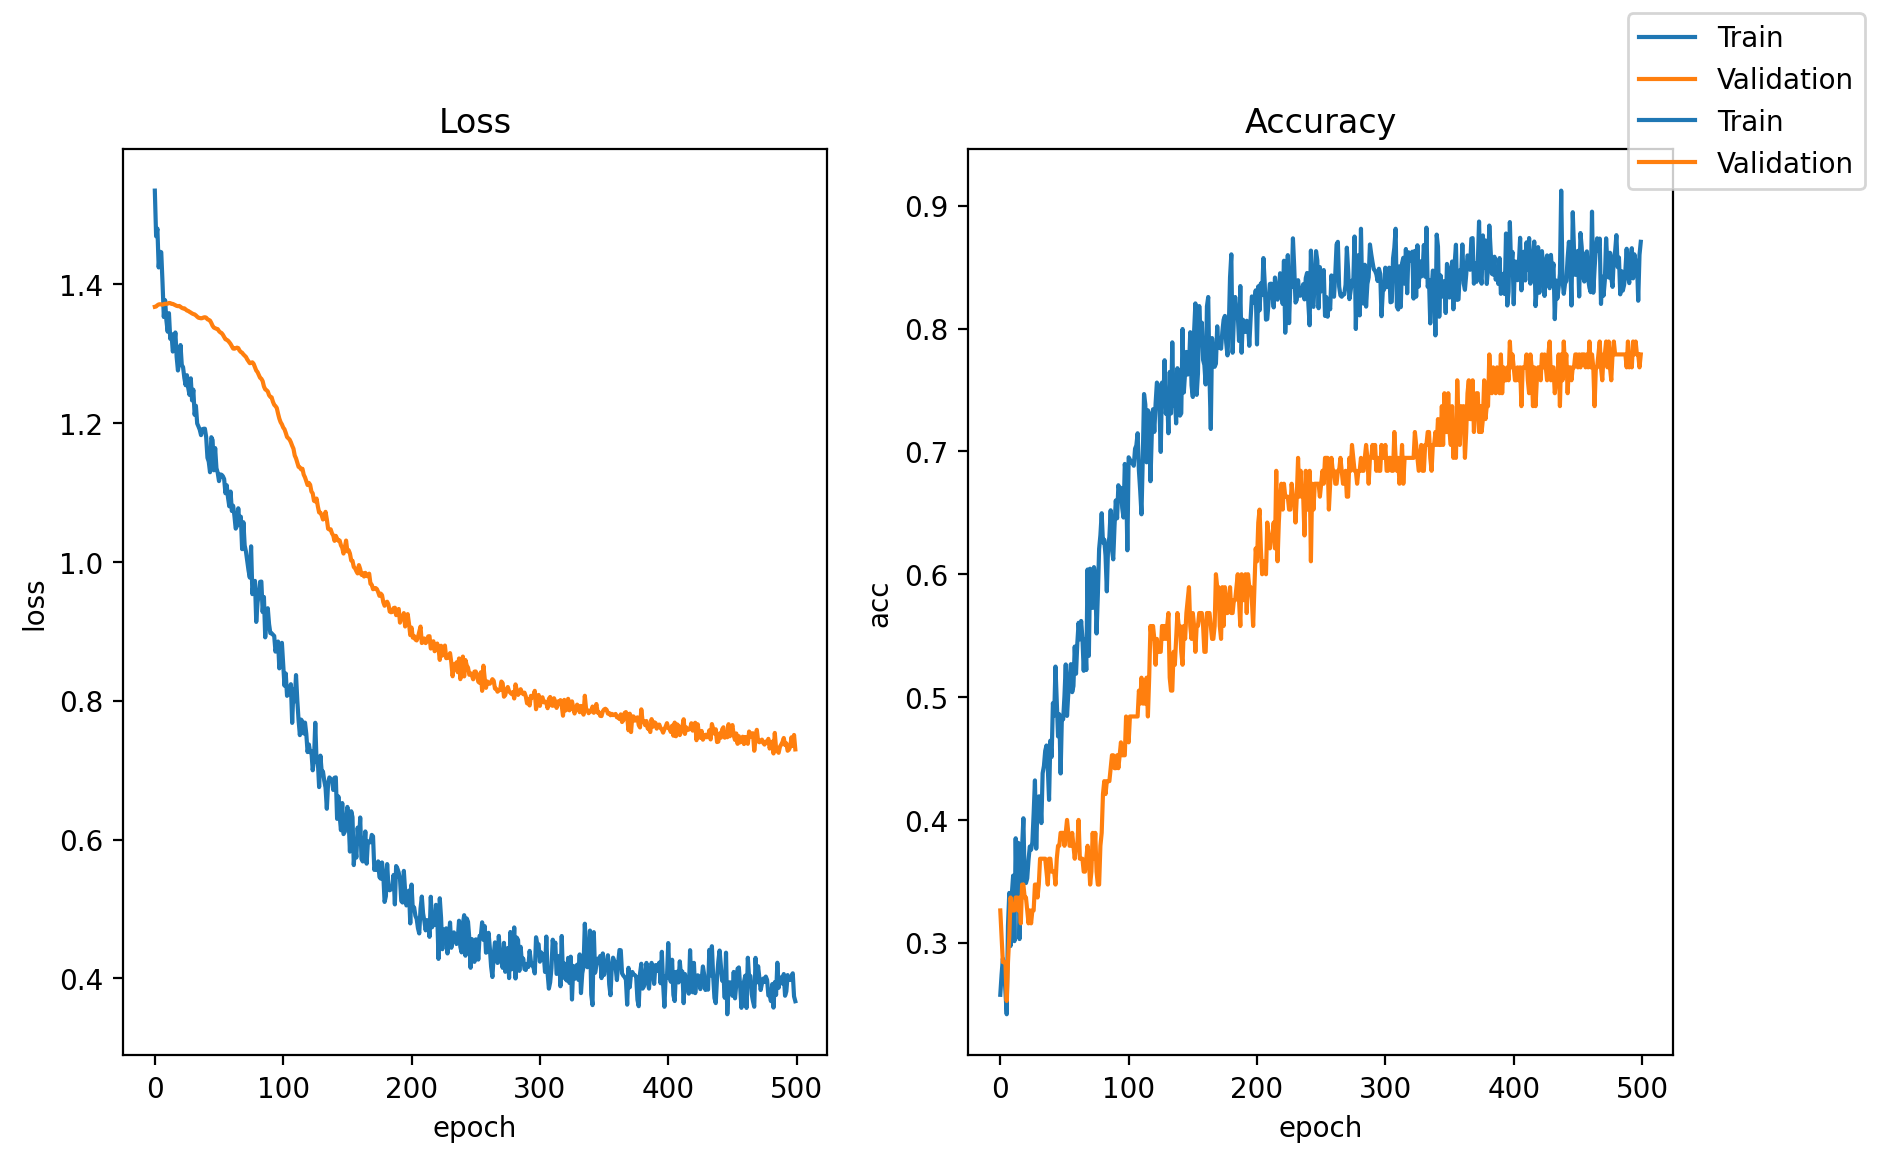

.319722	0.400000	
12	1.166479	0.512270	1.311054	0.431579	
13	1.158514	0.511608	1.300216	0.431579	
14	1.112149	0.588012	1.288183	0.431579	
15	1.092766	0.580200	1.274987	0.431579	
16	1.078855	0.611891	1.259861	0.442105	
17	1.068585	0.625132	1.249621	0.463158	
18	1.028979	0.632724	1.236778	0.463158	
19	1.014537	0.654882	1.223492	0.463158	
20	1.005020	0.660752	1.210256	0.505263	
21	0.968207	0.670286	1.194394	0.505263	
22	0.930103	0.740819	1.181270	0.526316	
23	0.941420	0.681144	1.170633	0.526316	
24	0.900045	0.690237	1.154056	0.536842	
25	0.888505	0.750397	1.137037	0.547368	
26	0.859305	0.755164	1.121966	0.536842	
27	0.805658	0.786194	1.106018	0.547368	
28	0.812979	0.780985	1.091158	0.547368	
29	0.811738	0.773393	1.071991	0.568421	
30	0.767899	0.799656	1.048842	0.642105	
31	0.743741	0.807468	1.025141	0.684211	
32	0.748971	0.800318	1.011233	0.694737	
33	0.711737	0.809852	1.003218	0.663158	
34	0.707393	0.820710	0.990158	0.673684	
35	0.677853	0.857609	0.969790	0.673684	
36	0.701112	0.833731	0

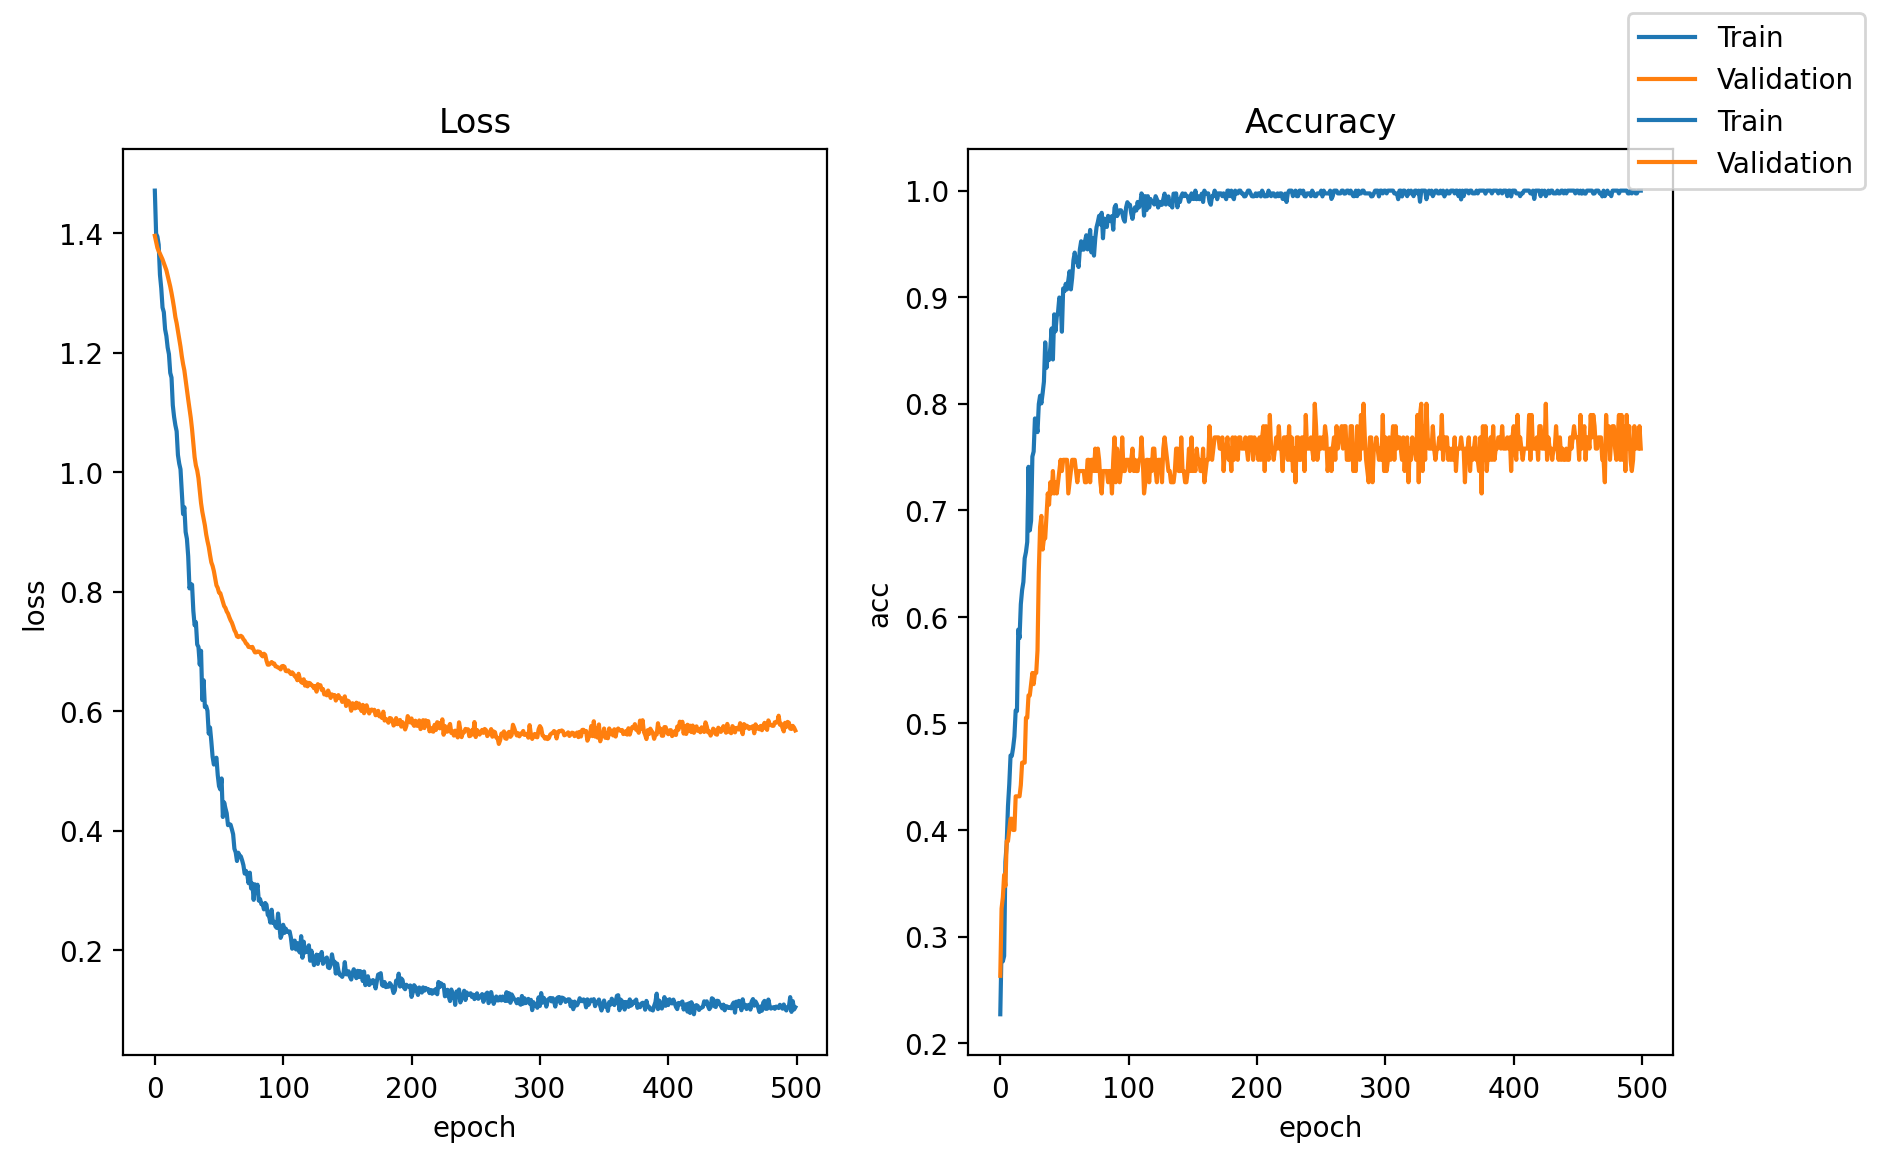

.321227	0.505263	
12	1.166532	0.561750	1.311434	0.494737	
13	1.155127	0.570224	1.295530	0.526316	
14	1.170589	0.525953	1.288157	0.526316	
15	1.144697	0.547228	1.285840	0.536842	
16	1.084165	0.628619	1.282848	0.505263	
17	1.113386	0.578257	1.277233	0.515789	
18	1.049389	0.635990	1.264943	0.526316	
19	1.045362	0.633607	1.256074	0.505263	
20	1.032226	0.657265	1.247821	0.536842	
21	1.034361	0.627957	1.244330	0.515789	
22	0.994533	0.670065	1.233066	0.515789	
23	0.952989	0.705023	1.220239	0.526316	
24	0.958304	0.696769	1.207818	0.547368	
25	0.940576	0.707848	1.201608	0.557895	
26	0.935177	0.703522	1.195813	0.557895	
27	0.899030	0.716940	1.195738	0.526316	
28	0.845218	0.788356	1.183587	0.536842	
29	0.850245	0.747793	1.170165	0.536842	
30	0.816763	0.769906	1.150251	0.557895	
31	0.819891	0.759931	1.137508	0.568421	
32	0.804200	0.774894	1.130820	0.568421	
33	0.787507	0.791402	1.124489	0.589474	
34	0.764510	0.788356	1.112207	0.578947	
35	0.713871	0.848694	1.103832	0.589474	
36	0.709749	0.826139	1

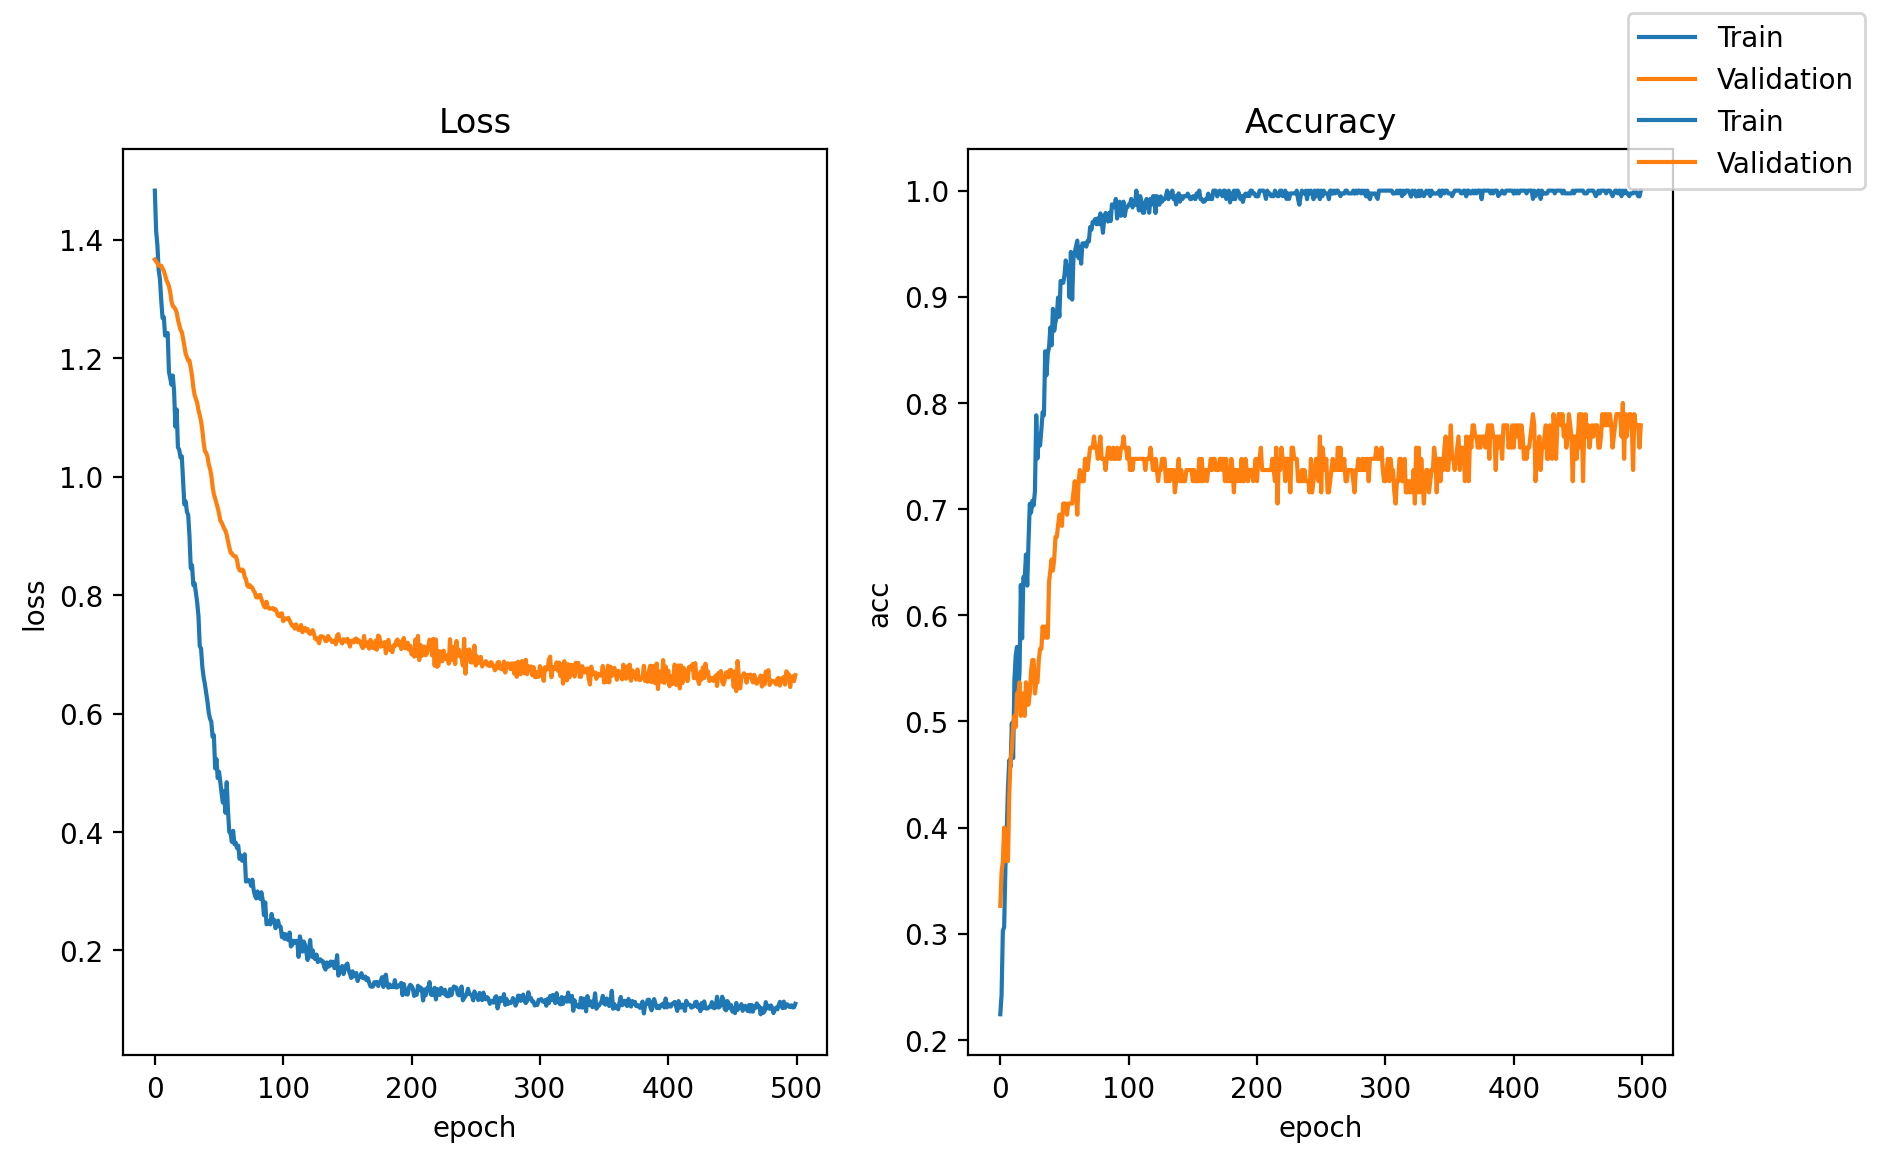

.316005	0.442105	
12	1.172136	0.523349	1.308921	0.442105	
13	1.150117	0.545463	1.302546	0.410526	
14	1.151872	0.569783	1.296356	0.452632	
15	1.112126	0.589336	1.289929	0.473684	
16	1.094930	0.588453	1.282404	0.463158	
17	1.086011	0.614936	1.273556	0.484211	
18	1.056441	0.657486	1.263222	0.526316	
19	1.027310	0.677216	1.248295	0.484211	
20	1.035874	0.636388	1.232625	0.505263	
21	0.998910	0.690899	1.220991	0.494737	
22	0.975824	0.670286	1.209237	0.494737	
23	0.937055	0.693724	1.196498	0.494737	
24	0.924231	0.726739	1.185367	0.515789	
25	0.900475	0.751898	1.175284	0.515789	
26	0.886155	0.744085	1.161281	0.536842	
27	0.858637	0.775777	1.145251	0.536842	
28	0.869503	0.725636	1.130375	0.547368	
29	0.849833	0.731727	1.115628	0.526316	
30	0.823203	0.763639	1.103810	0.536842	
31	0.799861	0.799876	1.089524	0.536842	
32	0.746890	0.834613	1.073536	0.557895	
33	0.742119	0.826359	1.055776	0.547368	
34	0.748389	0.819606	1.038746	0.557895	
35	0.719340	0.819606	1.020928	0.589474	
36	0.690683	0.815943	1

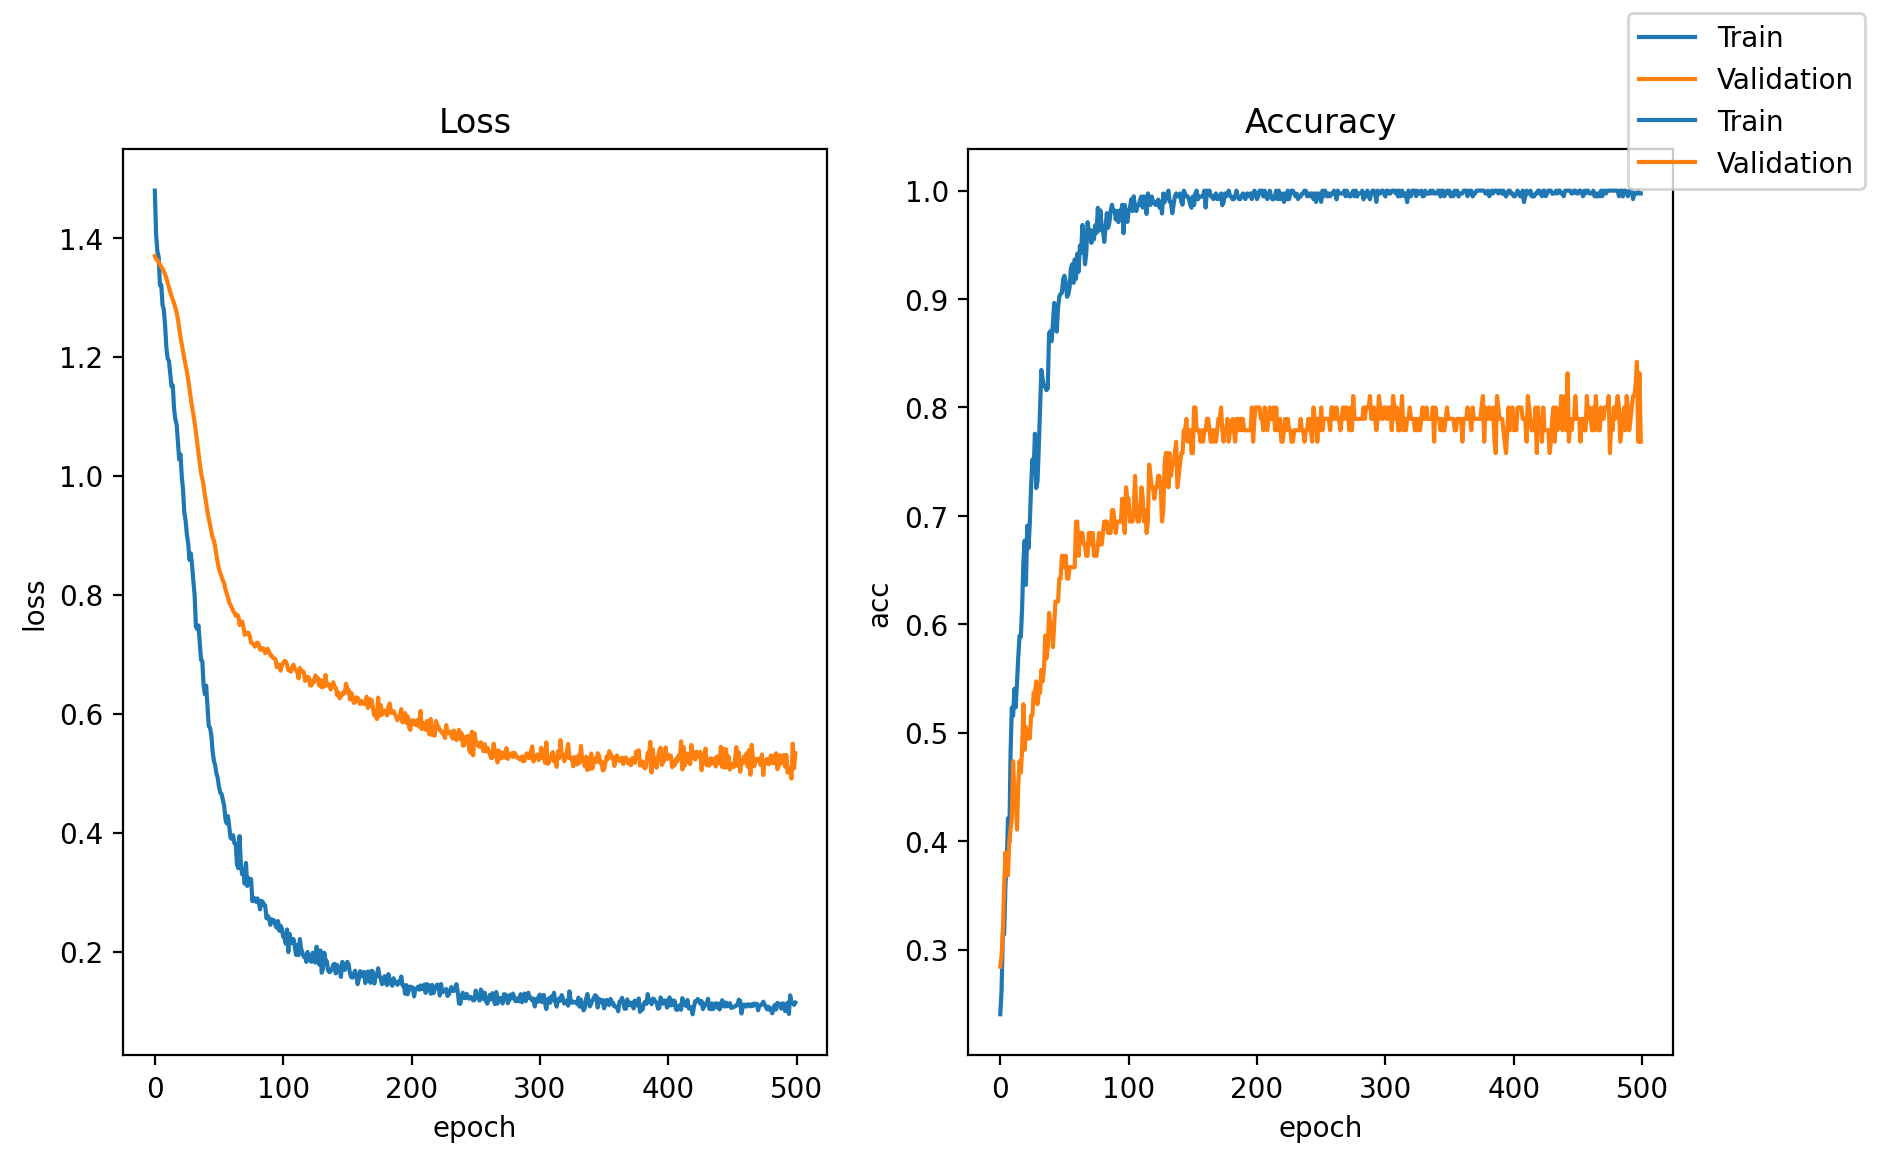

.358588	0.336842	
12	1.146979	0.546566	1.353396	0.357895	
13	1.146364	0.539371	1.347025	0.347368	
14	1.143213	0.543079	1.342134	0.378947	
15	1.113735	0.555438	1.343229	0.357895	
16	1.114687	0.571107	1.336381	0.357895	
17	1.067171	0.619703	1.336441	0.389474	
18	1.050558	0.651615	1.329877	0.378947	
19	1.004735	0.690899	1.320723	0.389474	
20	1.008955	0.670507	1.314390	0.421053	
21	0.973964	0.690457	1.310859	0.410526	
22	0.954149	0.720427	1.304122	0.400000	
23	0.919944	0.723031	1.296141	0.421053	
24	0.932971	0.713056	1.289259	0.421053	
25	0.917275	0.732565	1.282774	0.421053	
26	0.887312	0.761653	1.272182	0.452632	
27	0.869196	0.757106	1.264946	0.421053	
28	0.827557	0.789018	1.253303	0.431579	
29	0.827157	0.786856	1.244737	0.452632	
30	0.831200	0.760152	1.237325	0.463158	
31	0.785743	0.791623	1.230976	0.442105	
32	0.789518	0.786194	1.229661	0.421053	
33	0.760634	0.822873	1.217146	0.431579	
34	0.749613	0.809190	1.205009	0.473684	
35	0.727029	0.834172	1.186301	0.484211	
36	0.696526	0.856947	1

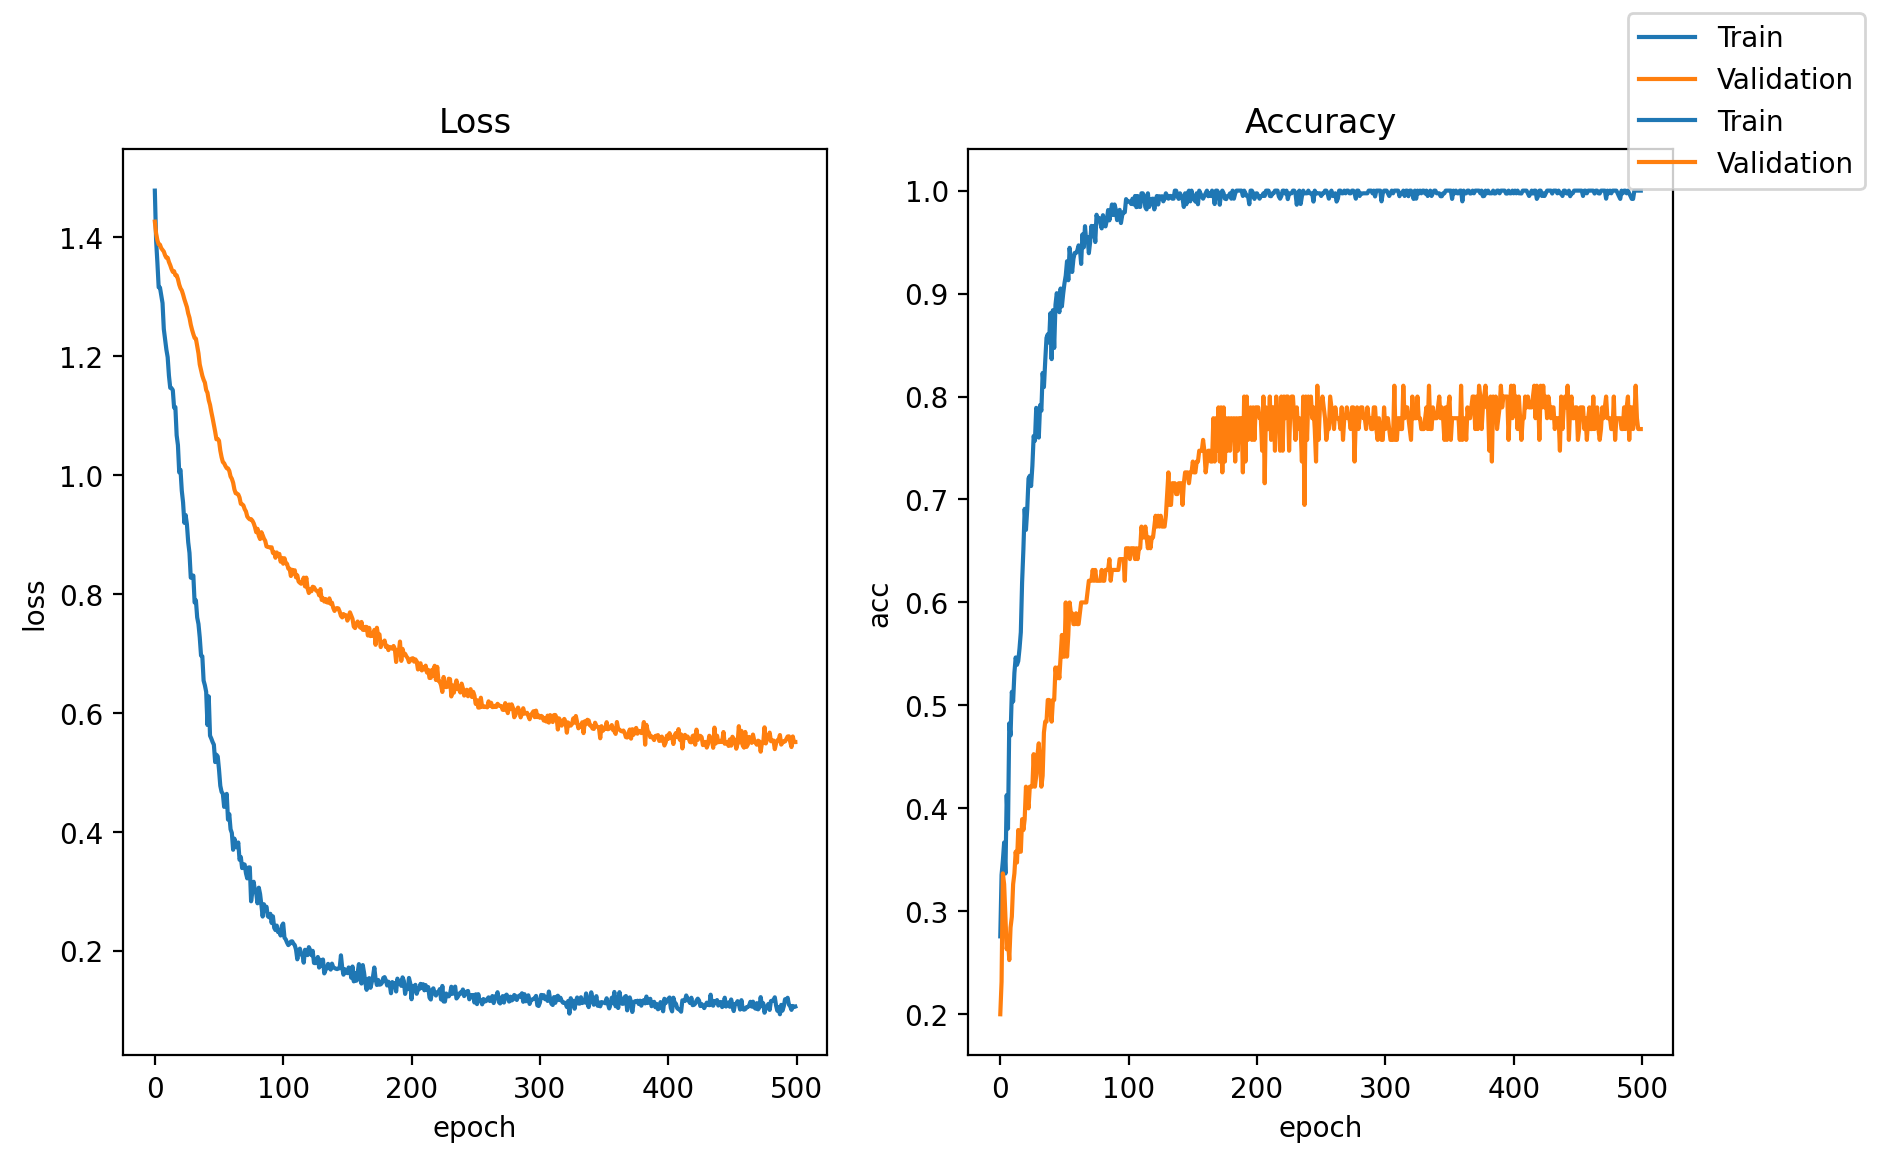

.292947	0.473684	
12	1.197933	0.500530	1.289406	0.473684	
13	1.191908	0.506841	1.285106	0.505263	
14	1.155730	0.583686	1.277865	0.568421	
15	1.126028	0.579758	1.269307	0.578947	
16	1.116800	0.575653	1.260367	0.589474	
17	1.091954	0.641640	1.250650	0.589474	
18	1.085478	0.621204	1.242400	0.589474	
19	1.049418	0.677436	1.231648	0.621053	
20	1.068446	0.622970	1.224178	0.621053	
21	1.013219	0.669403	1.218654	0.600000	
22	1.008503	0.647908	1.213061	0.600000	
23	0.974600	0.691781	1.207346	0.610526	
24	0.959917	0.701315	1.199852	0.547368	
25	0.924003	0.718264	1.188206	0.589474	
26	0.932293	0.699770	1.177460	0.600000	
27	0.892877	0.743644	1.166841	0.589474	
28	0.882066	0.752781	1.161893	0.568421	
29	0.888525	0.733007	1.156413	0.578947	
30	0.852412	0.766243	1.150212	0.600000	
31	0.833954	0.786635	1.140647	0.589474	
32	0.813052	0.760593	1.129045	0.578947	
33	0.820929	0.778160	1.119173	0.568421	
34	0.770018	0.815943	1.112615	0.568421	
35	0.780158	0.813118	1.105472	0.578947	
36	0.743135	0.838277	1

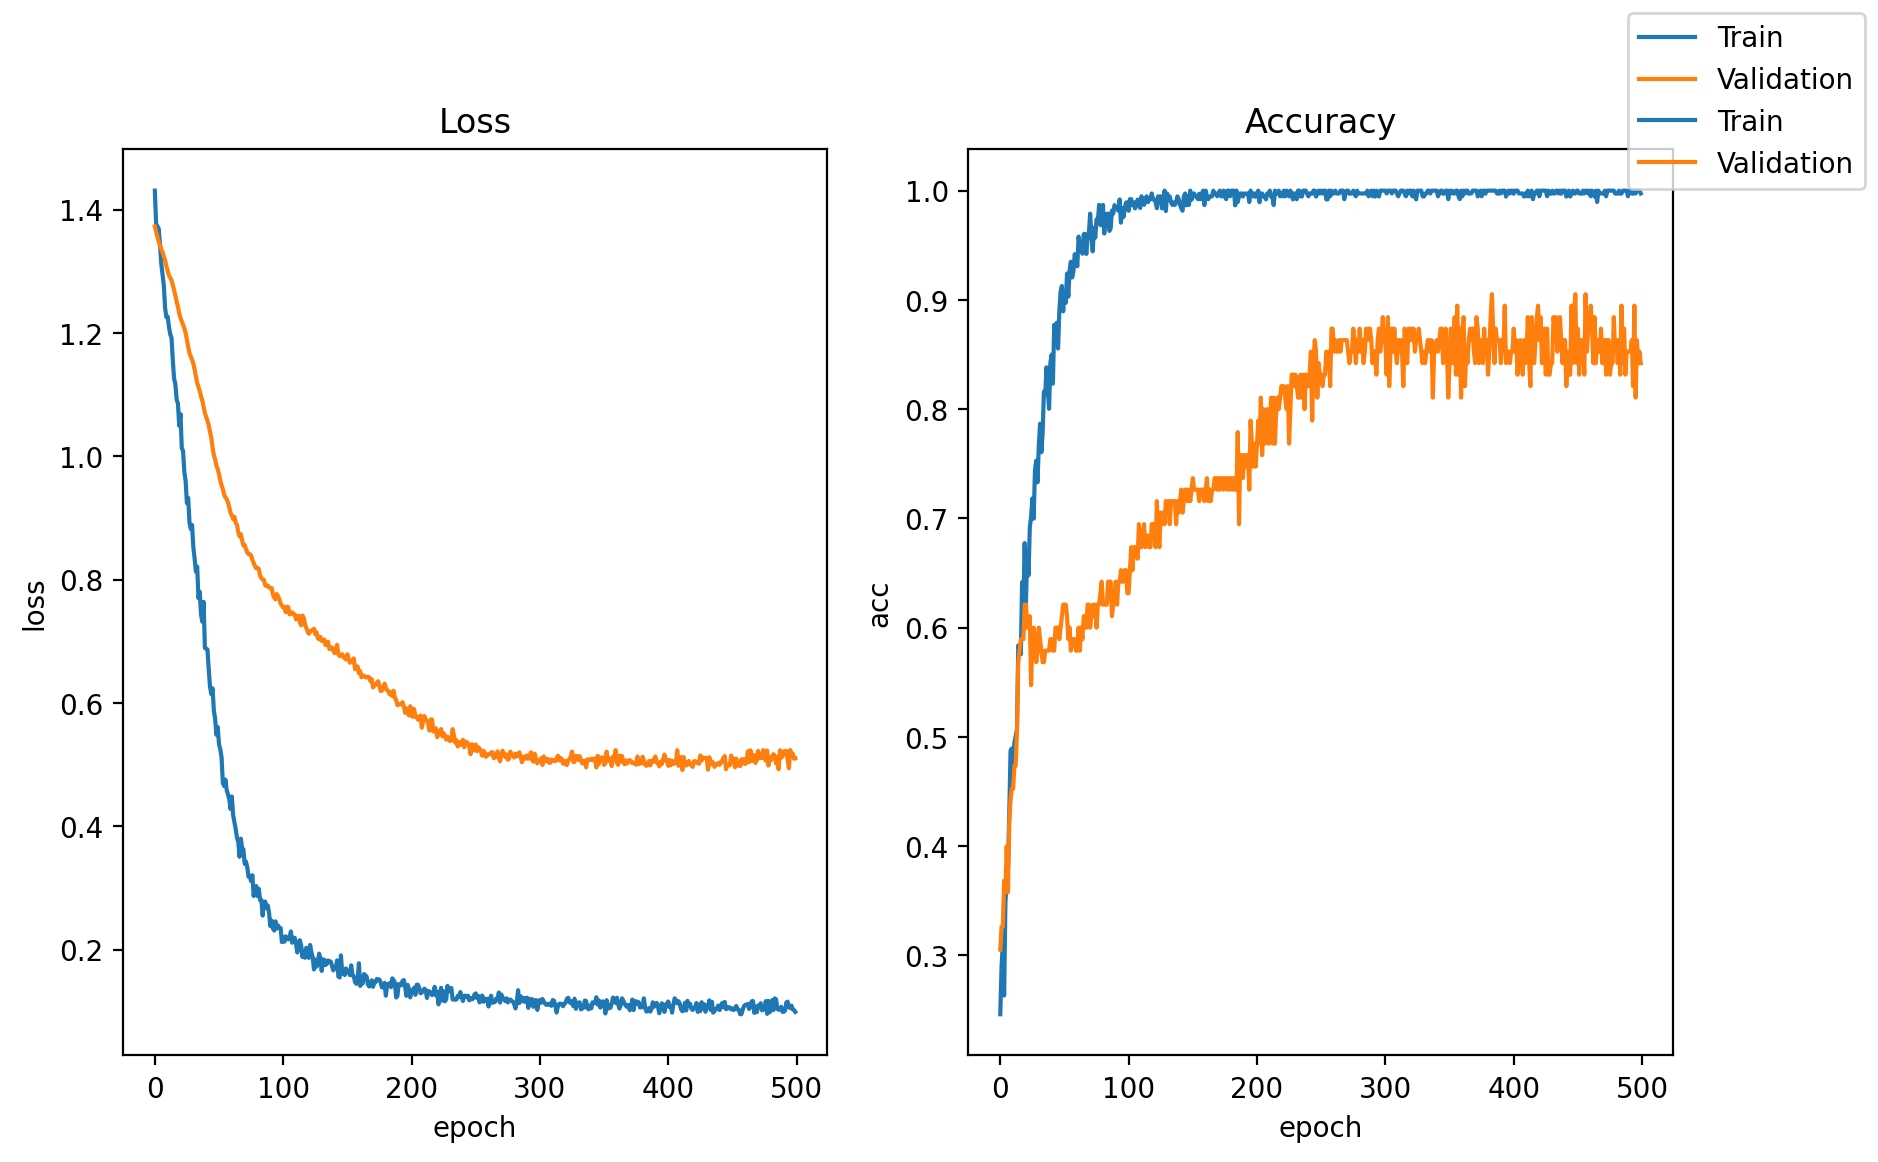

.356794	0.357895	
12	1.213456	0.493600	1.354133	0.368421	
13	1.207021	0.508563	1.349293	0.357895	
14	1.188161	0.546787	1.340720	0.357895	
15	1.157385	0.573270	1.333694	0.368421	
16	1.121075	0.627516	1.324559	0.410526	
17	1.099389	0.616879	1.317720	0.421053	
18	1.106701	0.593882	1.309226	0.410526	
19	1.063588	0.642744	1.303035	0.431579	
20	1.061566	0.631003	1.295572	0.452632	
21	1.037196	0.672890	1.288515	0.473684	
22	1.025613	0.665960	1.279303	0.473684	
23	1.014934	0.678099	1.271595	0.494737	
24	0.966820	0.682645	1.260288	0.463158	
25	0.955881	0.700477	1.248257	0.442105	
26	0.958303	0.695886	1.237830	0.494737	
27	0.889554	0.751236	1.226773	0.526316	
28	0.894087	0.736935	1.212451	0.557895	
29	0.867617	0.771010	1.198394	0.526316	
30	0.864790	0.736052	1.185134	0.515789	
31	0.827018	0.734110	1.175057	0.515789	
32	0.806456	0.822652	1.164340	0.547368	
33	0.791584	0.744306	1.153437	0.526316	
34	0.795100	0.794447	1.135422	0.547368	
35	0.752868	0.812677	1.118725	0.557895	
36	0.755723	0.808969	1

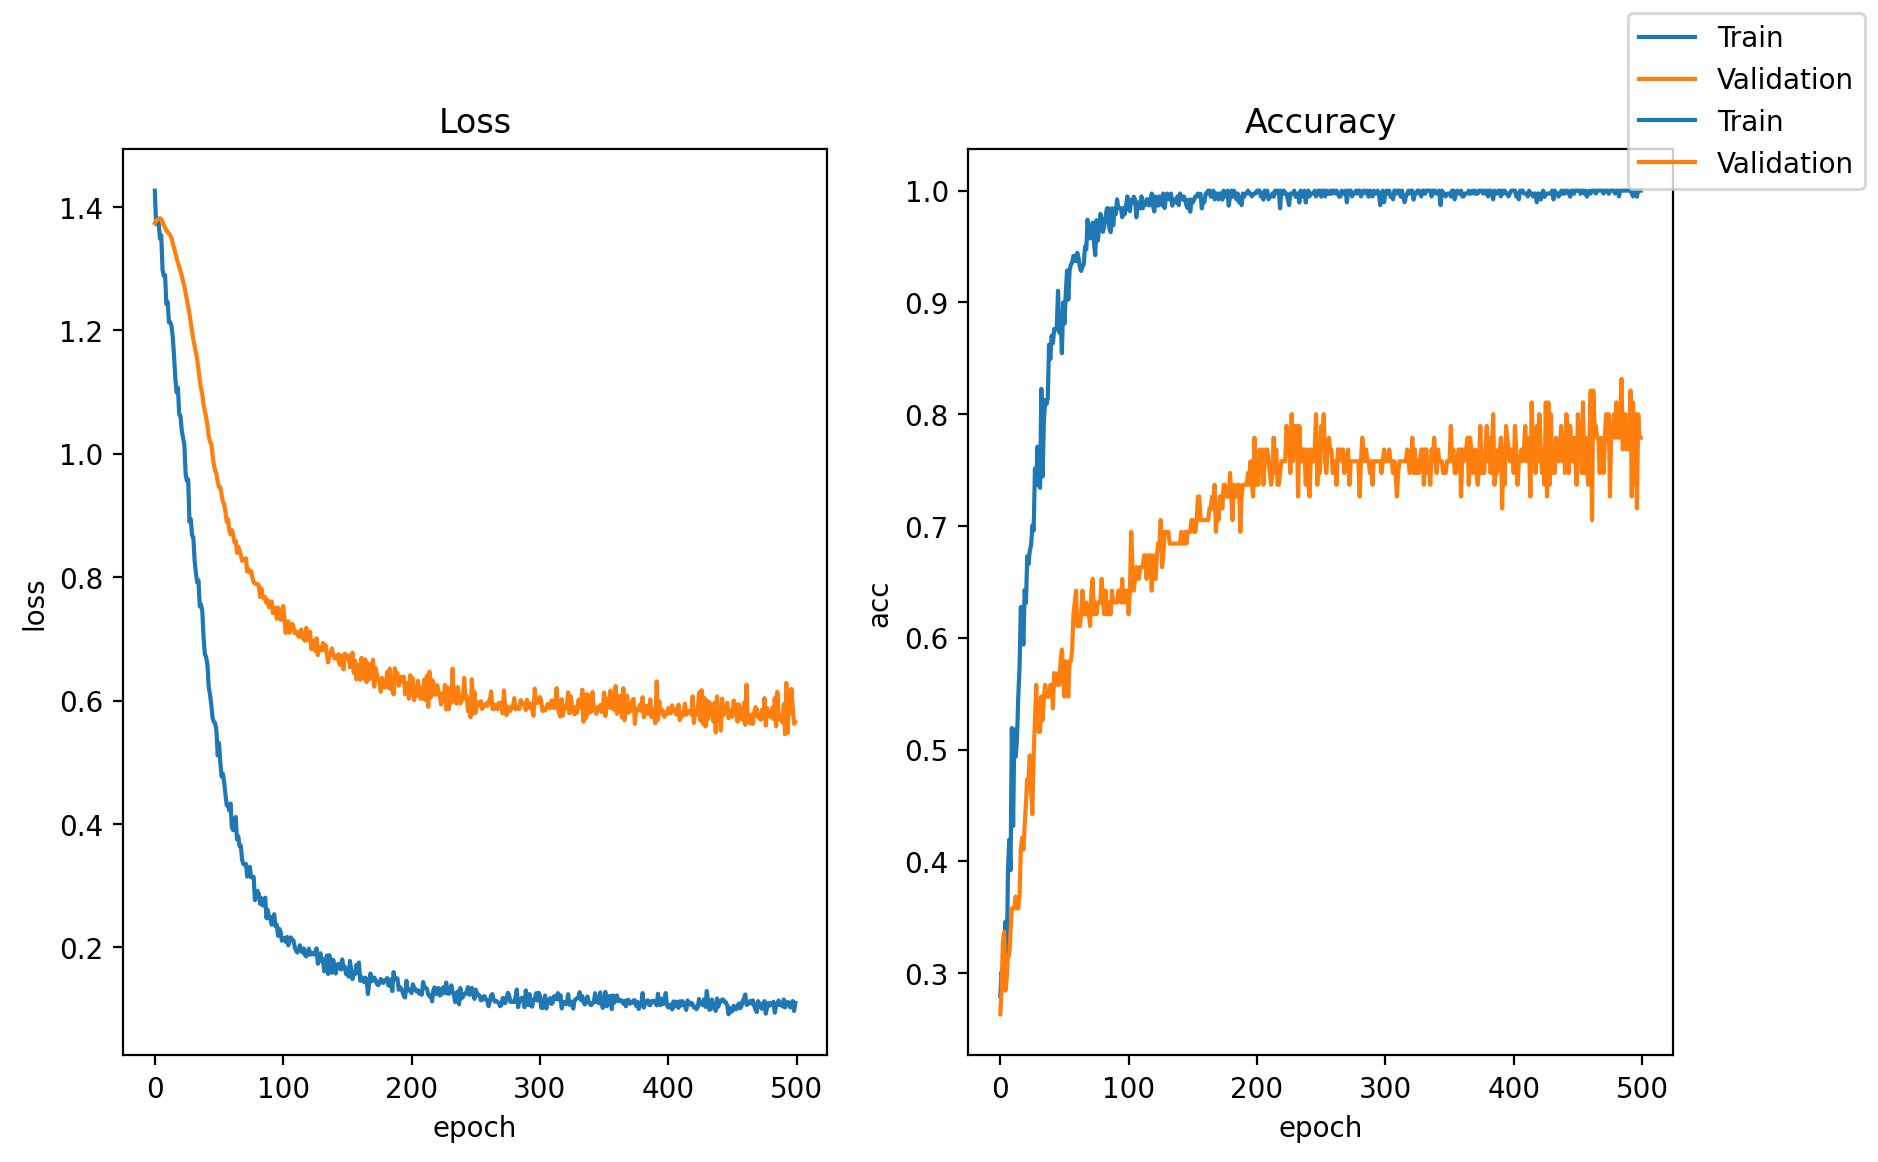

.377690	0.273684	
12	1.199655	0.491216	1.374888	0.284211	
13	1.180960	0.546566	1.368355	0.263158	
14	1.187804	0.493821	1.364188	0.294737	
15	1.150257	0.541976	1.367702	0.284211	
16	1.156814	0.545904	1.365138	0.305263	
17	1.121663	0.588233	1.358495	0.305263	
18	1.080945	0.657044	1.349406	0.336842	
19	1.064543	0.651836	1.343886	0.347368	
20	1.053314	0.665078	1.344325	0.305263	
21	1.044207	0.672449	1.344570	0.336842	
22	1.036610	0.660752	1.336875	0.326316	
23	1.007289	0.662032	1.326938	0.294737	
24	1.003842	0.665078	1.320864	0.284211	
25	0.996904	0.640978	1.315075	0.294737	
26	0.988010	0.667682	1.308297	0.294737	
27	0.958157	0.707186	1.300367	0.284211	
28	0.944835	0.736714	1.297754	0.294737	
29	0.932463	0.716940	1.294997	0.315789	
30	0.918262	0.744748	1.292337	0.336842	
31	0.903111	0.733669	1.285951	0.294737	
32	0.875326	0.770789	1.269781	0.326316	
33	0.860498	0.771010	1.264236	0.315789	
34	0.851552	0.774276	1.254158	0.336842	
35	0.844307	0.790740	1.249166	0.357895	
36	0.808865	0.805305	1

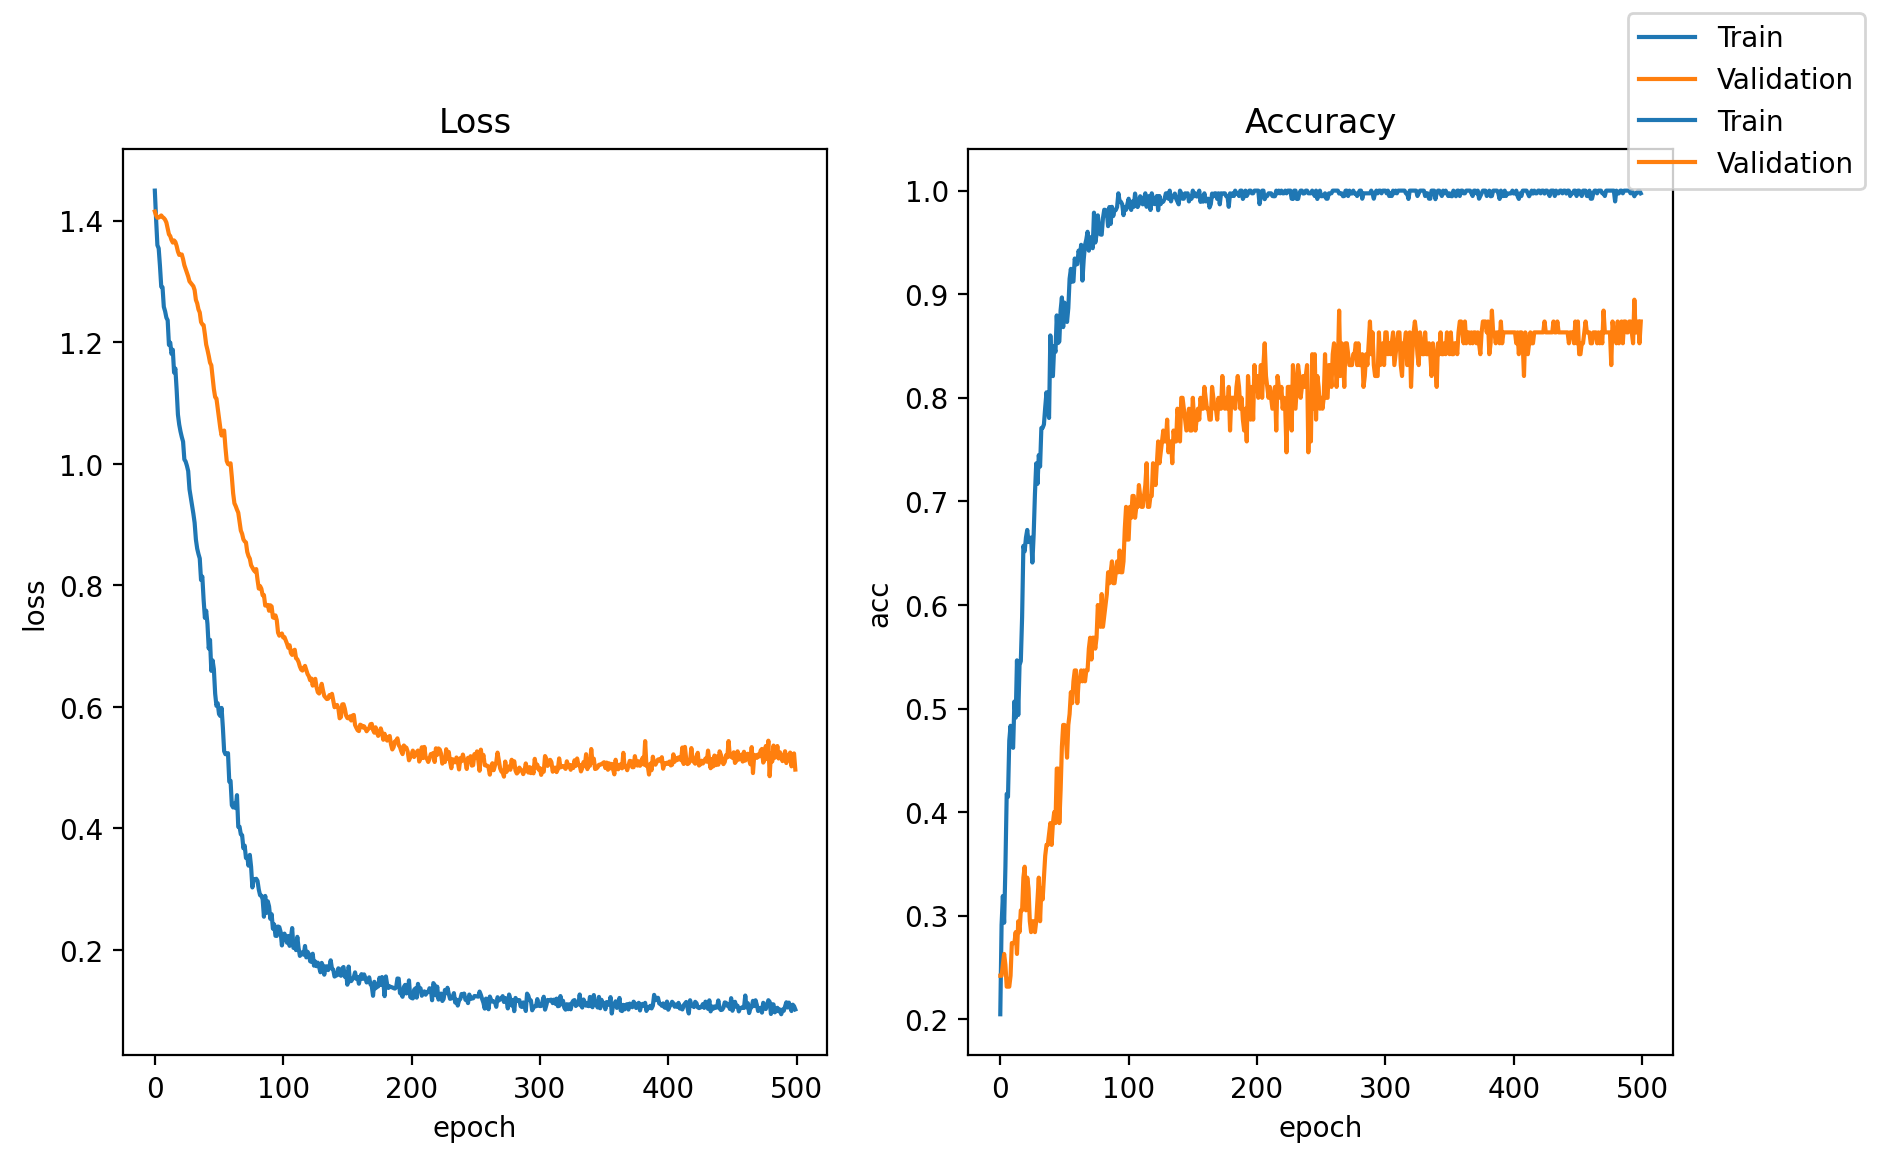

.324425	0.431579	
12	1.164786	0.564575	1.321407	0.431579	
13	1.140856	0.580420	1.318652	0.442105	
14	1.148500	0.543079	1.319171	0.442105	
15	1.092054	0.601033	1.316310	0.442105	
16	1.080425	0.637094	1.308721	0.421053	
17	1.093924	0.589336	1.303625	0.421053	
18	1.059368	0.641861	1.301314	0.442105	
19	1.044981	0.640360	1.304490	0.431579	
20	1.022223	0.705464	1.299682	0.431579	
21	1.012517	0.695268	1.295076	0.452632	
22	1.015244	0.669624	1.287841	0.484211	
23	0.960117	0.718264	1.282633	0.473684	
24	0.973158	0.699373	1.279658	0.473684	
25	0.931627	0.733007	1.275437	0.494737	
26	0.894279	0.746910	1.269960	0.494737	
27	0.933871	0.733227	1.269503	0.484211	
28	0.895785	0.767523	1.267037	0.473684	
29	0.871266	0.744527	1.259199	0.452632	
30	0.858107	0.739319	1.245653	0.484211	
31	0.841043	0.762315	1.241806	0.505263	
32	0.813892	0.793565	1.243887	0.473684	
33	0.804862	0.801377	1.231982	0.515789	
34	0.805126	0.777940	1.218993	0.526316	
35	0.770397	0.820930	1.217943	0.494737	
36	0.749950	0.833951	1

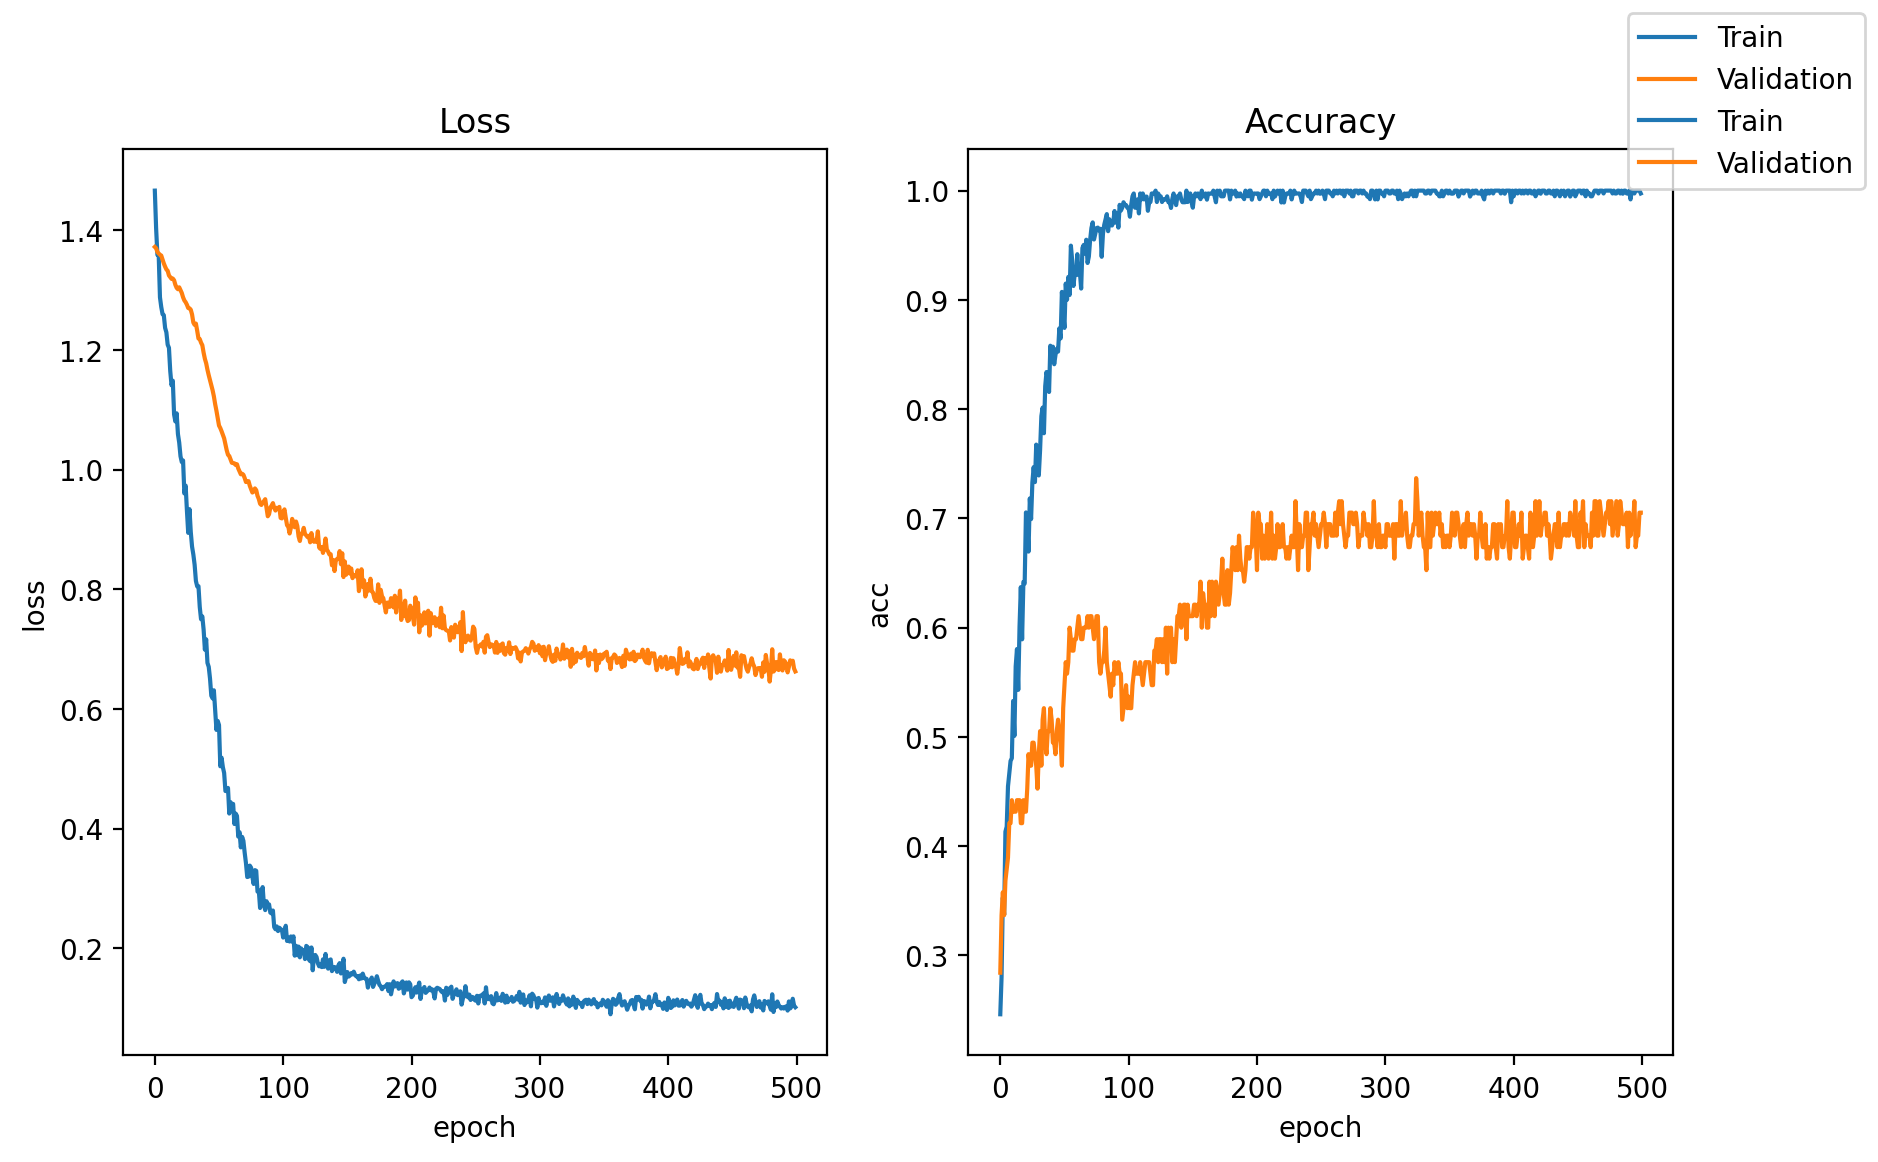

.341616	0.368421	
12	1.194245	0.517479	1.336648	0.336842	
13	1.148197	0.581921	1.332344	0.326316	
14	1.130708	0.612774	1.331439	0.347368	
15	1.138336	0.555261	1.329523	0.368421	
16	1.082206	0.648349	1.324523	0.347368	
17	1.085551	0.627075	1.323316	0.347368	
18	1.067547	0.633828	1.324163	0.378947	
19	1.062947	0.607345	1.323766	0.400000	
20	1.036877	0.622970	1.320536	0.421053	
21	1.013721	0.675053	1.315055	0.368421	
22	1.012845	0.688294	1.307344	0.347368	
23	0.977408	0.714778	1.301174	0.368421	
24	0.974689	0.665519	1.298425	0.378947	
25	0.928179	0.720207	1.296502	0.368421	
26	0.927713	0.748014	1.289382	0.400000	
27	0.911385	0.737156	1.285673	0.389474	
28	0.872522	0.762756	1.282262	0.389474	
29	0.874248	0.757768	1.274977	0.368421	
30	0.852651	0.765802	1.273914	0.368421	
31	0.843097	0.754944	1.268900	0.368421	
32	0.799107	0.784031	1.259419	0.389474	
33	0.806516	0.813118	1.253743	0.368421	
34	0.785709	0.791623	1.243369	0.368421	
35	0.758543	0.818326	1.241820	0.378947	
36	0.750663	0.836555	1

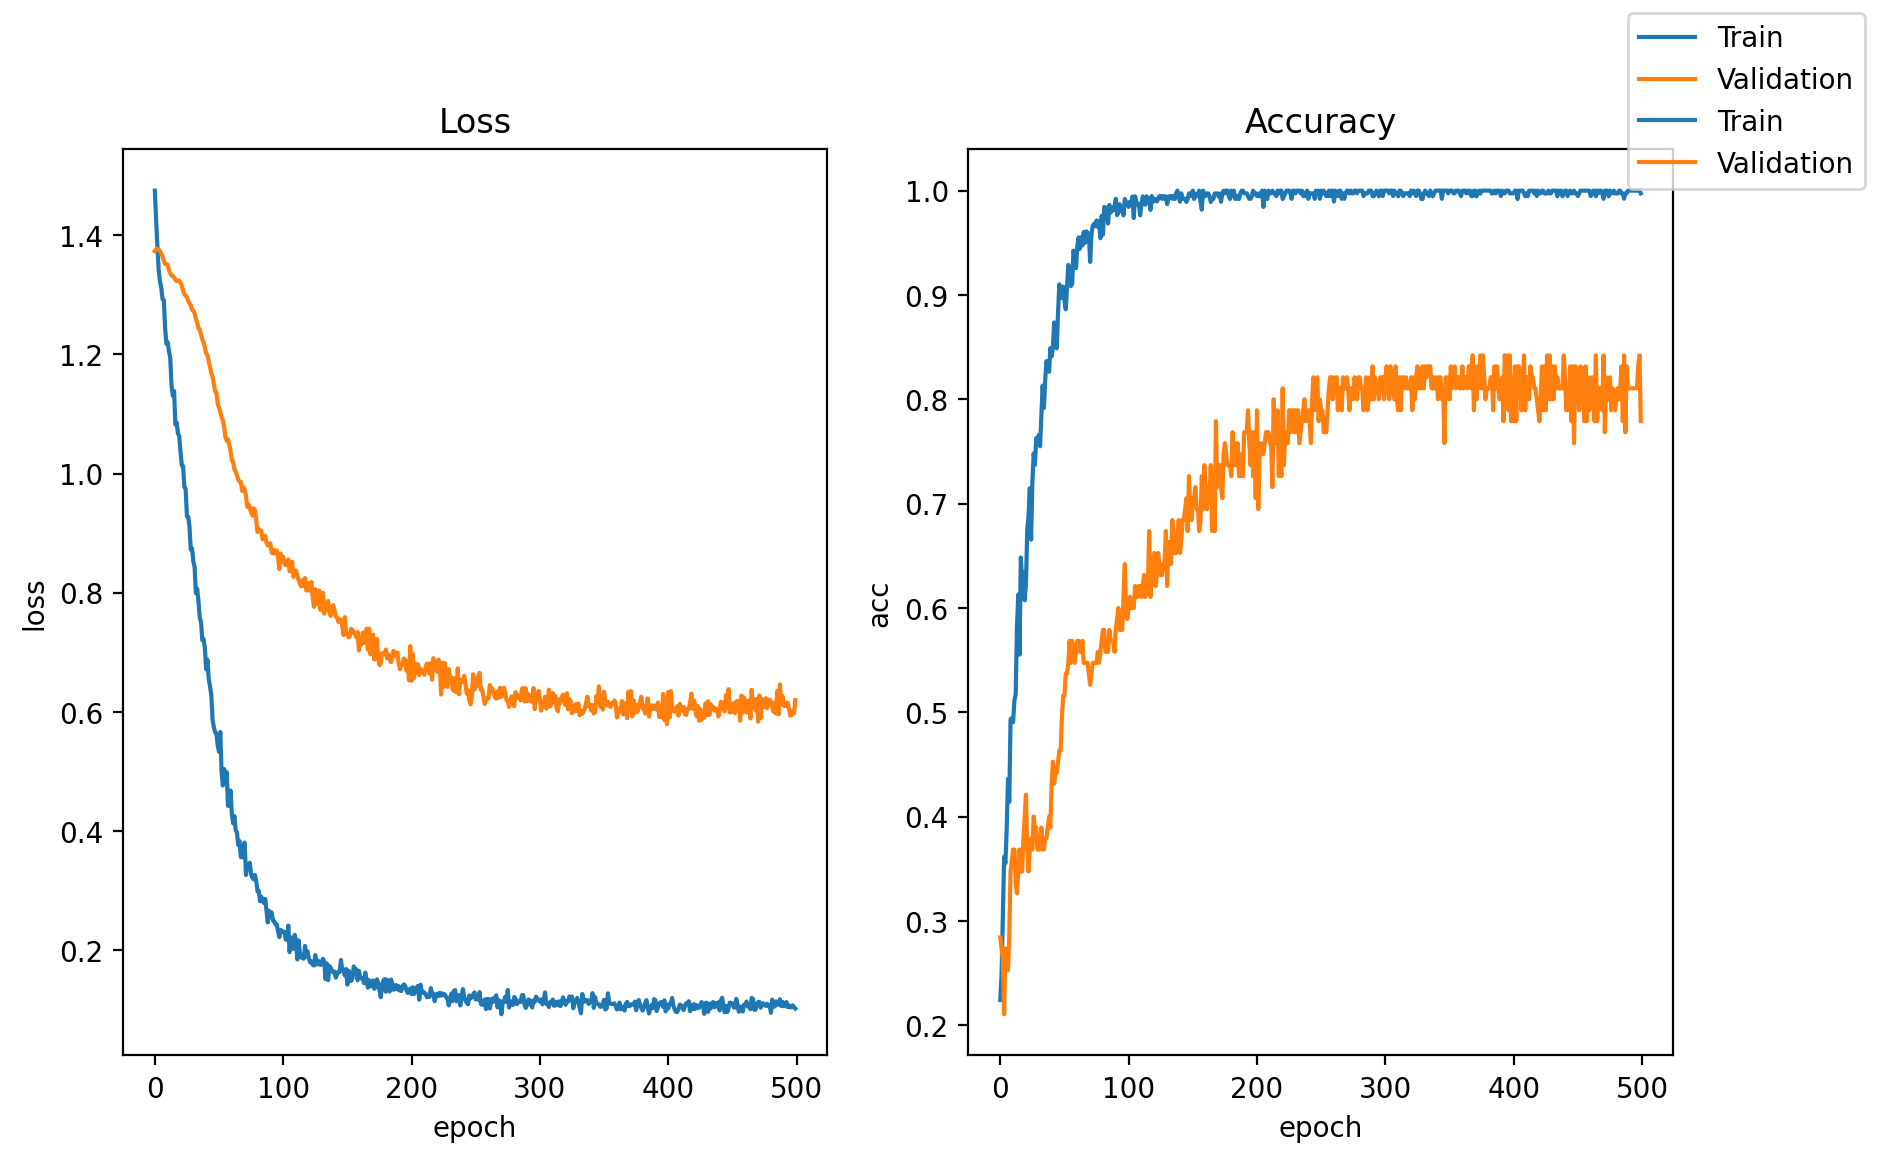

Test accuracy in trail 9: 0.72
The average test accuracy:0.7199999999999999


In [19]:
encoder_opt = {
    'conv1_size': 5,
    'conv1_out_channel': 22,
    'conv2_size': 5,
    'conv2_out_channel': 22,
    'conv3_size': 5,
    'conv3_out_channel': 12,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'    
}
decoder_opt={
    'drop_rate': 0.9, 
    'linear1_out': 64, 
    'activation': 'leaky_relu',
    'avg_pool_size':4
}
model_opt = {
    'decoder_opt':decoder_opt,
    'encoder_opt':encoder_opt,
}

train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 250,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 500,
    'downsample_split': True,
    'overfit_threshold':0
}
data_dir = {
    'X_train_dir': sub0_X_train_val,
    'y_train_dir':sub0_y_train_val,
    'X_test_dir': sub0_X_test,
    'y_test_dir':sub0_y_test,
}


loss_fn = nn.CrossEntropyLoss()

test_acc,avg_acc = avg_test_acc(EEG1D3LCNN,(1,22,500),data_dir,loss_fn,
                        train_options,model_opt,trails=10)
print('The average test accuracy:{}'.format(avg_acc))

0.7199999999999999


## Test on PSCNN

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        Conv2dAuto-1          [-1, 10, 22, 500]              80
        Conv2dAuto-2          [-1, 10, 22, 500]             140
            Linear-3              [-1, 500, 32]          14,112
          Identity-4              [-1, 500, 32]               0
         AvgPool1d-5               [-1, 32, 29]               0
           Dropout-6                  [-1, 928]               0
            Linear-7                    [-1, 4]           3,716
           Softmax-8                    [-1, 4]               0
Total params: 18,048
Trainable params: 18,048
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.04
Forward/backward pass size (MB): 1.94
Params size (MB): 0.07
Estimated Total Size (MB): 2.05
----------------------------------------------------------------
Start training...
Epoch	Train Loss	Train Acc

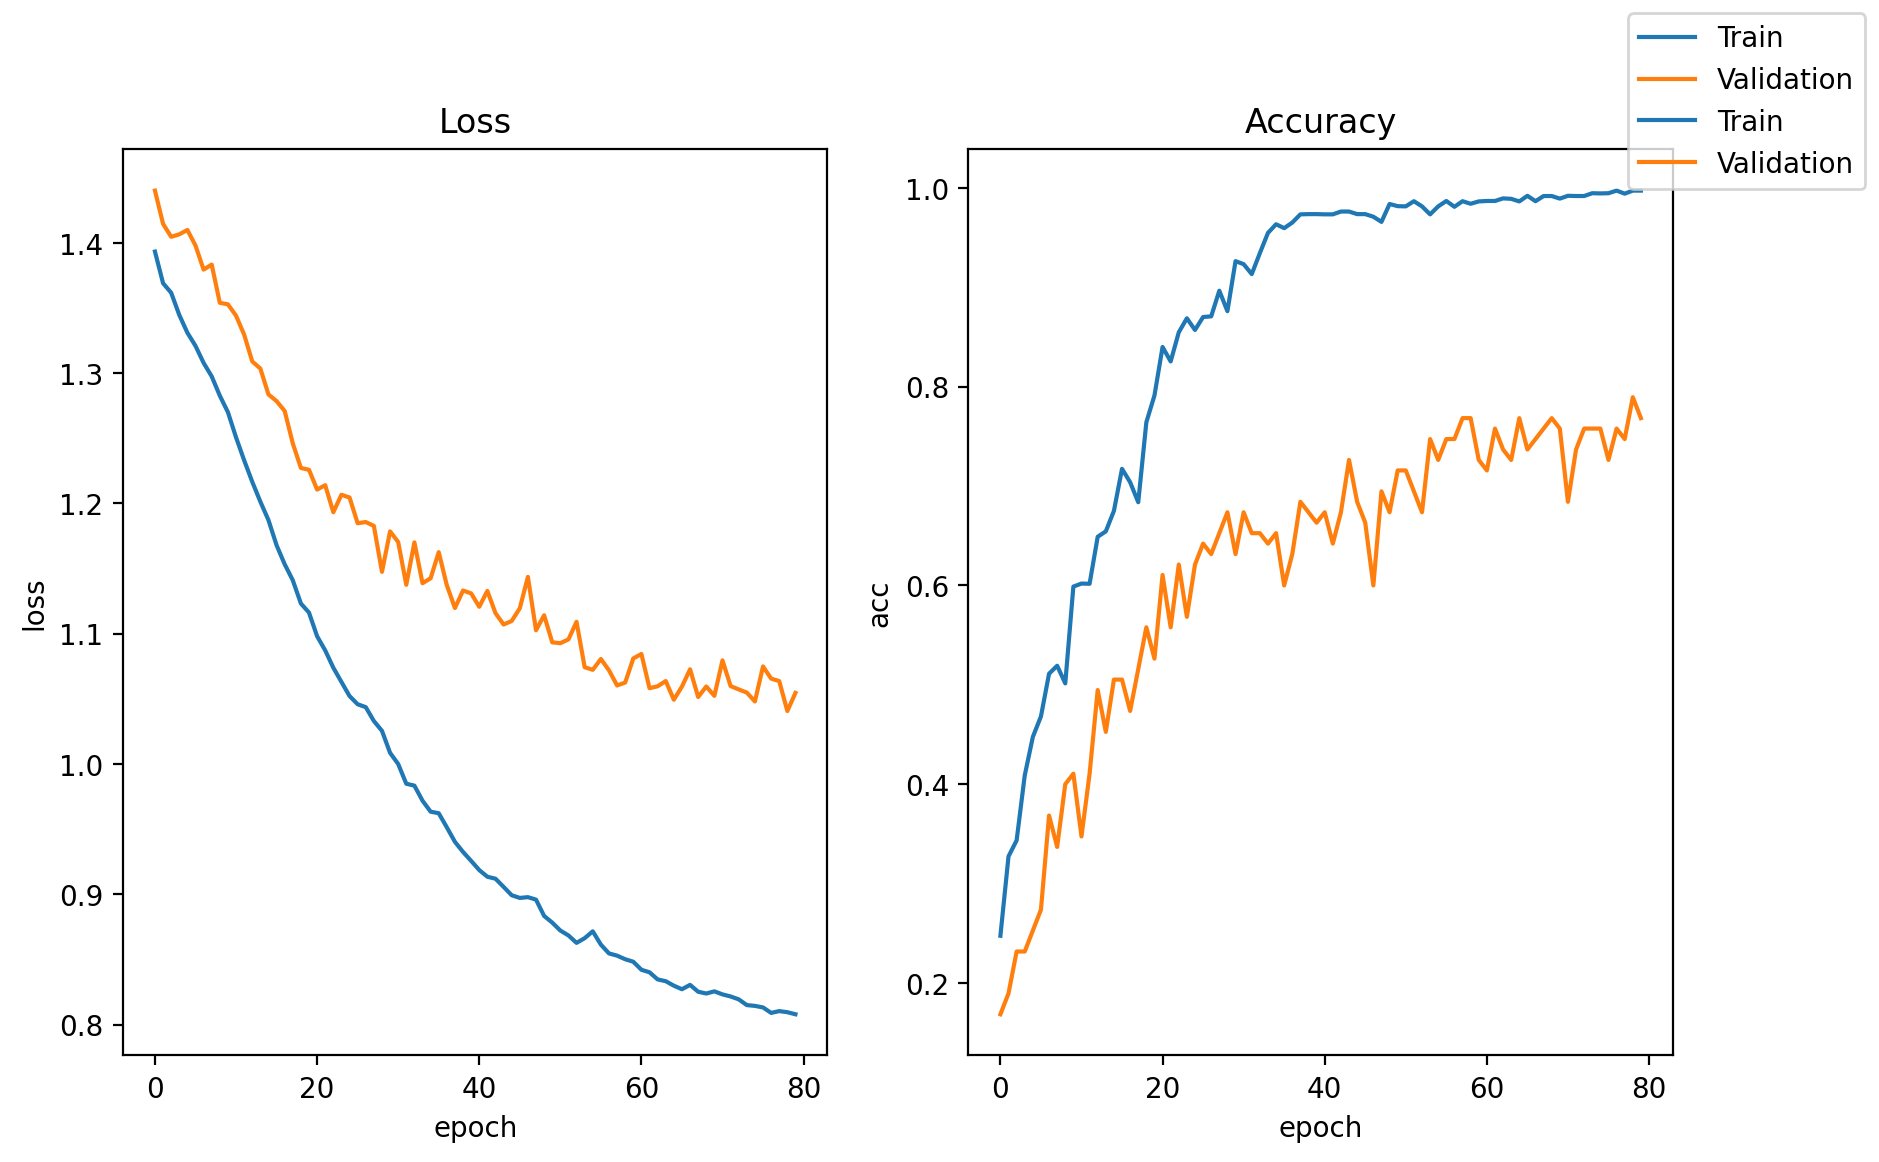

Test accuracy in trail 0: 0.72
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.406051	0.278072	1.378584	0.252632	
1	1.379008	0.281515	1.398462	0.221053	
2	1.362554	0.298464	1.378525	0.252632	
3	1.344700	0.428054	1.368598	0.336842	
4	1.329528	0.485125	1.368399	0.294737	
5	1.314784	0.532000	1.354419	0.347368	
6	1.298700	0.495542	1.337515	0.463158	
7	1.286204	0.666181	1.321026	0.515789	
8	1.269446	0.572166	1.330882	0.410526	
9	1.246719	0.601916	1.307755	0.473684	
10	1.229704	0.719986	1.288176	0.600000	
11	1.213201	0.753619	1.281963	0.589474	
12	1.198552	0.636829	1.269447	0.557895	
13	1.183715	0.716102	1.238827	0.610526	
14	1.164775	0.710187	1.246541	0.568421	
15	1.149815	0.737156	1.218569	0.642105	
16	1.134279	0.791181	1.209010	0.652632	
17	1.119333	0.836555	1.215713	0.568421	
18	1.107088	0.828964	1.192904	0.684211	
19	1.093235	0.865422	1.181142	0.705263	
20	1.084973	0.875839	1.173210	0.684211	
21	1.074859	0.855005	1.172785	0.736842	
22	1.067937	0.883430	1.155245	0.73

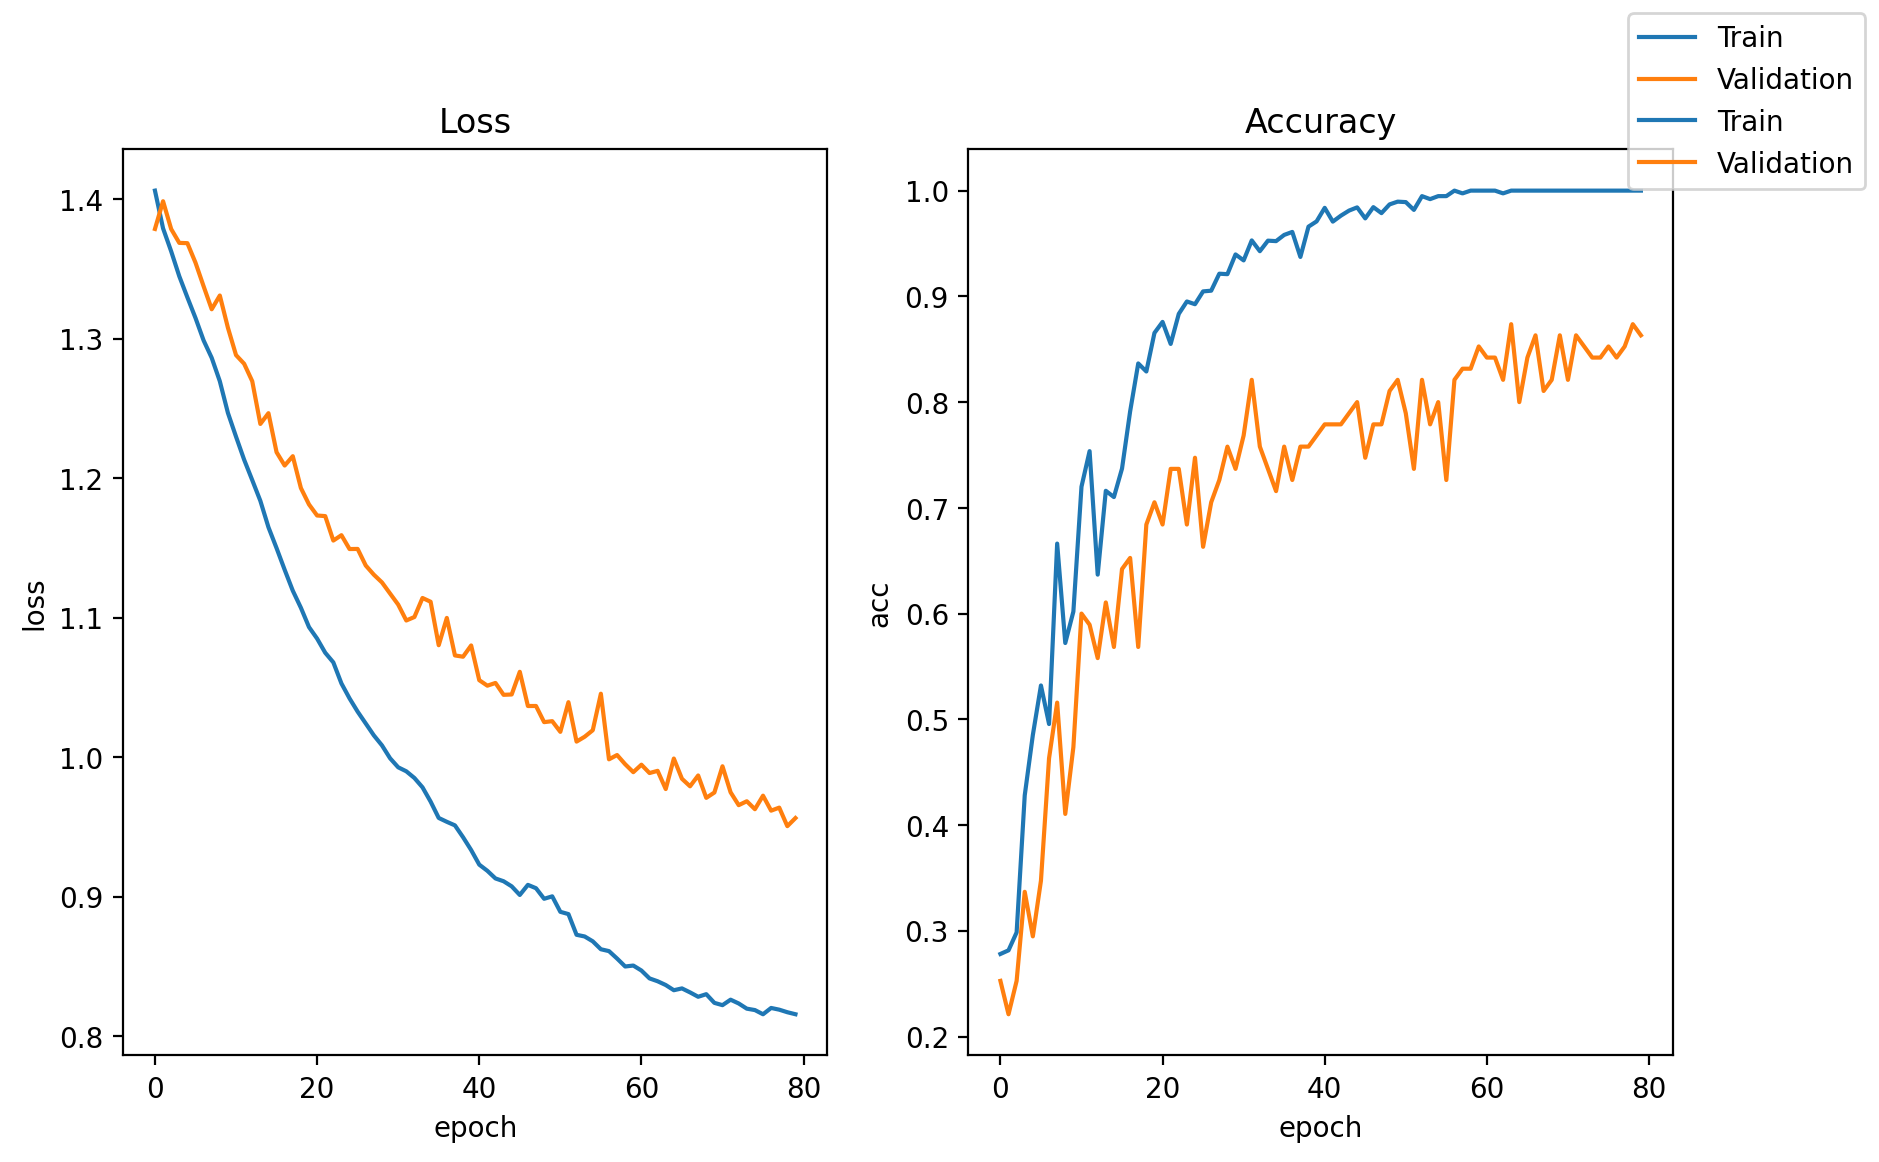

Test accuracy in trail 1: 0.71
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.418661	0.218132	1.405303	0.221053	
1	1.389379	0.229211	1.387374	0.252632	
2	1.370665	0.312147	1.369085	0.294737	
3	1.360117	0.385946	1.373721	0.389474	
4	1.345507	0.452993	1.362087	0.473684	
5	1.336778	0.402013	1.347038	0.431579	
6	1.317962	0.543079	1.342155	0.452632	
7	1.301467	0.523967	1.325656	0.442105	
8	1.279543	0.541358	1.309517	0.515789	
9	1.264236	0.672890	1.293481	0.494737	
10	1.248598	0.577816	1.275807	0.463158	
11	1.224049	0.551554	1.267837	0.526316	
12	1.203764	0.706744	1.253678	0.557895	
13	1.183481	0.766022	1.233065	0.557895	
14	1.168277	0.659869	1.228301	0.568421	
15	1.153806	0.740599	1.220723	0.578947	
16	1.135834	0.794889	1.205126	0.600000	
17	1.122231	0.788798	1.200787	0.663158	
18	1.107340	0.842426	1.179595	0.621053	
19	1.094548	0.826139	1.185674	0.694737	
20	1.082059	0.838498	1.164329	0.705263	
21	1.069493	0.849576	1.165940	0.684211	
22	1.061842	0.846751	1.160272	0.67

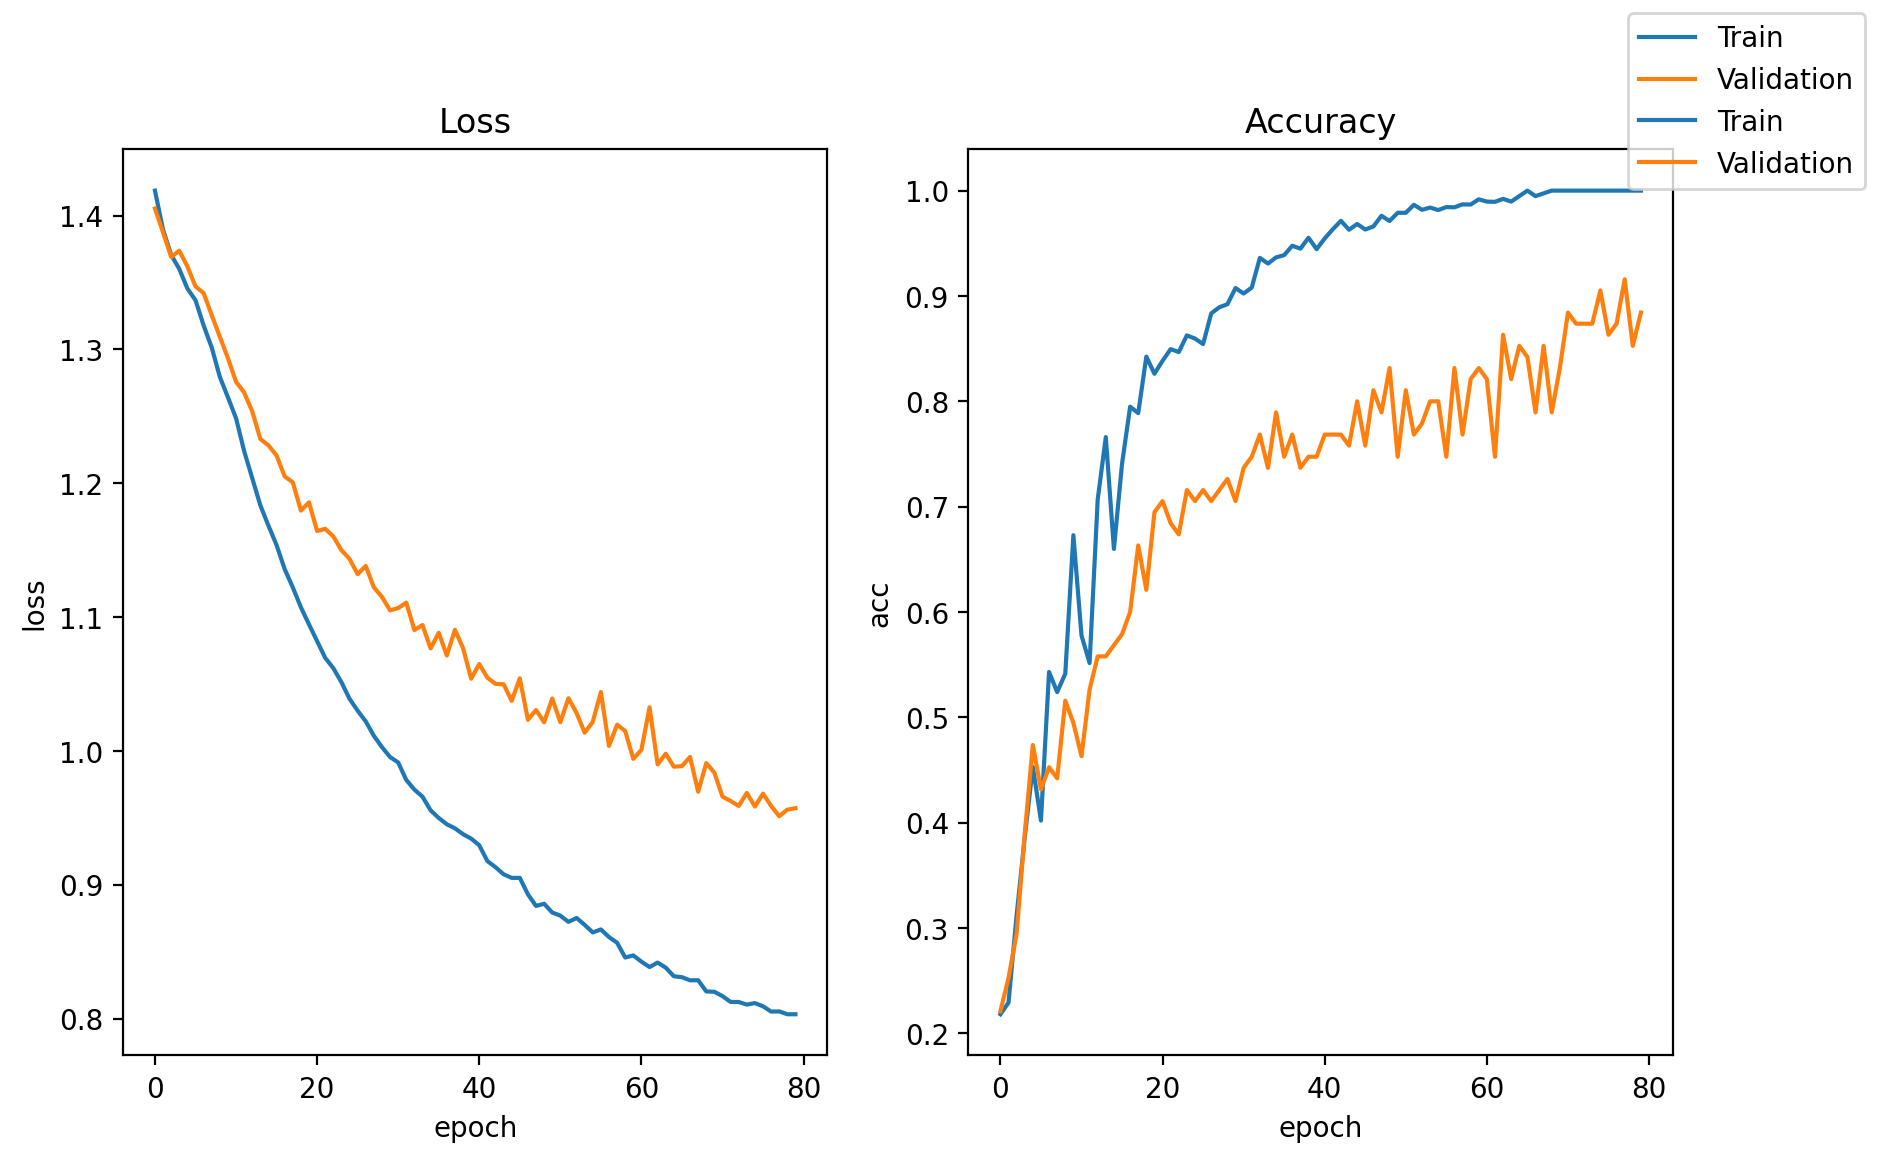

Test accuracy in trail 2: 0.69
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.387057	0.288268	1.384370	0.252632	
1	1.363527	0.314310	1.373652	0.315789	
2	1.339119	0.422405	1.379350	0.400000	
3	1.324096	0.464292	1.368944	0.357895	
4	1.307293	0.533325	1.354878	0.378947	
5	1.285938	0.512270	1.343507	0.452632	
6	1.264767	0.578037	1.332715	0.357895	
7	1.245061	0.612112	1.317720	0.421053	
8	1.230477	0.568459	1.303641	0.484211	
9	1.209013	0.615157	1.295167	0.421053	
10	1.190696	0.639257	1.274804	0.494737	
11	1.173170	0.635549	1.262125	0.505263	
12	1.156384	0.673332	1.257015	0.494737	
13	1.140776	0.697652	1.242054	0.536842	
14	1.125294	0.706303	1.224489	0.526316	
15	1.114031	0.786414	1.226817	0.494737	
16	1.097031	0.802260	1.207860	0.526316	
17	1.080482	0.789018	1.209249	0.547368	
18	1.066992	0.833510	1.195469	0.578947	
19	1.053584	0.822873	1.200563	0.547368	
20	1.042284	0.846751	1.182633	0.631579	
21	1.028973	0.872793	1.187514	0.589474	
22	1.023675	0.868468	1.163263	0.65

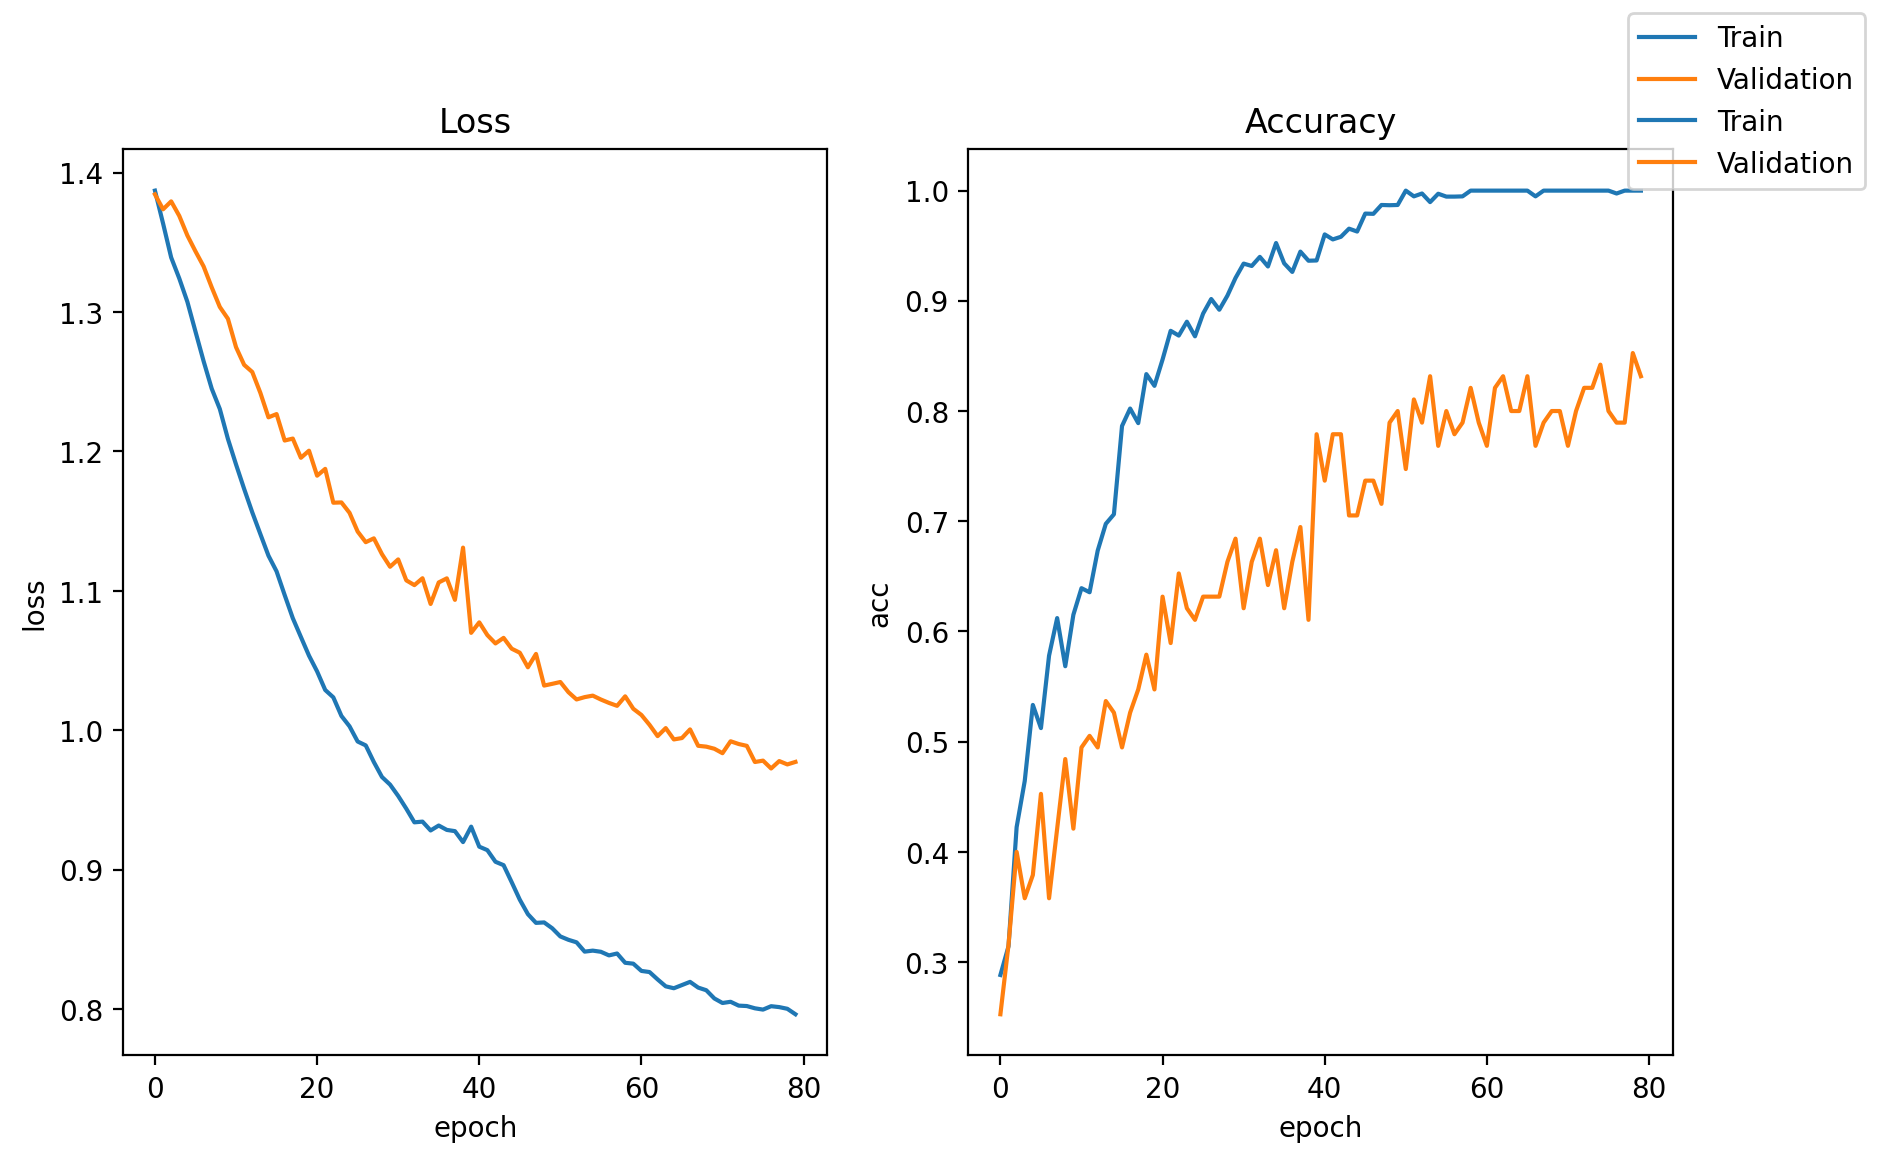

Test accuracy in trail 3: 0.7
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.398463	0.256356	1.359281	0.315789	
1	1.374662	0.274364	1.355072	0.484211	
2	1.357740	0.402189	1.365715	0.294737	
3	1.338963	0.440634	1.348718	0.410526	
4	1.324774	0.477975	1.328650	0.484211	
5	1.306859	0.563471	1.331525	0.431579	
6	1.289911	0.517258	1.309363	0.452632	
7	1.269088	0.544183	1.308684	0.442105	
8	1.249079	0.564354	1.291062	0.463158	
9	1.229477	0.555659	1.277638	0.484211	
10	1.216841	0.663091	1.265053	0.505263	
11	1.193707	0.628178	1.262930	0.505263	
12	1.175415	0.682645	1.252120	0.505263	
13	1.159633	0.693724	1.242994	0.494737	
14	1.146714	0.737818	1.227004	0.526316	
15	1.128850	0.725194	1.225368	0.547368	
16	1.116405	0.772731	1.217812	0.536842	
17	1.103497	0.758828	1.209681	0.536842	
18	1.095421	0.836335	1.201269	0.568421	
19	1.080950	0.791402	1.193795	0.557895	
20	1.071444	0.844368	1.185723	0.621053	
21	1.060837	0.884093	1.178482	0.589474	
22	1.047187	0.841984	1.169718	0.578

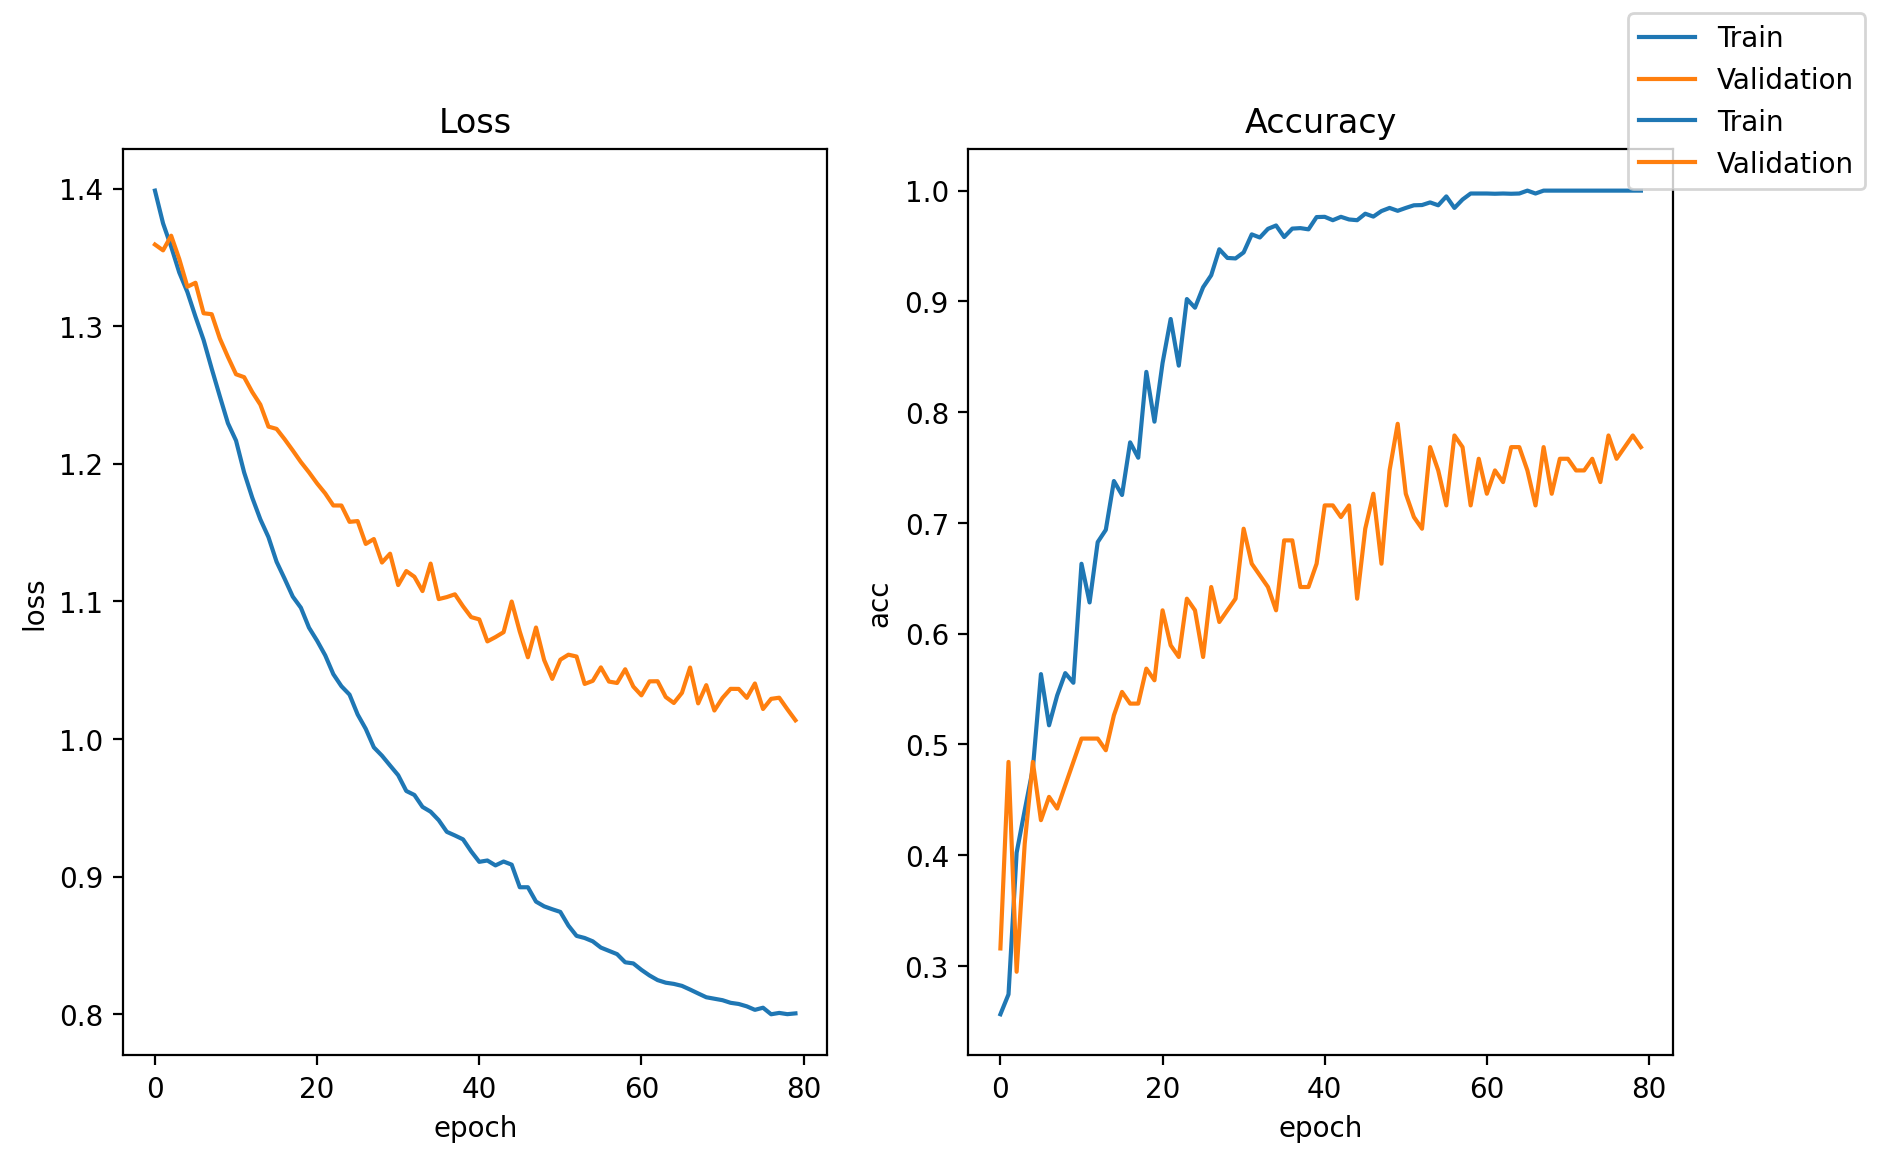

Test accuracy in trail 4: 0.76
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.398505	0.257857	1.393097	0.221053	
1	1.371530	0.323623	1.383590	0.284211	
2	1.360477	0.338365	1.373150	0.389474	
3	1.343890	0.387447	1.374755	0.326316	
4	1.324004	0.503178	1.348196	0.473684	
5	1.310719	0.535046	1.326398	0.484211	
6	1.290667	0.559587	1.321695	0.515789	
7	1.270519	0.602136	1.302145	0.536842	
8	1.255568	0.543300	1.279930	0.547368	
9	1.233565	0.589336	1.279286	0.526316	
10	1.217365	0.623190	1.256744	0.557895	
11	1.200071	0.612332	1.250624	0.568421	
12	1.183470	0.636432	1.241792	0.536842	
13	1.166481	0.646849	1.241849	0.515789	
14	1.157096	0.675274	1.229177	0.536842	
15	1.142683	0.704361	1.232839	0.547368	
16	1.133694	0.757989	1.226260	0.526316	
17	1.117075	0.744306	1.216610	0.526316	
18	1.108879	0.775556	1.224792	0.557895	
19	1.092293	0.810293	1.216764	0.557895	
20	1.085699	0.826139	1.206977	0.610526	
21	1.077974	0.873676	1.211601	0.536842	
22	1.067896	0.796389	1.210134	0.55

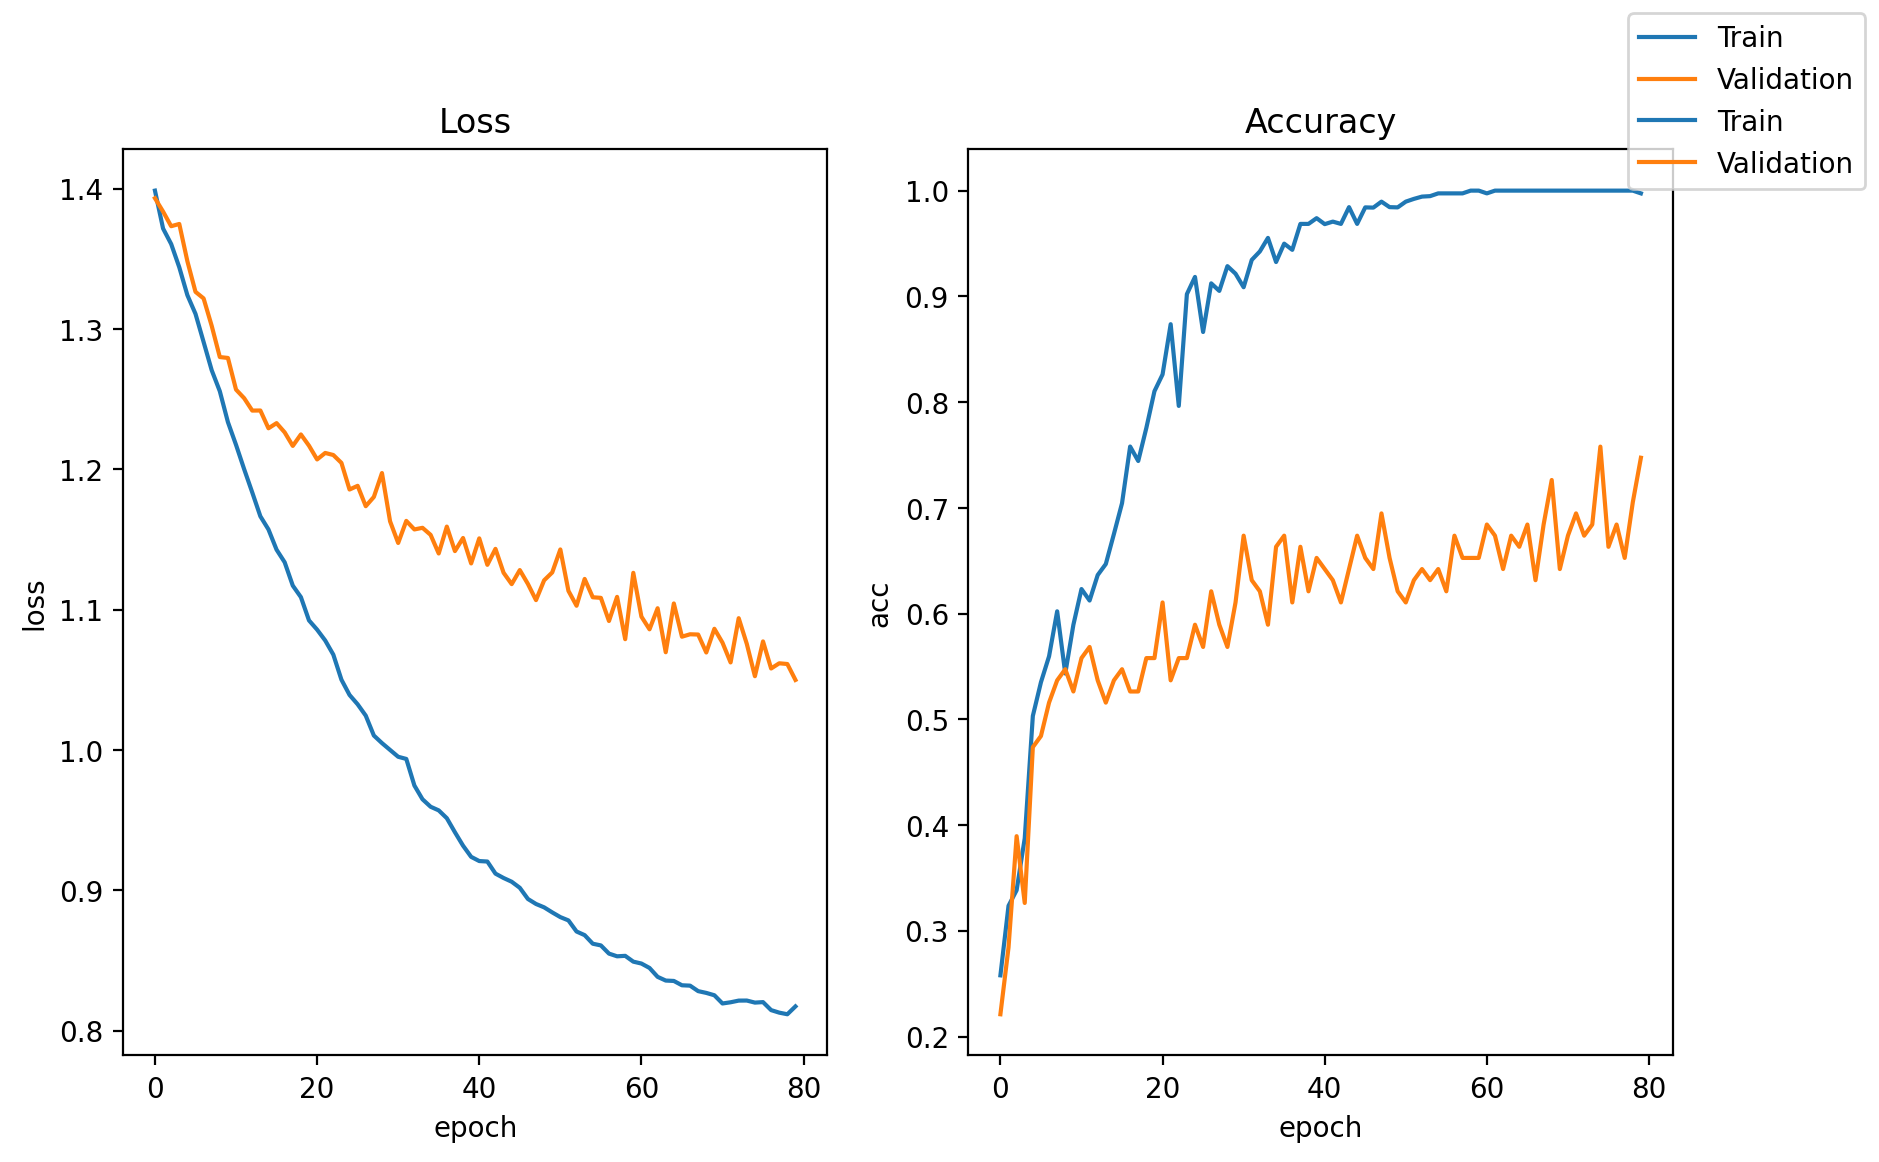

Test accuracy in trail 5: 0.72
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.388929	0.284560	1.406743	0.189474	
1	1.363224	0.302348	1.393066	0.231579	
2	1.346697	0.413930	1.386075	0.305263	
3	1.333354	0.474267	1.385233	0.231579	
4	1.319127	0.478637	1.374305	0.315789	
5	1.303834	0.524629	1.371298	0.336842	
6	1.289961	0.527675	1.355395	0.400000	
7	1.272791	0.590395	1.342734	0.389474	
8	1.256906	0.621425	1.329974	0.431579	
9	1.240047	0.594942	1.314269	0.400000	
10	1.223367	0.643362	1.293228	0.494737	
11	1.212564	0.629017	1.290071	0.473684	
12	1.190705	0.712835	1.275605	0.526316	
13	1.178010	0.660929	1.265473	0.484211	
14	1.156871	0.702198	1.250670	0.494737	
15	1.140413	0.761873	1.227007	0.600000	
16	1.126142	0.722590	1.221969	0.610526	
17	1.112930	0.812235	1.206668	0.631579	
18	1.095566	0.841543	1.195694	0.578947	
19	1.089417	0.760593	1.189743	0.600000	
20	1.079304	0.862818	1.175213	0.642105	
21	1.065337	0.819386	1.177366	0.621053	
22	1.053753	0.847193	1.171367	0.67

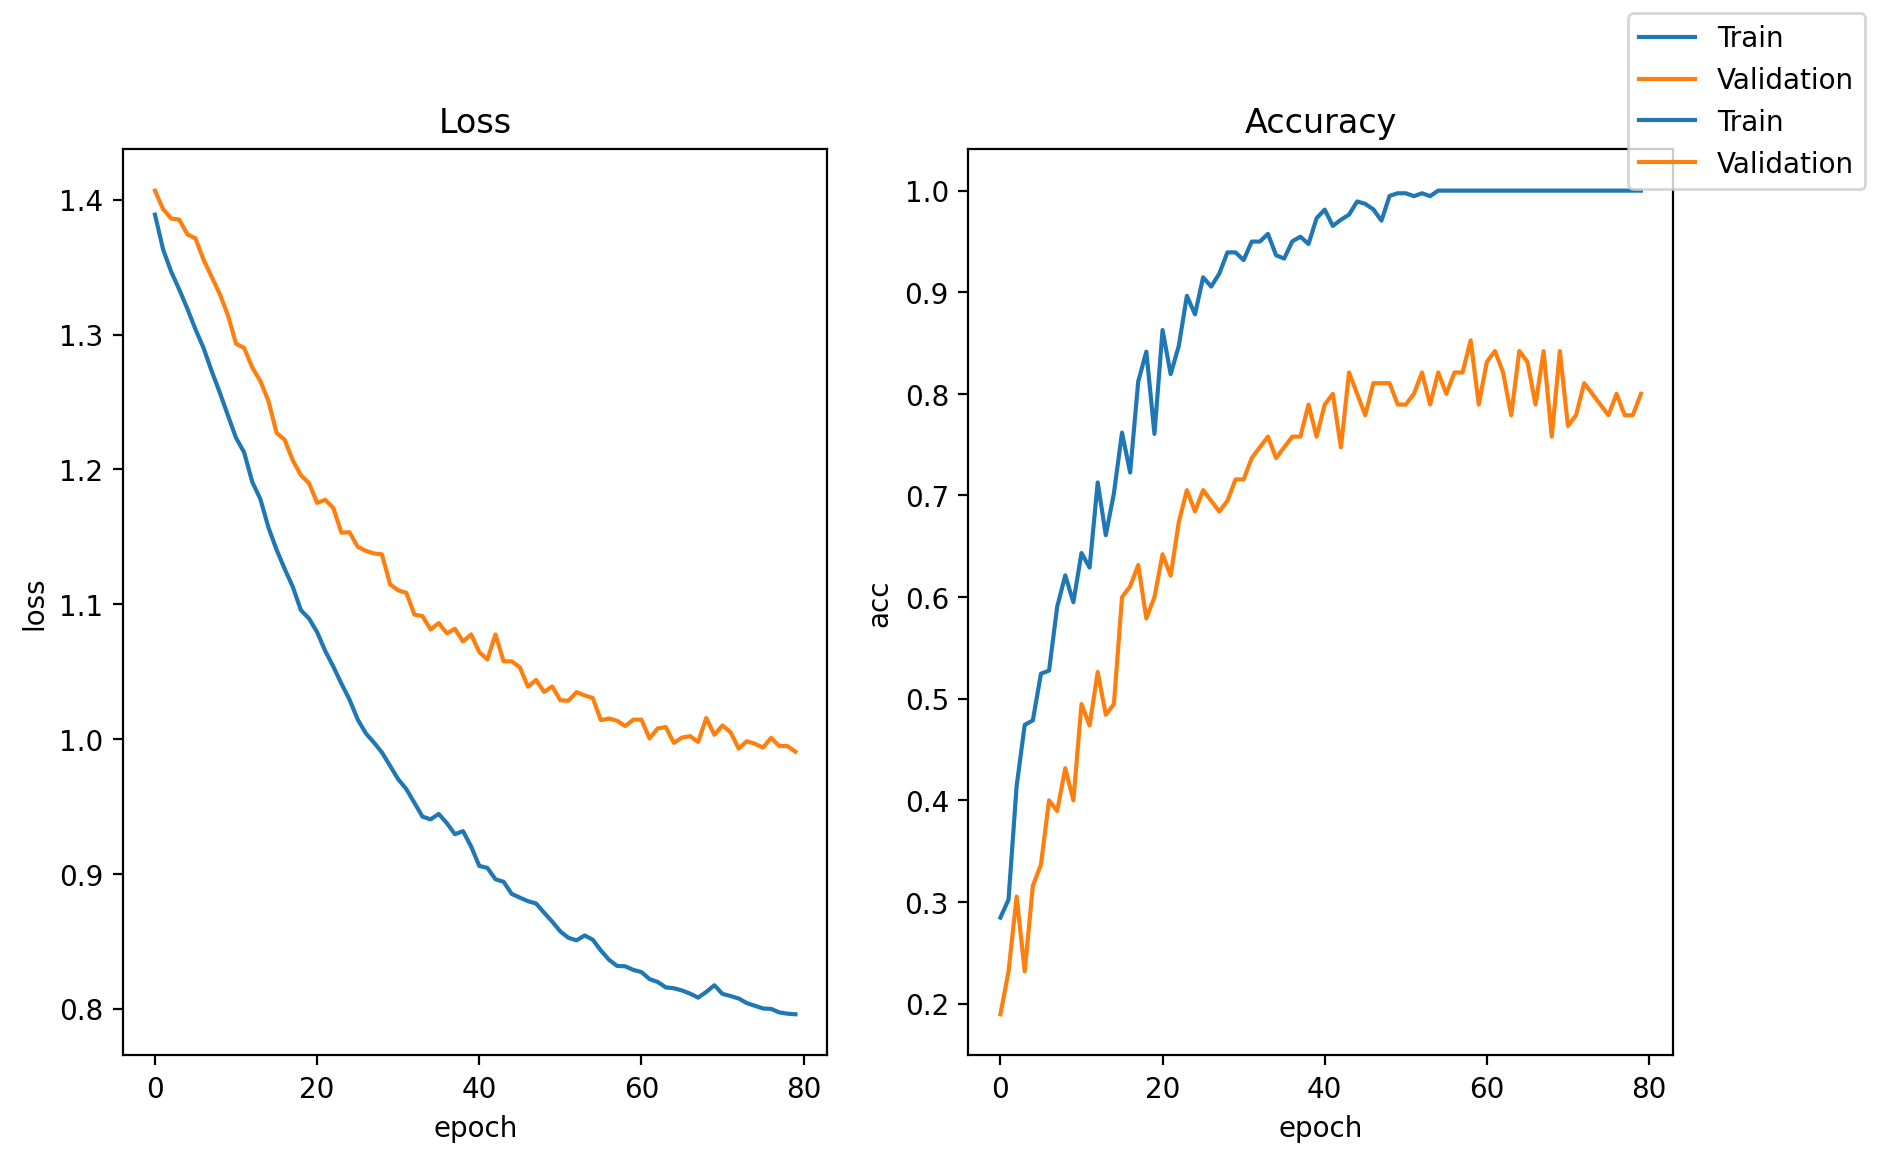

Test accuracy in trail 6: 0.76
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.395207	0.240510	1.391369	0.252632	
1	1.361796	0.327331	1.409269	0.136842	
2	1.356768	0.444518	1.360614	0.378947	
3	1.336564	0.436750	1.374102	0.284211	
4	1.322302	0.485787	1.354908	0.410526	
5	1.304154	0.590395	1.320413	0.526316	
6	1.288977	0.597590	1.319477	0.526316	
7	1.273151	0.652057	1.308331	0.505263	
8	1.250710	0.633386	1.260205	0.600000	
9	1.235126	0.646407	1.270145	0.621053	
10	1.218612	0.701536	1.240805	0.652632	
11	1.200504	0.651395	1.222270	0.610526	
12	1.185490	0.707406	1.226528	0.652632	
13	1.168380	0.719986	1.203419	0.642105	
14	1.155188	0.724091	1.209390	0.642105	
15	1.139356	0.742143	1.178235	0.673684	
16	1.128618	0.744527	1.183426	0.673684	
17	1.120118	0.753840	1.170118	0.663158	
18	1.105535	0.777719	1.159799	0.694737	
19	1.096239	0.809410	1.163721	0.694737	
20	1.085653	0.774055	1.144351	0.715789	
21	1.071135	0.840042	1.162306	0.705263	
22	1.061495	0.847634	1.148395	0.70

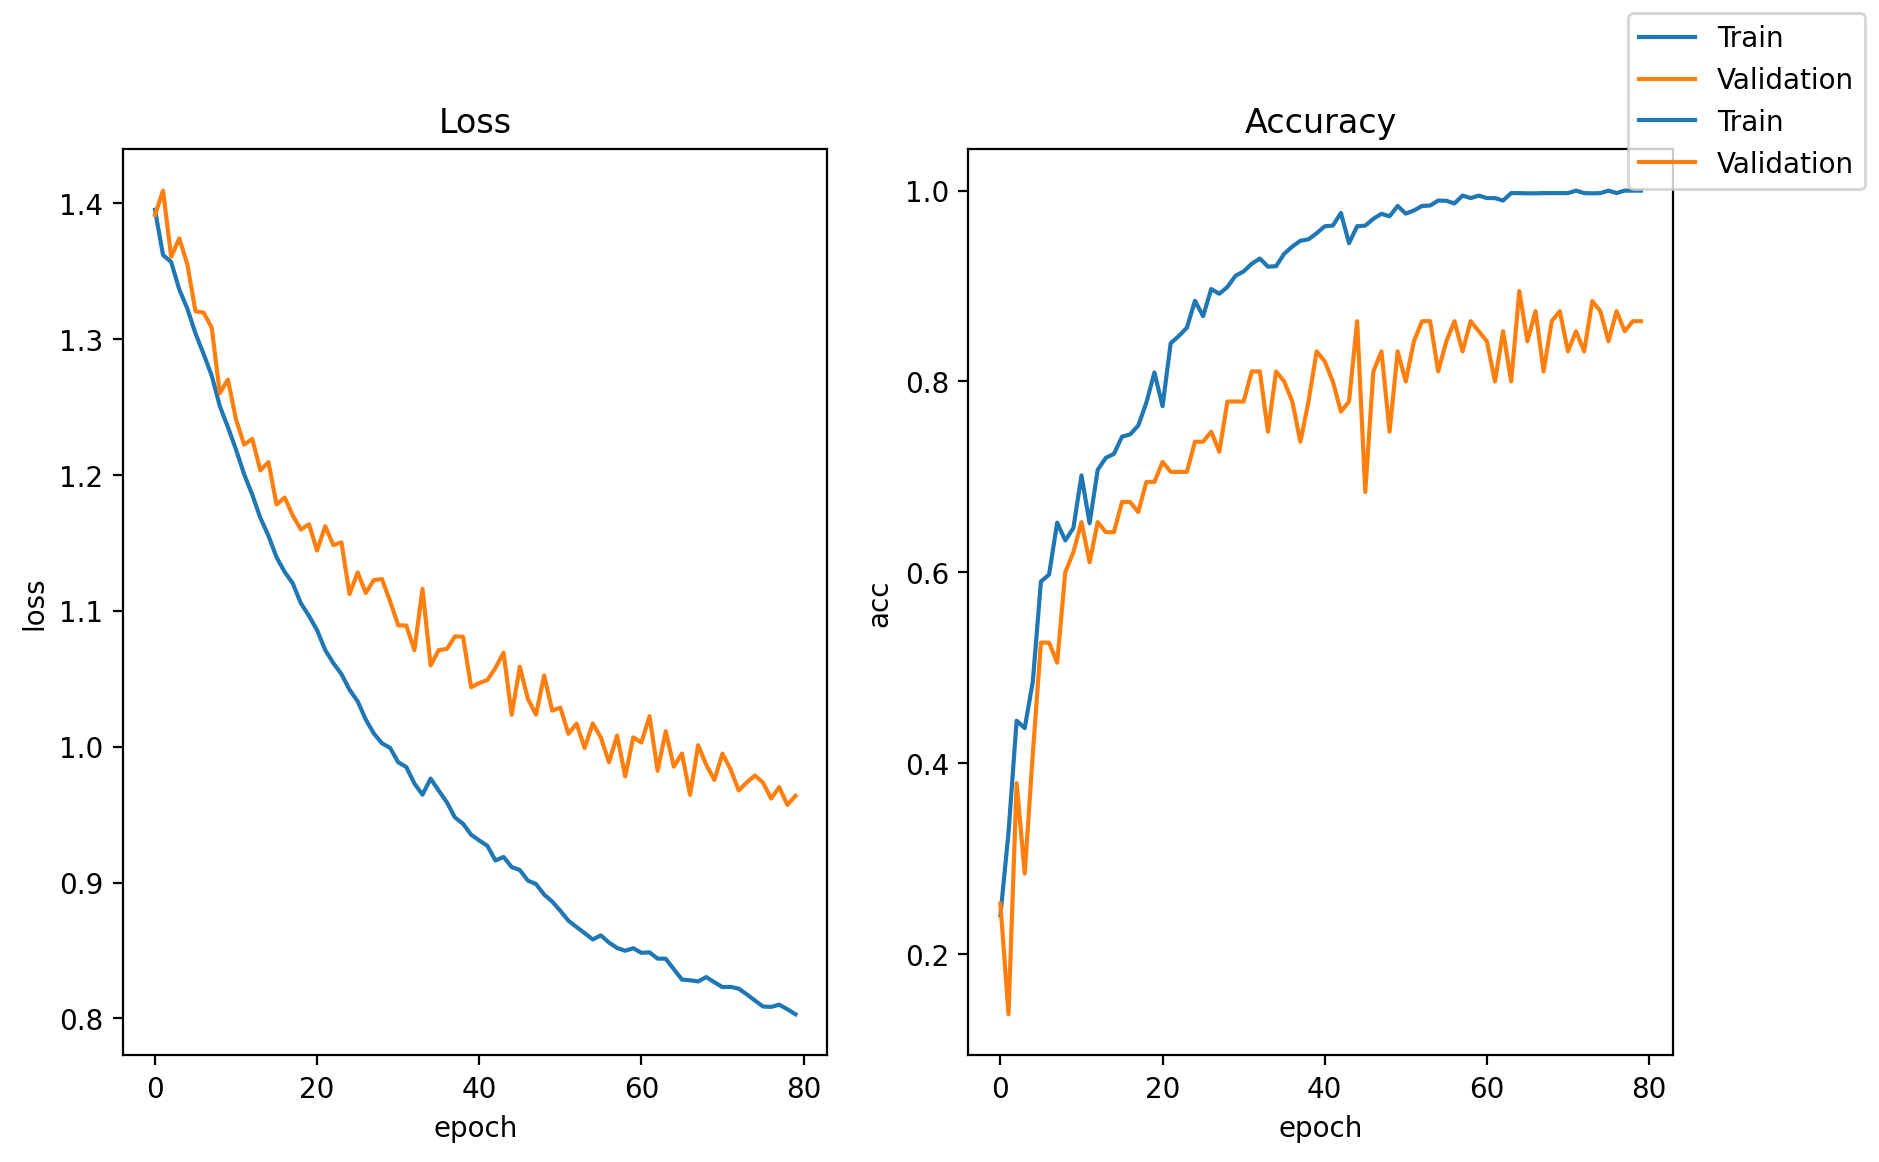

Test accuracy in trail 7: 0.79
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.401251	0.278911	1.369719	0.294737	
1	1.369074	0.324064	1.357948	0.347368	
2	1.350123	0.366614	1.337741	0.400000	
3	1.345866	0.415872	1.329873	0.515789	
4	1.315163	0.465793	1.322488	0.400000	
5	1.305159	0.472105	1.319349	0.463158	
6	1.287408	0.566296	1.293582	0.547368	
7	1.267056	0.573490	1.277973	0.557895	
8	1.254216	0.554334	1.262476	0.557895	
9	1.232995	0.591058	1.250309	0.568421	
10	1.220696	0.684808	1.246344	0.600000	
11	1.203111	0.641199	1.228167	0.610526	
12	1.187038	0.695048	1.223299	0.621053	
13	1.168773	0.731462	1.197752	0.600000	
14	1.155720	0.720427	1.201473	0.642105	
15	1.141847	0.768847	1.184380	0.673684	
16	1.129520	0.740819	1.185580	0.673684	
17	1.122539	0.782265	1.163566	0.663158	
18	1.108352	0.803143	1.167660	0.705263	
19	1.093009	0.823535	1.154160	0.684211	
20	1.080657	0.805305	1.158348	0.705263	
21	1.069920	0.863038	1.141506	0.684211	
22	1.064256	0.840263	1.139589	0.74

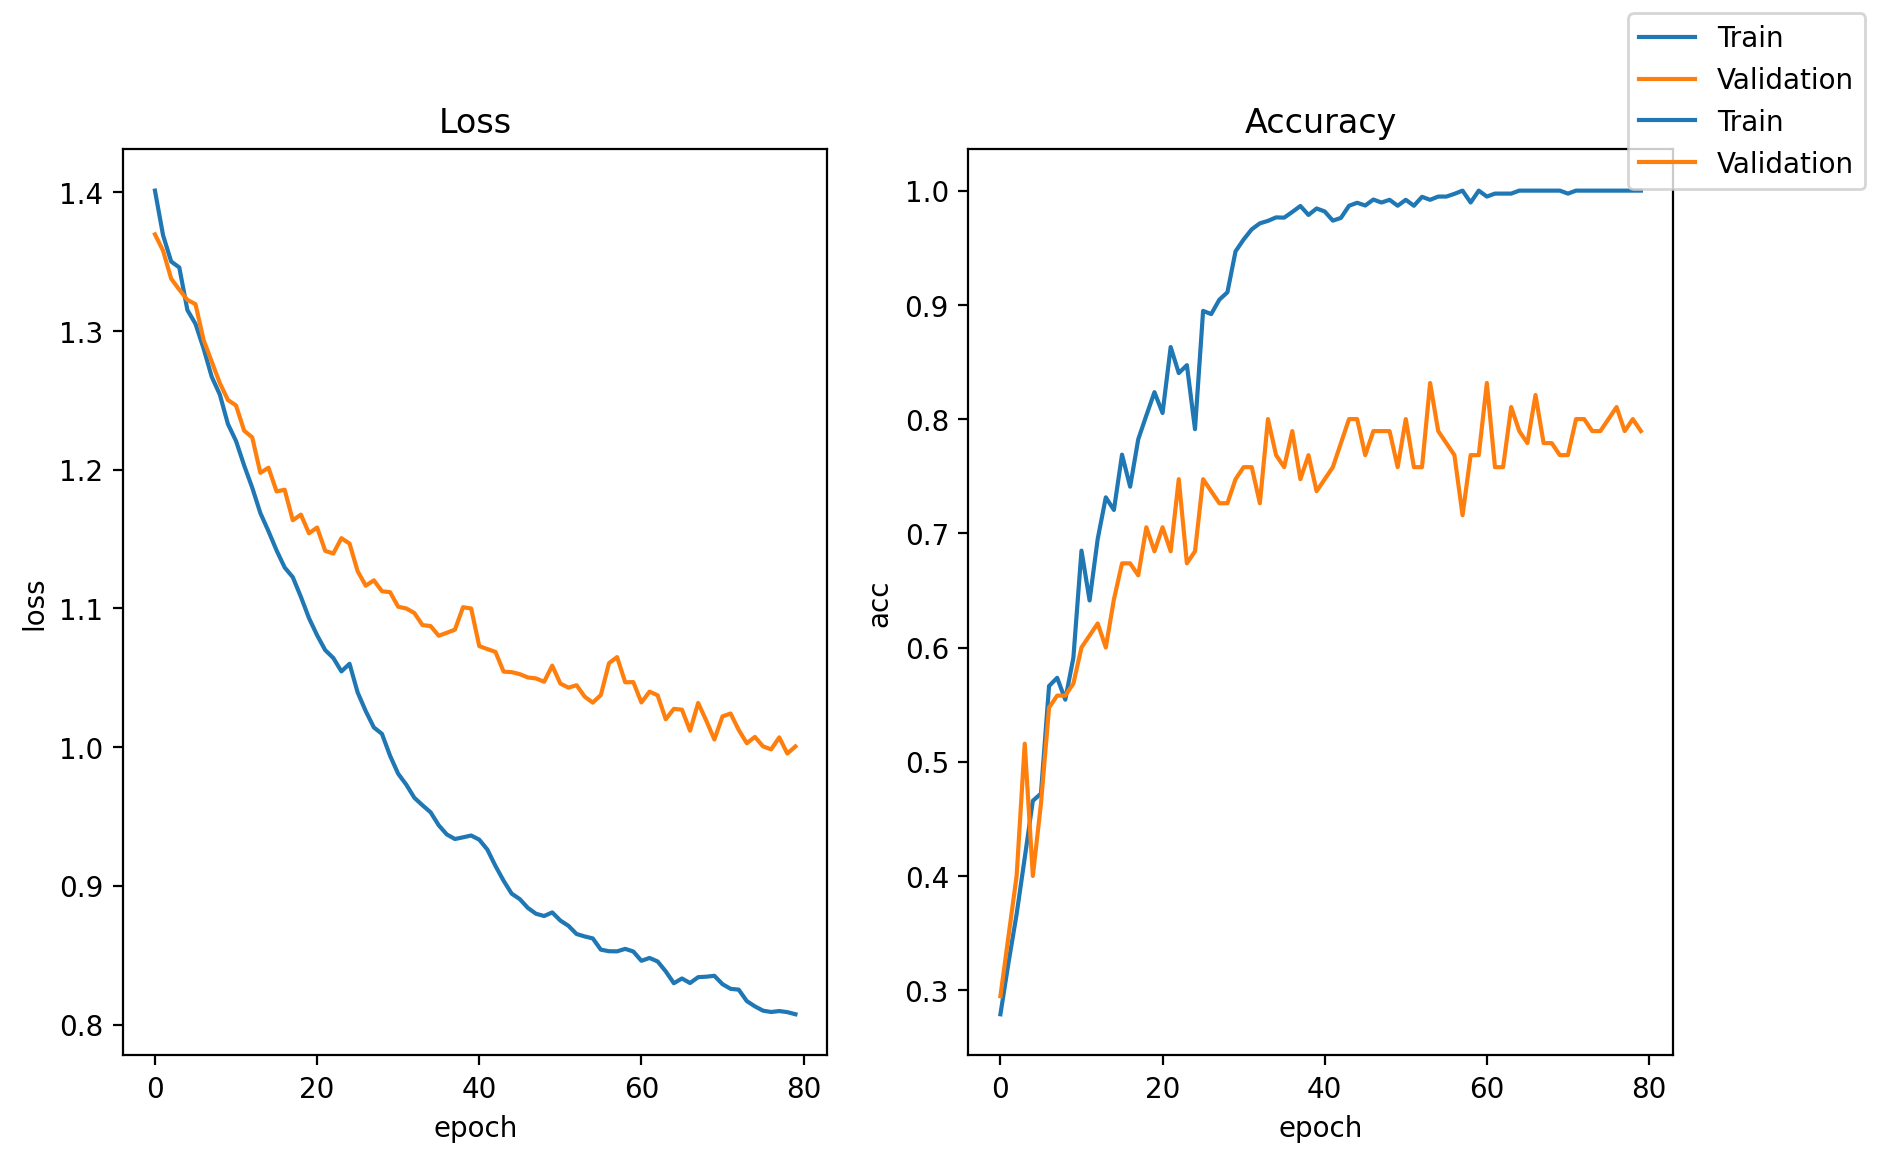

Test accuracy in trail 8: 0.71
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.397673	0.243776	1.374865	0.315789	
1	1.365958	0.324285	1.405095	0.136842	
2	1.351904	0.358183	1.366039	0.378947	
3	1.340366	0.442135	1.393786	0.210526	
4	1.321389	0.386785	1.365402	0.368421	
5	1.304527	0.509048	1.346760	0.400000	
6	1.286188	0.498808	1.341062	0.400000	
7	1.265680	0.512050	1.323824	0.421053	
8	1.246197	0.520745	1.307675	0.473684	
9	1.225800	0.572828	1.290407	0.505263	
10	1.207965	0.584128	1.270875	0.547368	
11	1.192987	0.582362	1.260317	0.505263	
12	1.172581	0.663136	1.253801	0.547368	
13	1.157687	0.713277	1.237484	0.568421	
14	1.145858	0.655720	1.223824	0.578947	
15	1.131960	0.746248	1.217816	0.631579	
16	1.115118	0.750794	1.210686	0.578947	
17	1.104611	0.767523	1.185496	0.694737	
18	1.091481	0.787518	1.191821	0.589474	
19	1.080196	0.818326	1.177765	0.642105	
20	1.068773	0.805747	1.174437	0.684211	
21	1.057875	0.841322	1.168573	0.631579	
22	1.044991	0.871072	1.161582	0.68

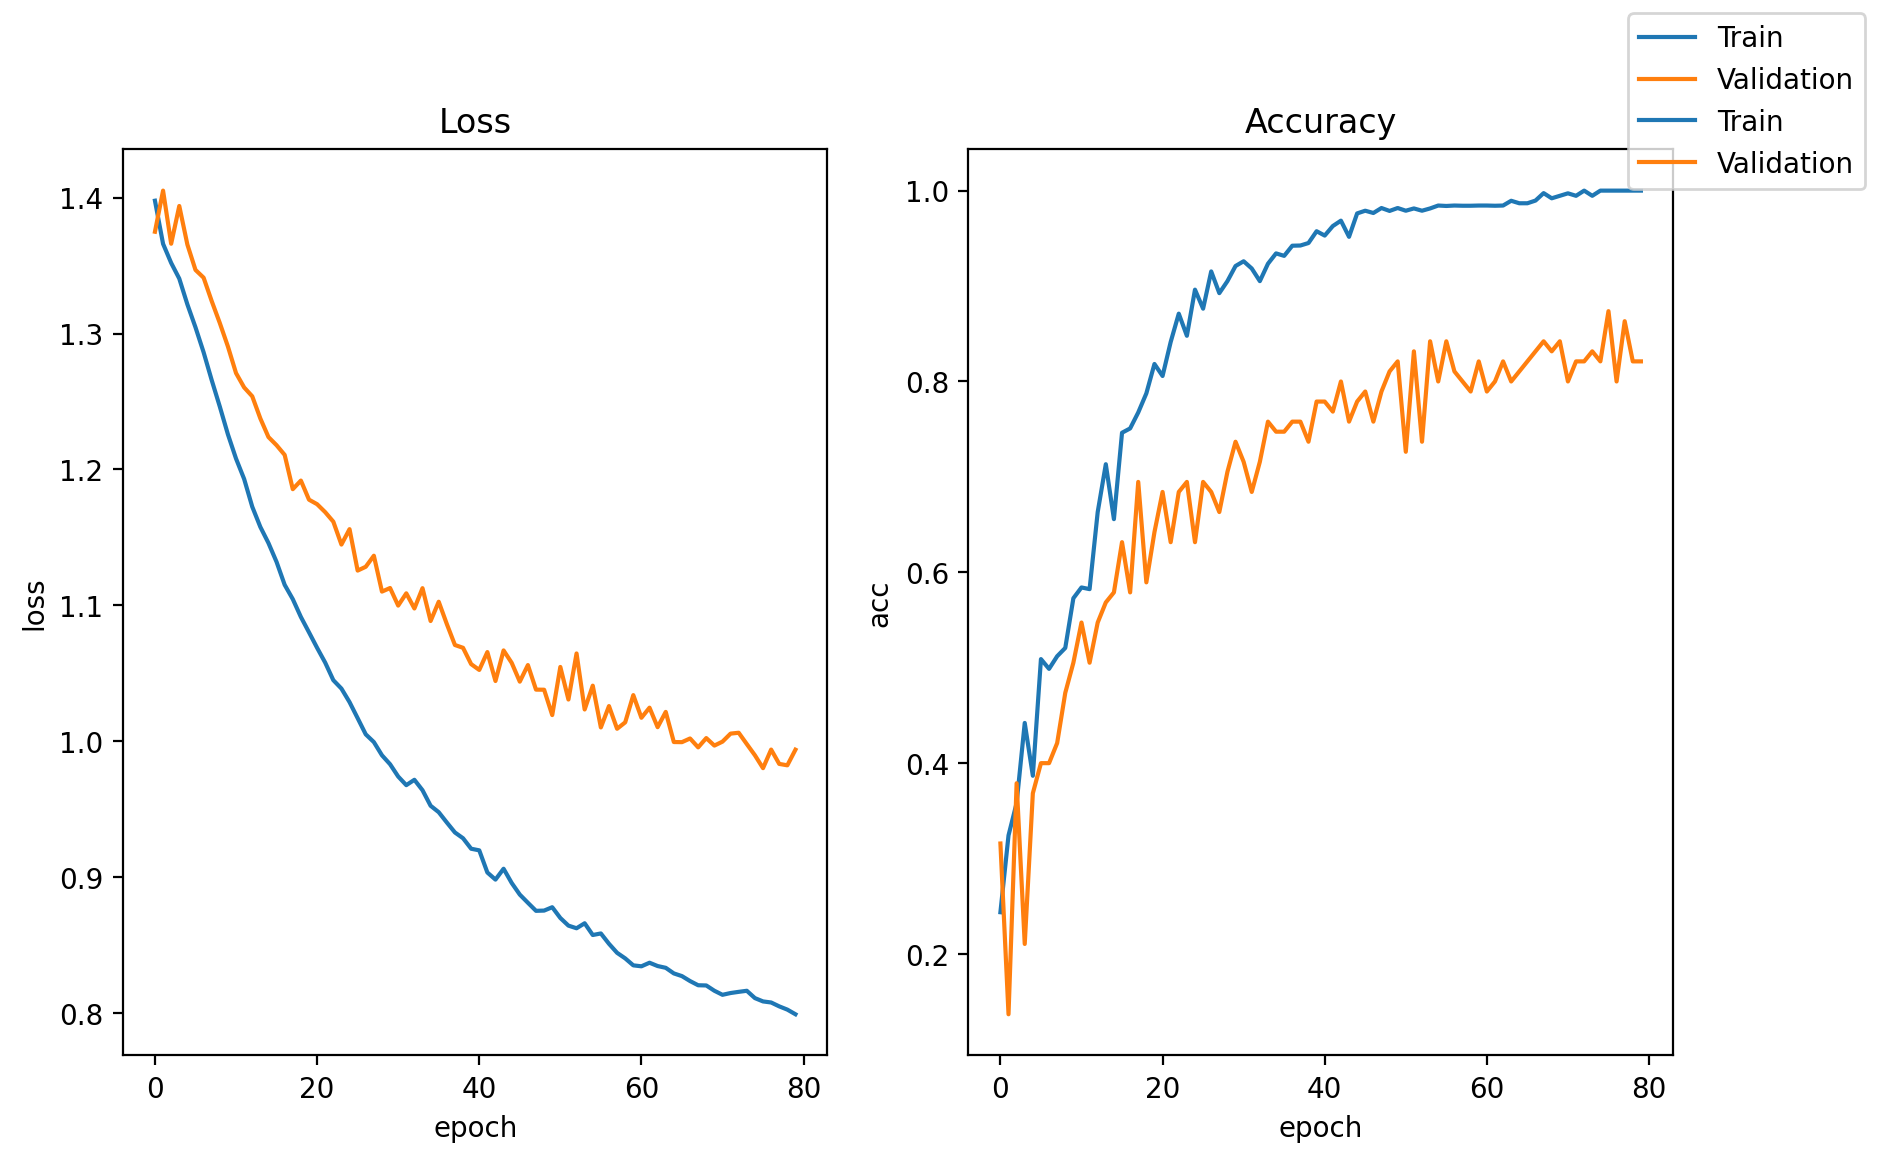

Test accuracy in trail 9: 0.69
The average test accuracy:0.725


In [26]:
train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 150,
    'scheduler_factor': 0.3,
    'weight_decay': 0.10,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 80,
    'downsample_split': True,
    'overfit_threshold':0,
}
dsp_opt ={
    'conv_size':[7,13],
    'conv_out_channel' : [10,10],
    'fc1_out_channel' :32,
    'dropout_rate':0.95,
}
model = DSPShallowConv(in_channels=1,classes=4,option=dsp_opt).to('cuda')
summary(model.cuda(),(1,22,500))
loss_fn = nn.CrossEntropyLoss()

data_dir = {
    'X_train_dir': sub0_X_train_val,
    'y_train_dir':sub0_y_train_val,
    'X_test_dir': sub0_X_test,
    'y_test_dir':sub0_y_test,
}

test_acc,avg_acc = avg_test_acc(PSCNN,(1,22,500),data_dir,loss_fn,
                        train_options,dsp_opt,trails=10)
print('The average test accuracy:{}'.format(avg_acc))

In [27]:
print('PSCNN average test accuracy:{}'.format(avg_acc))

PSCNN average test accuracy:0.725


## Test on TSCNN

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.398052	0.249426	1.372588	0.326316	
1	1.384323	0.266331	1.389346	0.263158	
2	1.379203	0.280632	1.390043	0.263158	
3	1.370513	0.353814	1.387610	0.263158	
4	1.364265	0.440192	1.382288	0.273684	
5	1.360084	0.370277	1.376981	0.263158	
6	1.353224	0.426554	1.365768	0.431579	
7	1.346870	0.533325	1.371206	0.273684	
8	1.337262	0.609287	1.362016	0.389474	
9	1.332297	0.550450	1.356311	0.389474	
10	1.326323	0.595604	1.344367	0.494737	
11	1.315857	0.589557	1.342250	0.484211	
12	1.307734	0.580200	1.329113	0.505263	
13	1.304086	0.509004	1.314275	0.536842	
14	1.290713	0.522466	1.321323	0.494737	
15	1.285445	0.622528	1.308287	0.526316	
16	1.273555	0.564354	1.303655	0.515789	
17	1.265665	0.545463	1.293288	0.505263	
18	1.258283	0.569165	1.287156	0.515789	
19	1.248305	0.551774	1.284703	0.526316	
20	1.241496	0.530058	1.275615	0.505263	
21	1.235000	0.508121	1.264727	0.536842	
22	1.232244	0.650777	1.269316	0.568421	
23	1.221752	0.635990	1.26

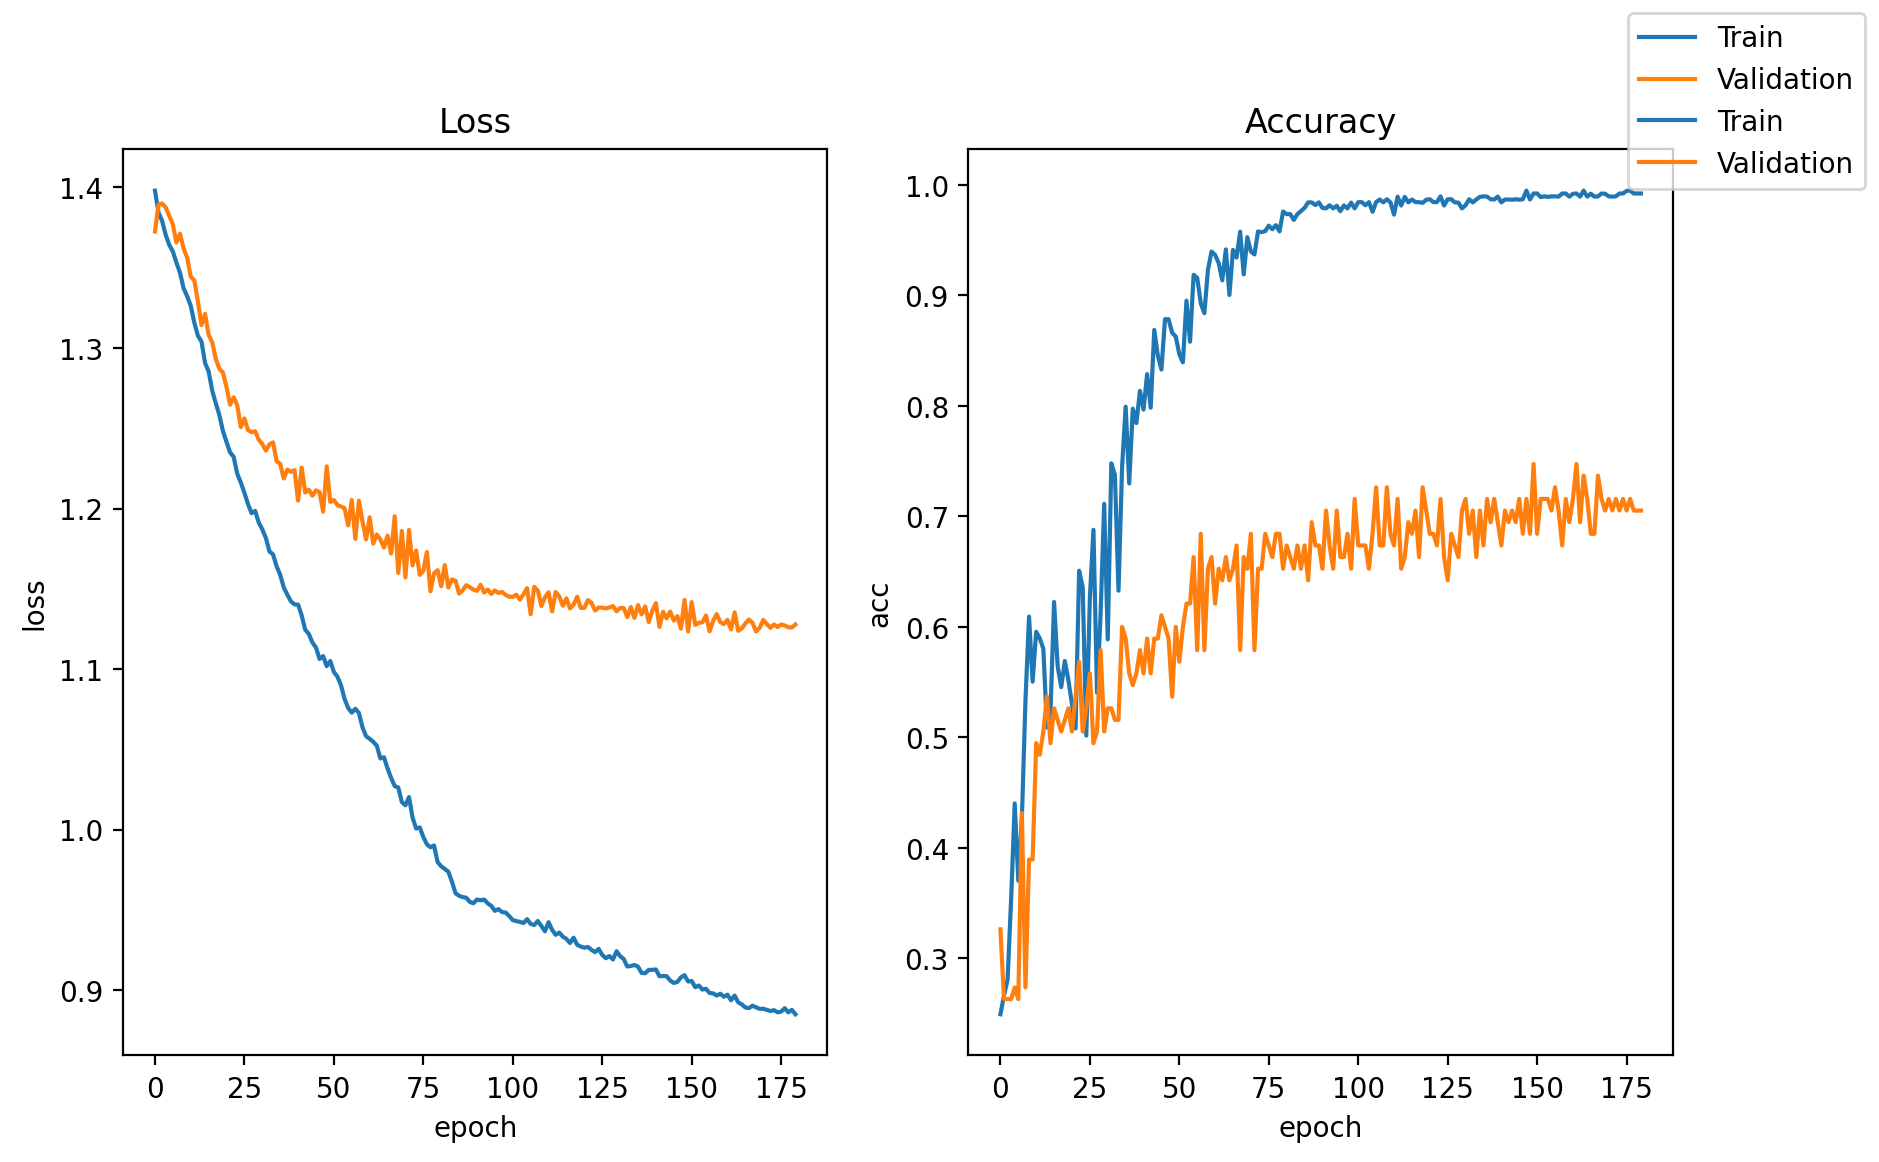

Test accuracy in trail 0: 0.73
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.383943	0.263727	1.392016	0.273684	
1	1.353622	0.347722	1.379145	0.315789	
2	1.331057	0.478416	1.381207	0.336842	
3	1.309049	0.499029	1.377349	0.336842	
4	1.289321	0.519200	1.371539	0.357895	
5	1.269196	0.558086	1.352288	0.347368	
6	1.251940	0.608183	1.346663	0.410526	
7	1.229281	0.641861	1.344082	0.378947	
8	1.211298	0.625574	1.309442	0.463158	
9	1.190890	0.688736	1.291468	0.536842	
10	1.171257	0.709790	1.284910	0.473684	
11	1.153083	0.725636	1.263079	0.557895	
12	1.137045	0.751898	1.241651	0.600000	
13	1.111681	0.768362	1.234123	0.589474	
14	1.094099	0.816384	1.230869	0.610526	
15	1.081910	0.844368	1.190607	0.610526	
16	1.061559	0.847413	1.214173	0.631579	
17	1.046738	0.894730	1.172636	0.610526	
18	1.036417	0.873455	1.182545	0.631579	
19	1.016581	0.896672	1.161073	0.673684	
20	1.005740	0.936397	1.144562	0.631579	
21	0.991174	0.936617	1.158790	0.652632	
22	0.977581	0.946813	1.131638	0.62

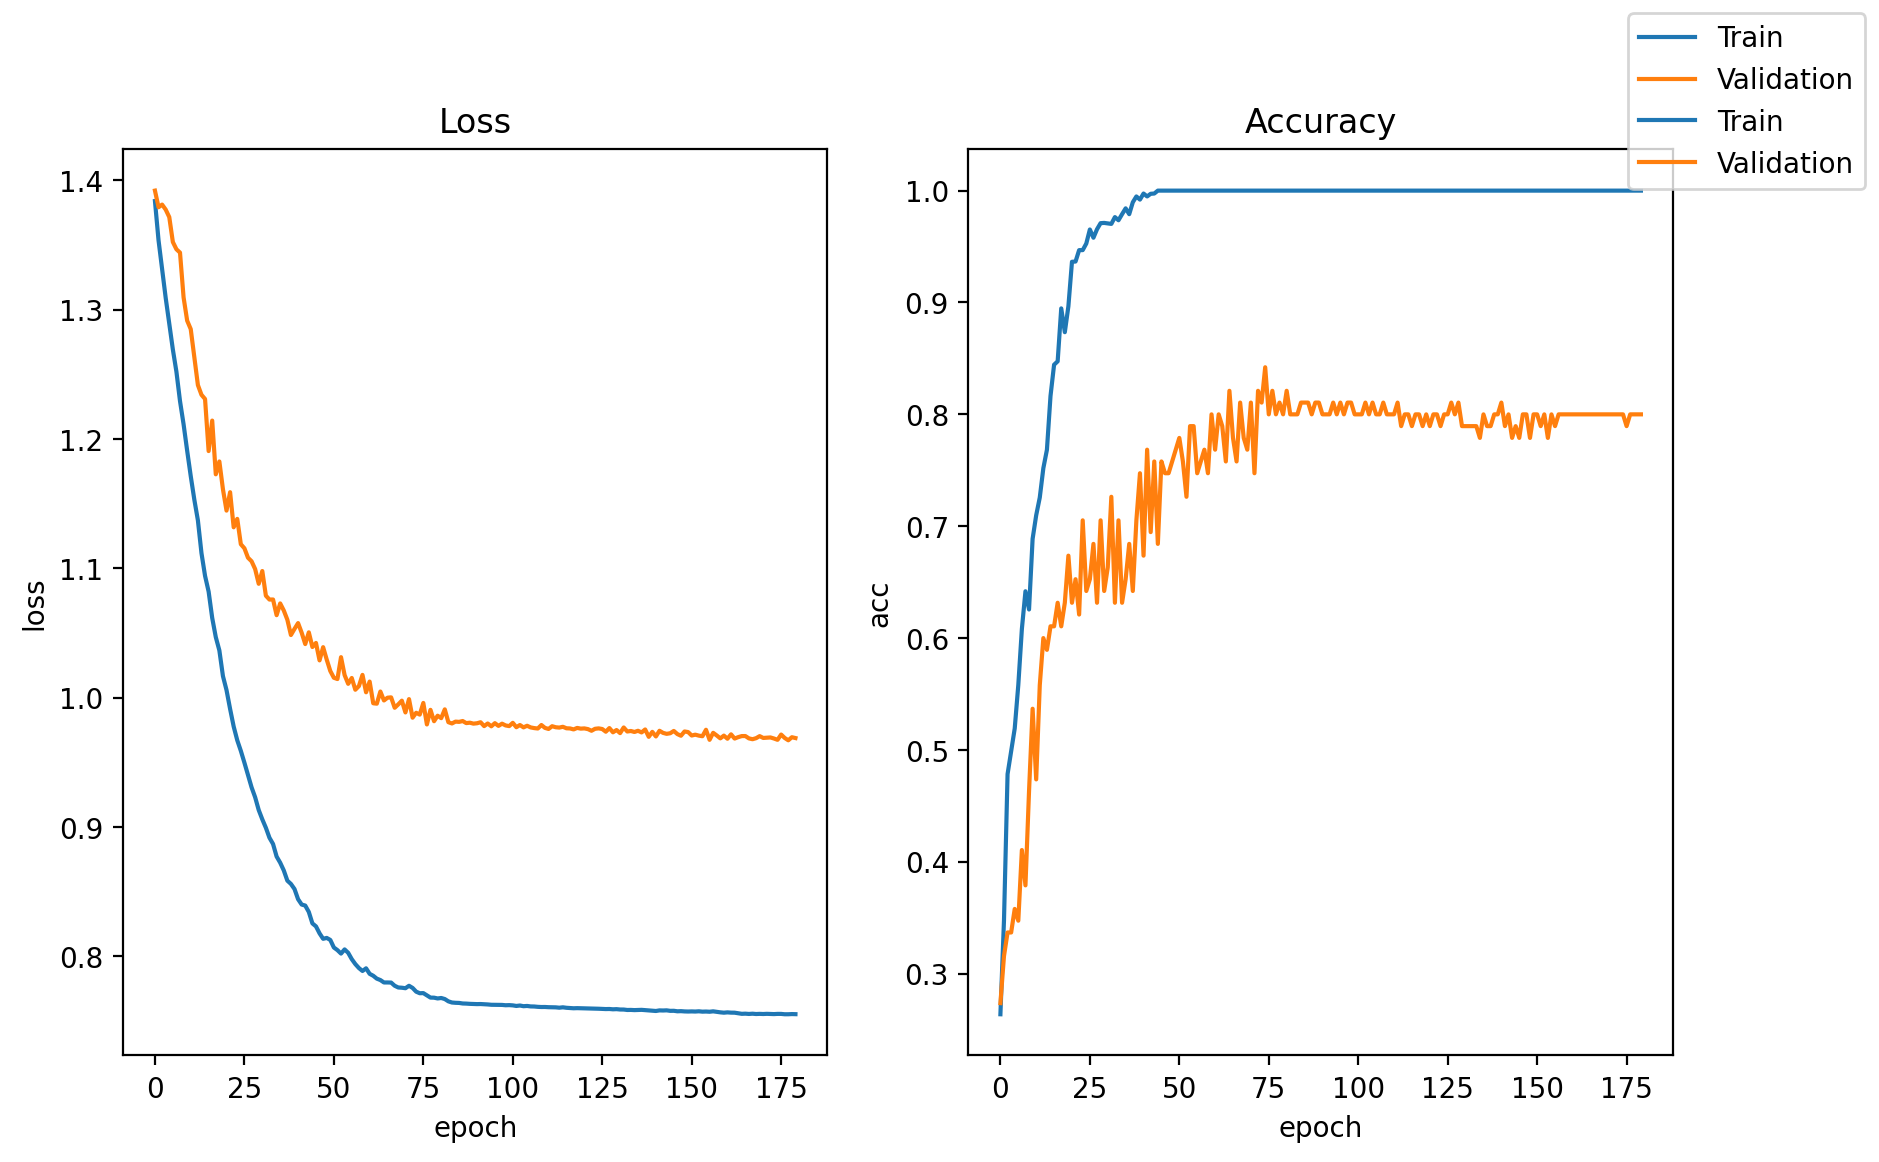

Test accuracy in trail 1: 0.79
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.383738	0.288489	1.391557	0.210526	
1	1.355398	0.444562	1.389062	0.242105	
2	1.335143	0.442179	1.379808	0.284211	
3	1.313398	0.480800	1.362164	0.357895	
4	1.291605	0.541358	1.352020	0.326316	
5	1.263944	0.561970	1.334397	0.431579	
6	1.239836	0.594544	1.317275	0.431579	
7	1.216219	0.640757	1.306503	0.421053	
8	1.194651	0.614274	1.291665	0.421053	
9	1.174818	0.716102	1.283682	0.410526	
10	1.156824	0.695224	1.264888	0.431579	
11	1.137015	0.759269	1.262449	0.452632	
12	1.118853	0.802039	1.241121	0.547368	
13	1.106719	0.778602	1.235119	0.526316	
14	1.084594	0.839380	1.218540	0.589474	
15	1.071218	0.833731	1.208682	0.578947	
16	1.057932	0.871513	1.203569	0.557895	
17	1.044528	0.852622	1.186567	0.652632	
18	1.030980	0.896231	1.174787	0.652632	
19	1.021669	0.916005	1.202437	0.547368	
20	1.022878	0.850680	1.153844	0.705263	
21	0.997541	0.920551	1.163928	0.631579	
22	0.983337	0.936617	1.140109	0.66

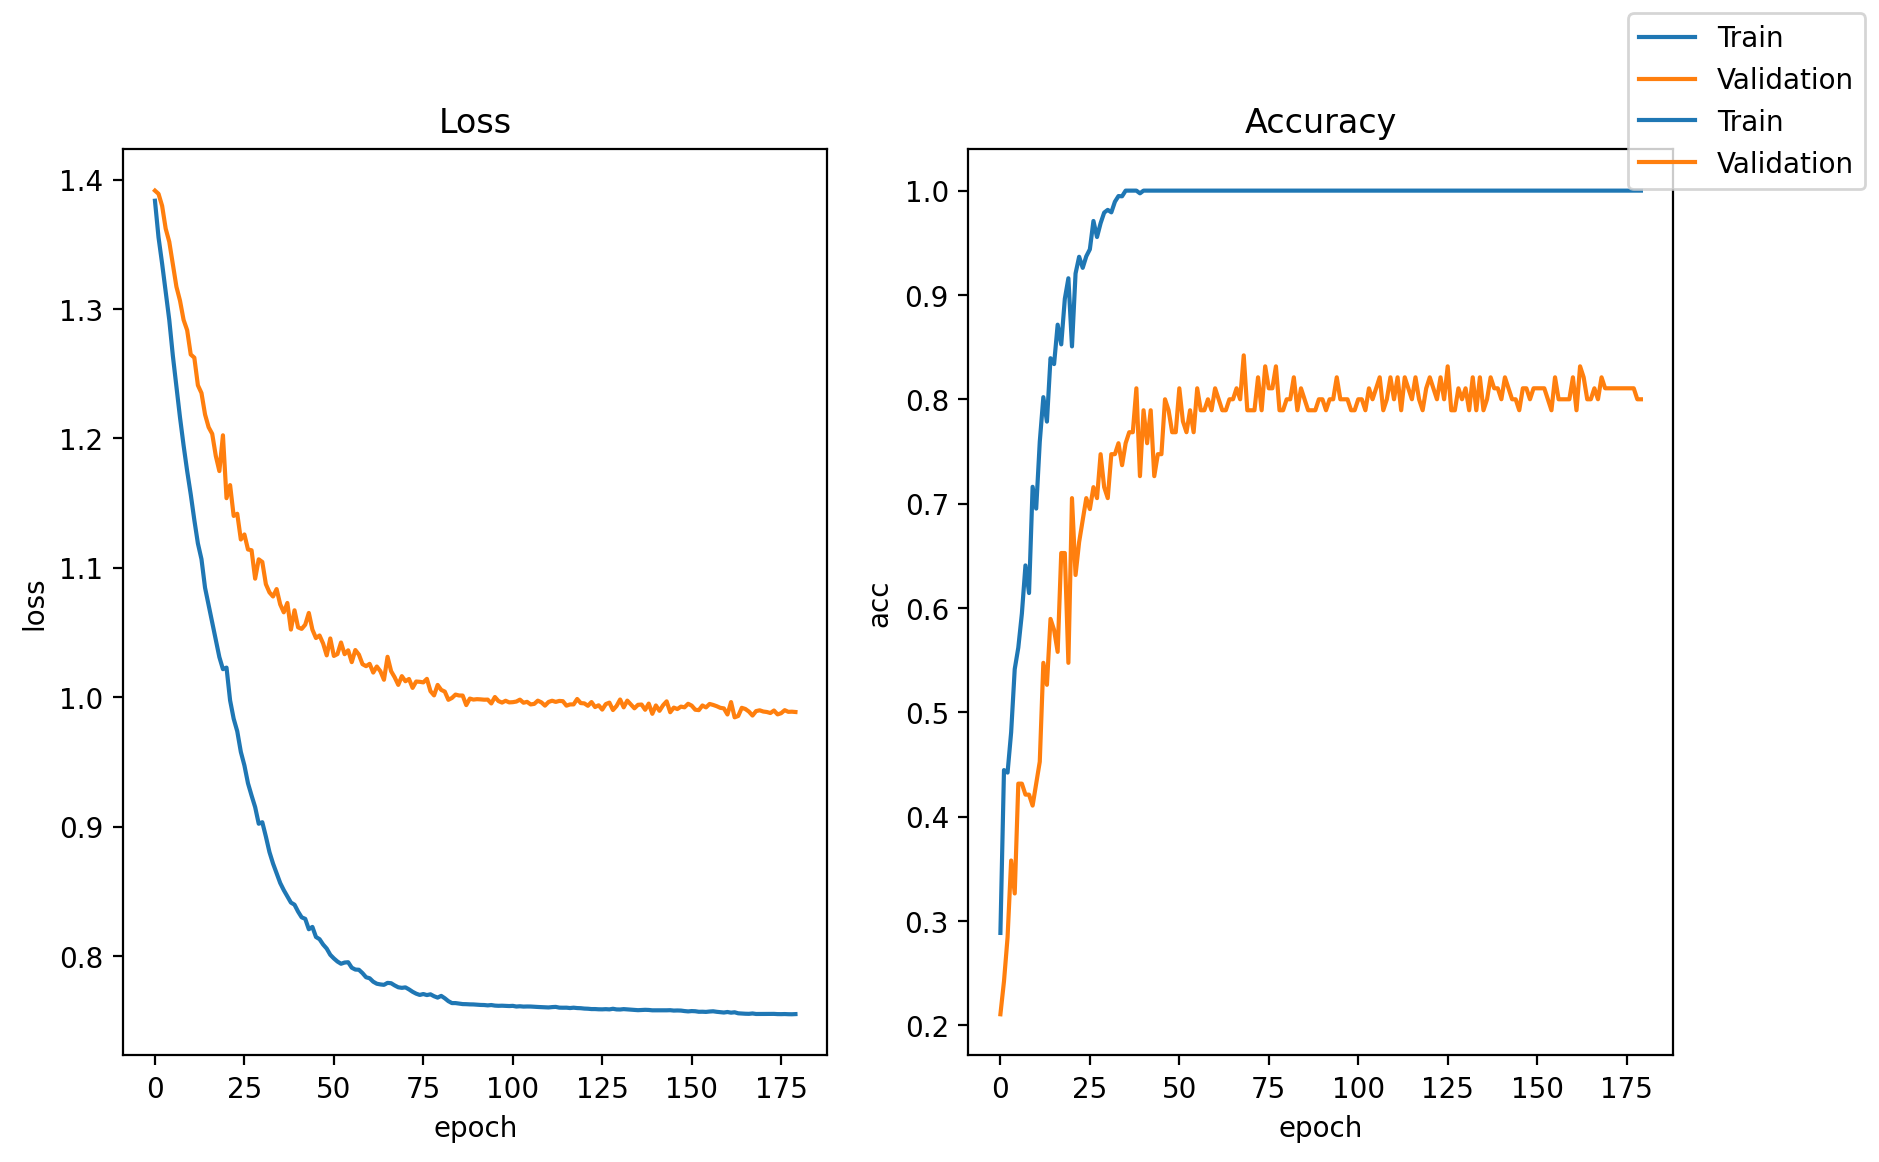

Test accuracy in trail 2: 0.78
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.392236	0.231815	1.424570	0.210526	
1	1.360499	0.274585	1.396084	0.210526	
2	1.343370	0.489495	1.383155	0.231579	
3	1.327654	0.520083	1.387531	0.200000	
4	1.314111	0.443856	1.386328	0.231579	
5	1.292923	0.543300	1.359779	0.421053	
6	1.275231	0.683307	1.345286	0.421053	
7	1.253684	0.672228	1.337819	0.378947	
8	1.229754	0.721089	1.314861	0.421053	
9	1.204512	0.767964	1.294774	0.442105	
10	1.180007	0.765581	1.282718	0.473684	
11	1.158098	0.792285	1.270320	0.463158	
12	1.138310	0.833951	1.263359	0.484211	
13	1.116809	0.784693	1.238401	0.494737	
14	1.098378	0.871292	1.244202	0.484211	
15	1.077307	0.852843	1.216669	0.536842	
16	1.062512	0.892346	1.220977	0.515789	
17	1.049815	0.896893	1.209963	0.547368	
18	1.039183	0.883651	1.207188	0.547368	
19	1.024897	0.912959	1.199372	0.547368	
20	1.009435	0.913180	1.182975	0.578947	
21	0.998770	0.923596	1.185559	0.568421	
22	0.987112	0.937059	1.174226	0.58

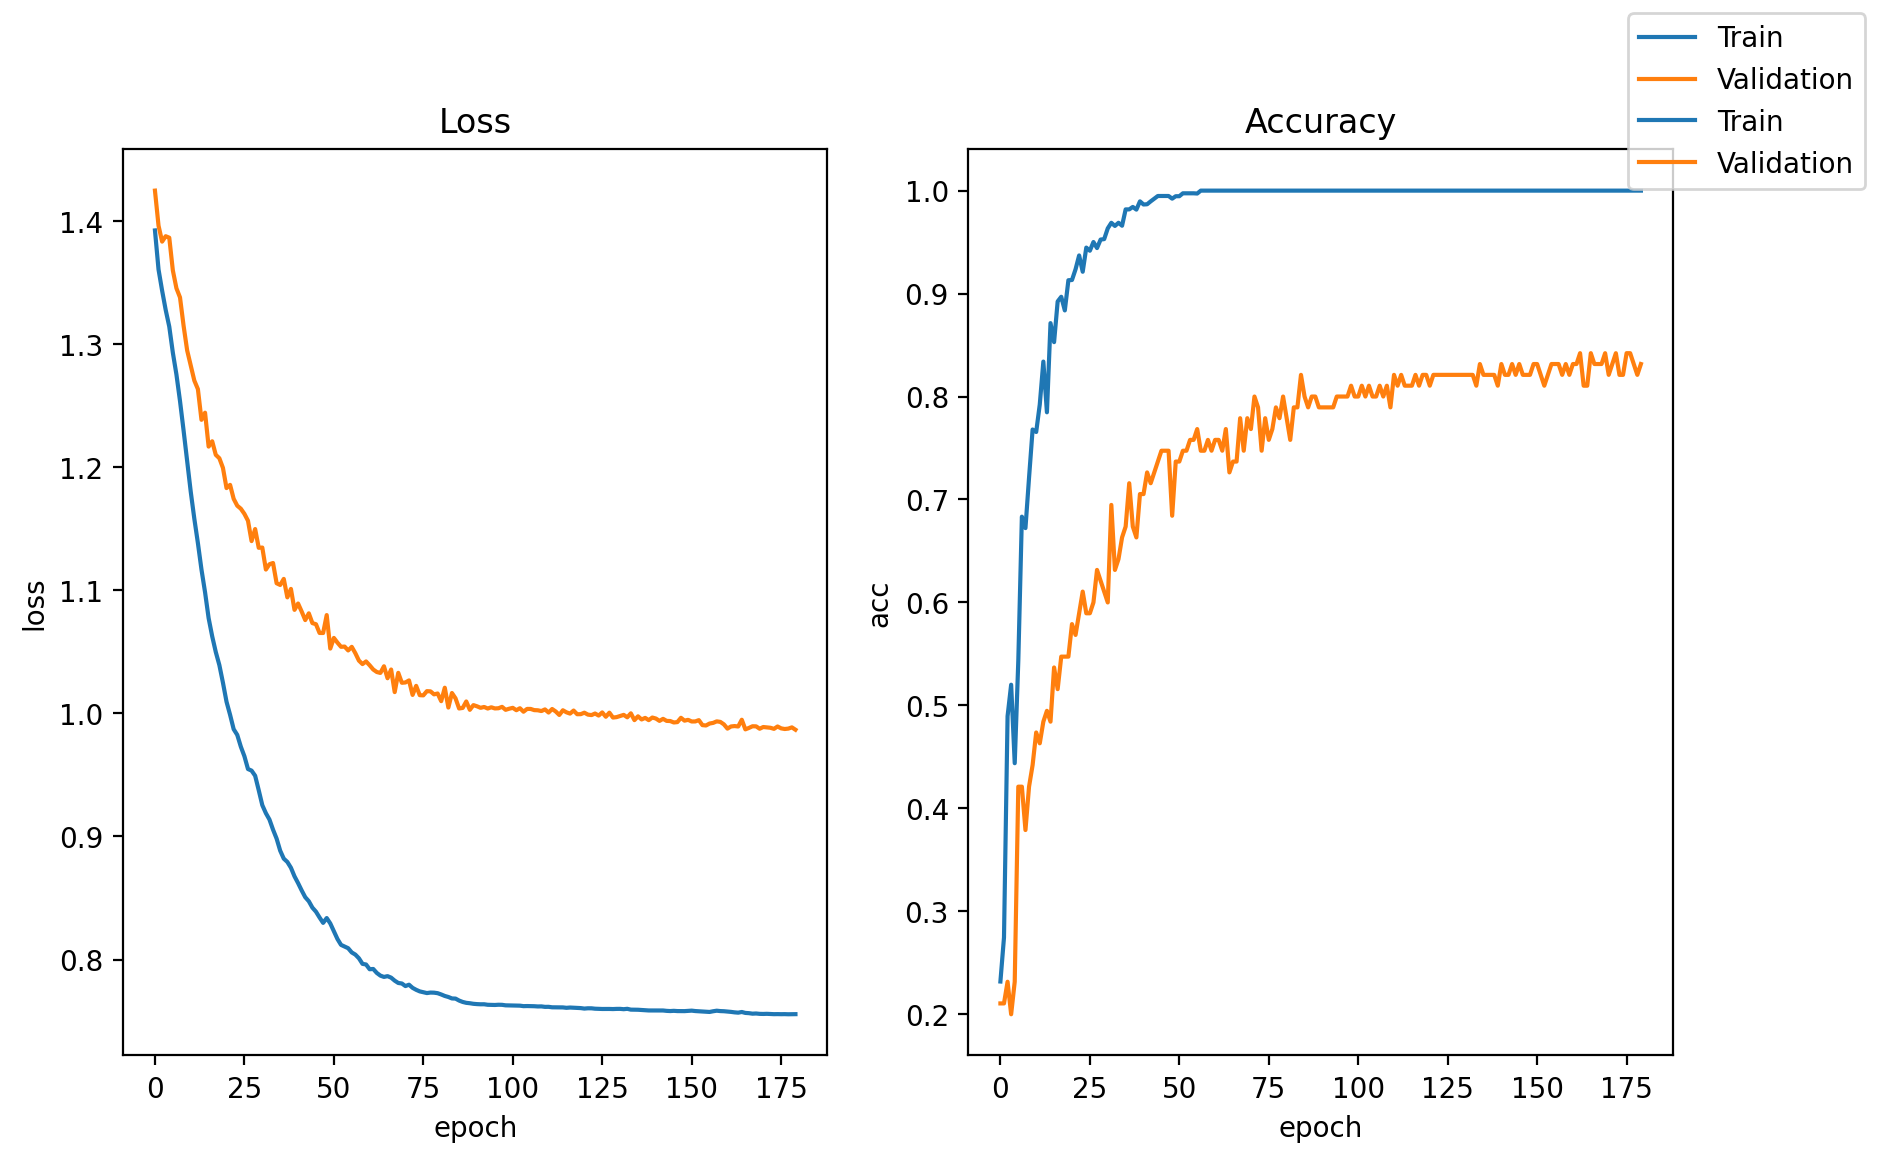

Test accuracy in trail 3: 0.69
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.402338	0.248323	1.387083	0.326316	
1	1.375046	0.339910	1.384094	0.273684	
2	1.356029	0.349267	1.372248	0.263158	
3	1.335862	0.467514	1.366498	0.378947	
4	1.317063	0.558086	1.344607	0.452632	
5	1.292848	0.645745	1.330581	0.463158	
6	1.264097	0.615378	1.314539	0.452632	
7	1.235637	0.602136	1.303610	0.473684	
8	1.209815	0.698711	1.286876	0.515789	
9	1.178035	0.724311	1.262388	0.484211	
10	1.157361	0.716720	1.252423	0.494737	
11	1.139847	0.778602	1.246858	0.536842	
12	1.119503	0.730623	1.234973	0.526316	
13	1.098398	0.856285	1.224898	0.557895	
14	1.083563	0.849797	1.211488	0.578947	
15	1.068508	0.865201	1.201954	0.578947	
16	1.051998	0.904705	1.193844	0.631579	
17	1.039752	0.923817	1.180698	0.642105	
18	1.032548	0.877560	1.179142	0.642105	
19	1.015627	0.925318	1.168341	0.673684	
20	1.009127	0.904705	1.157274	0.684211	
21	1.001152	0.930968	1.155686	0.694737	
22	0.988404	0.939221	1.140271	0.69

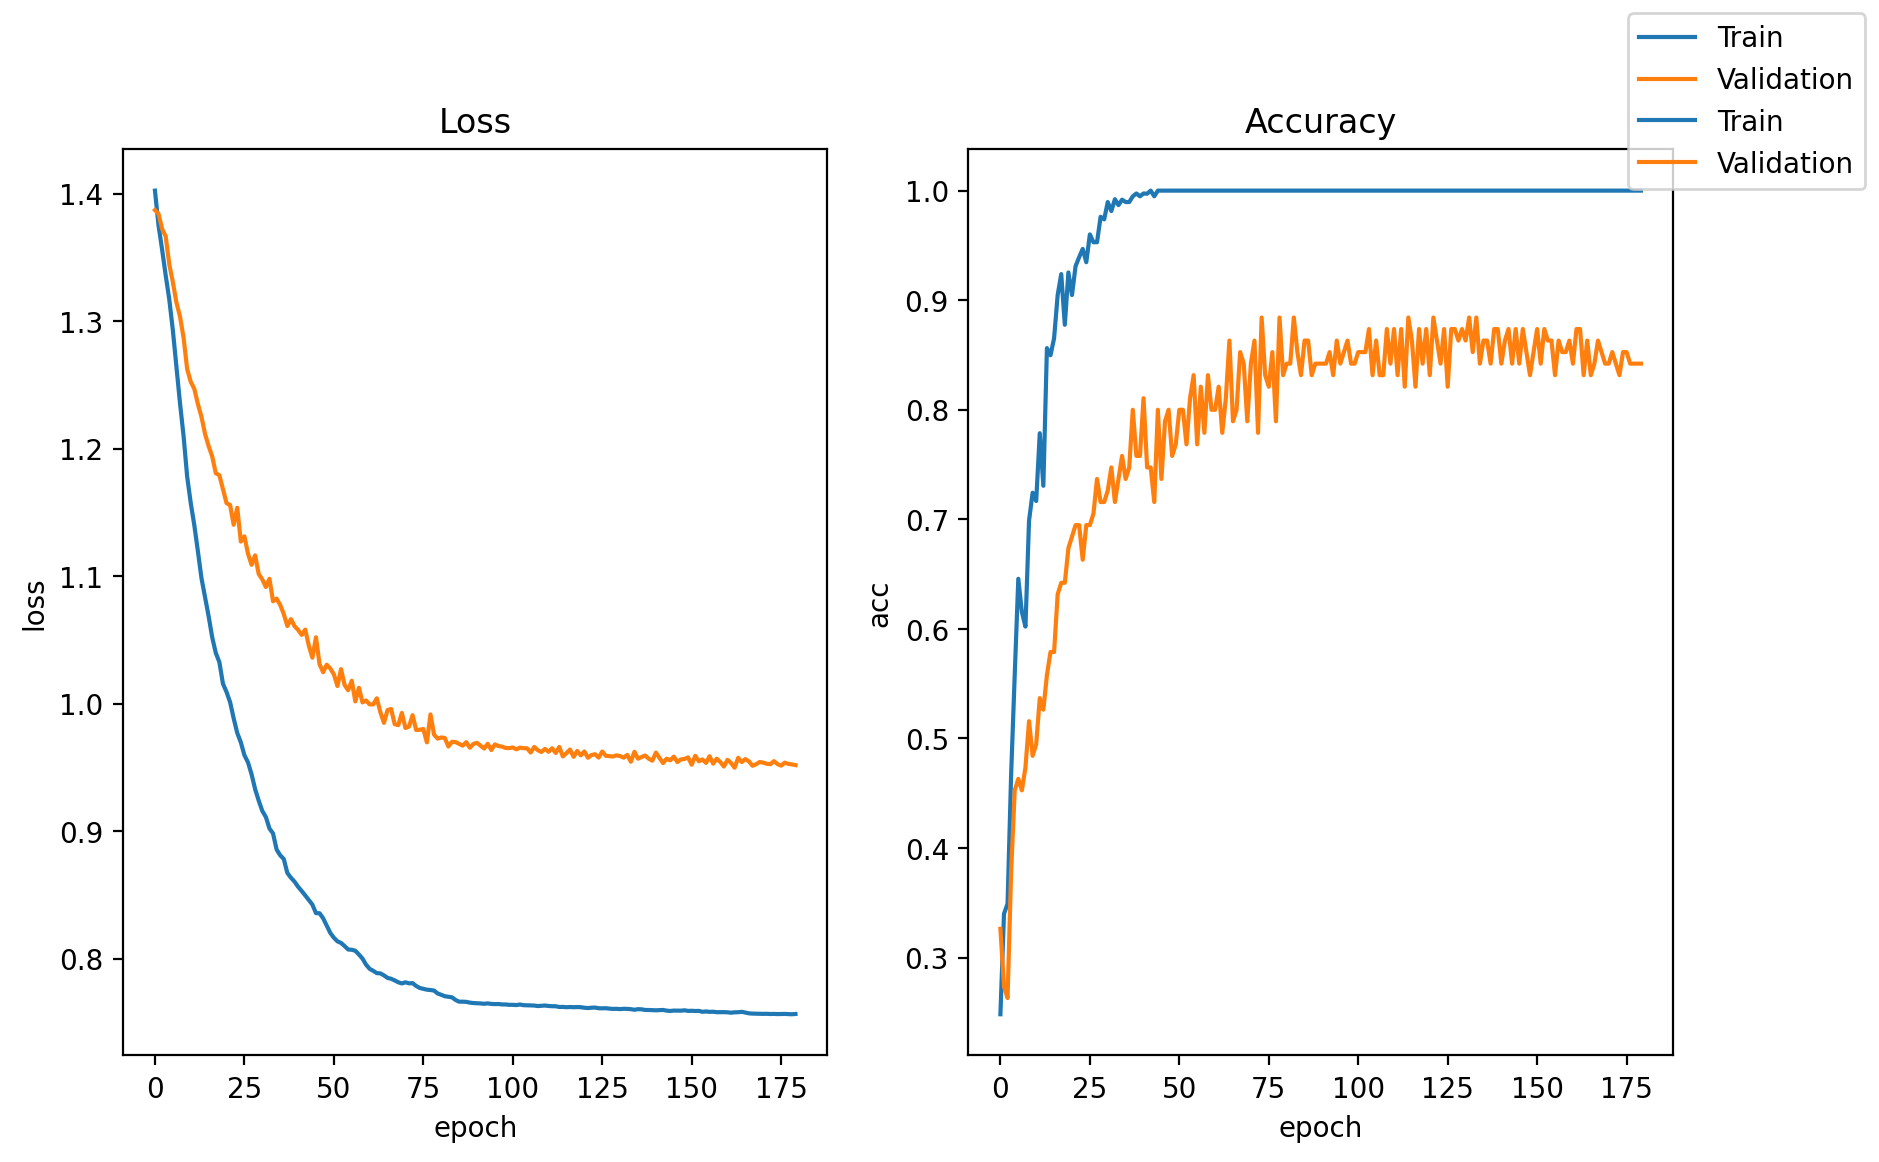

Test accuracy in trail 4: 0.67
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.396797	0.245056	1.388020	0.168421	
1	1.370760	0.318856	1.406087	0.221053	
2	1.353811	0.350371	1.387555	0.252632	
3	1.335491	0.461909	1.381301	0.252632	
4	1.318386	0.540475	1.362133	0.305263	
5	1.294715	0.558925	1.359002	0.284211	
6	1.274679	0.583245	1.336435	0.463158	
7	1.248966	0.697210	1.322778	0.473684	
8	1.226418	0.734110	1.313714	0.484211	
9	1.202336	0.722369	1.297176	0.505263	
10	1.184339	0.702595	1.279880	0.515789	
11	1.156122	0.794889	1.284410	0.557895	
12	1.136683	0.849576	1.258997	0.557895	
13	1.118833	0.808130	1.245405	0.568421	
14	1.098923	0.841322	1.244896	0.600000	
15	1.081012	0.881268	1.236951	0.536842	
16	1.065305	0.876059	1.222891	0.557895	
17	1.053355	0.897113	1.222623	0.621053	
18	1.040787	0.904926	1.212931	0.526316	
19	1.025683	0.915122	1.205174	0.589474	
20	1.012117	0.945092	1.193086	0.536842	
21	0.999709	0.933792	1.194148	0.578947	
22	0.986176	0.968529	1.185801	0.57

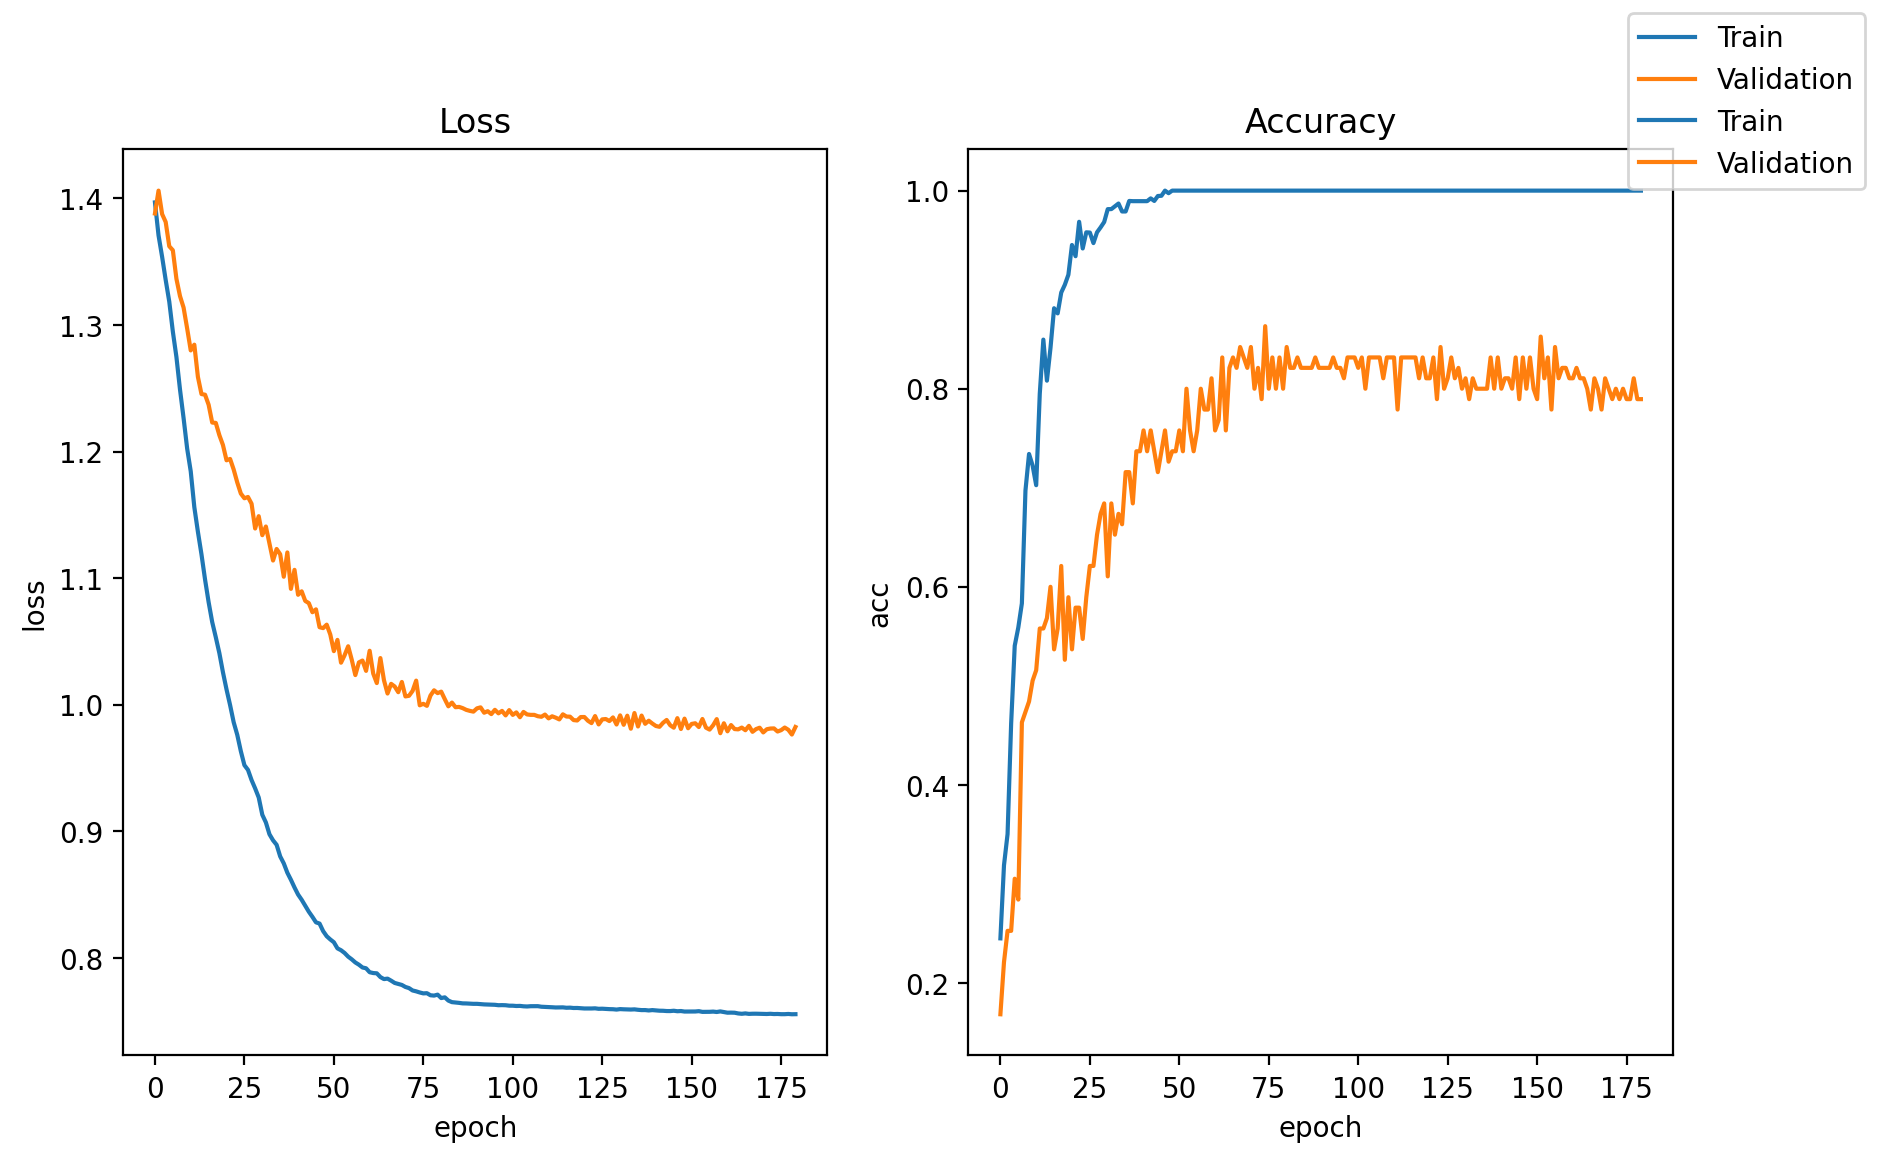

Test accuracy in trail 5: 0.76
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.397867	0.286944	1.394430	0.252632	
1	1.369465	0.276748	1.375072	0.273684	
2	1.358494	0.373985	1.375219	0.294737	
3	1.336128	0.430217	1.365581	0.294737	
4	1.315190	0.471884	1.350032	0.315789	
5	1.291360	0.602357	1.334701	0.410526	
6	1.266752	0.576492	1.320348	0.421053	
7	1.241843	0.605800	1.301390	0.452632	
8	1.212671	0.632283	1.269469	0.505263	
9	1.187280	0.717382	1.267979	0.463158	
10	1.164029	0.691781	1.247773	0.494737	
11	1.142282	0.668962	1.236881	0.515789	
12	1.121977	0.817885	1.230449	0.557895	
13	1.099060	0.838277	1.223674	0.463158	
14	1.085334	0.829184	1.215433	0.536842	
15	1.067262	0.856506	1.205789	0.631579	
16	1.053997	0.851518	1.203547	0.536842	
17	1.037556	0.881488	1.191813	0.642105	
18	1.026901	0.879105	1.190054	0.557895	
19	1.011486	0.896672	1.191158	0.578947	
20	0.999502	0.904926	1.177195	0.642105	
21	0.990150	0.925759	1.168913	0.568421	
22	0.975138	0.931188	1.166576	0.61

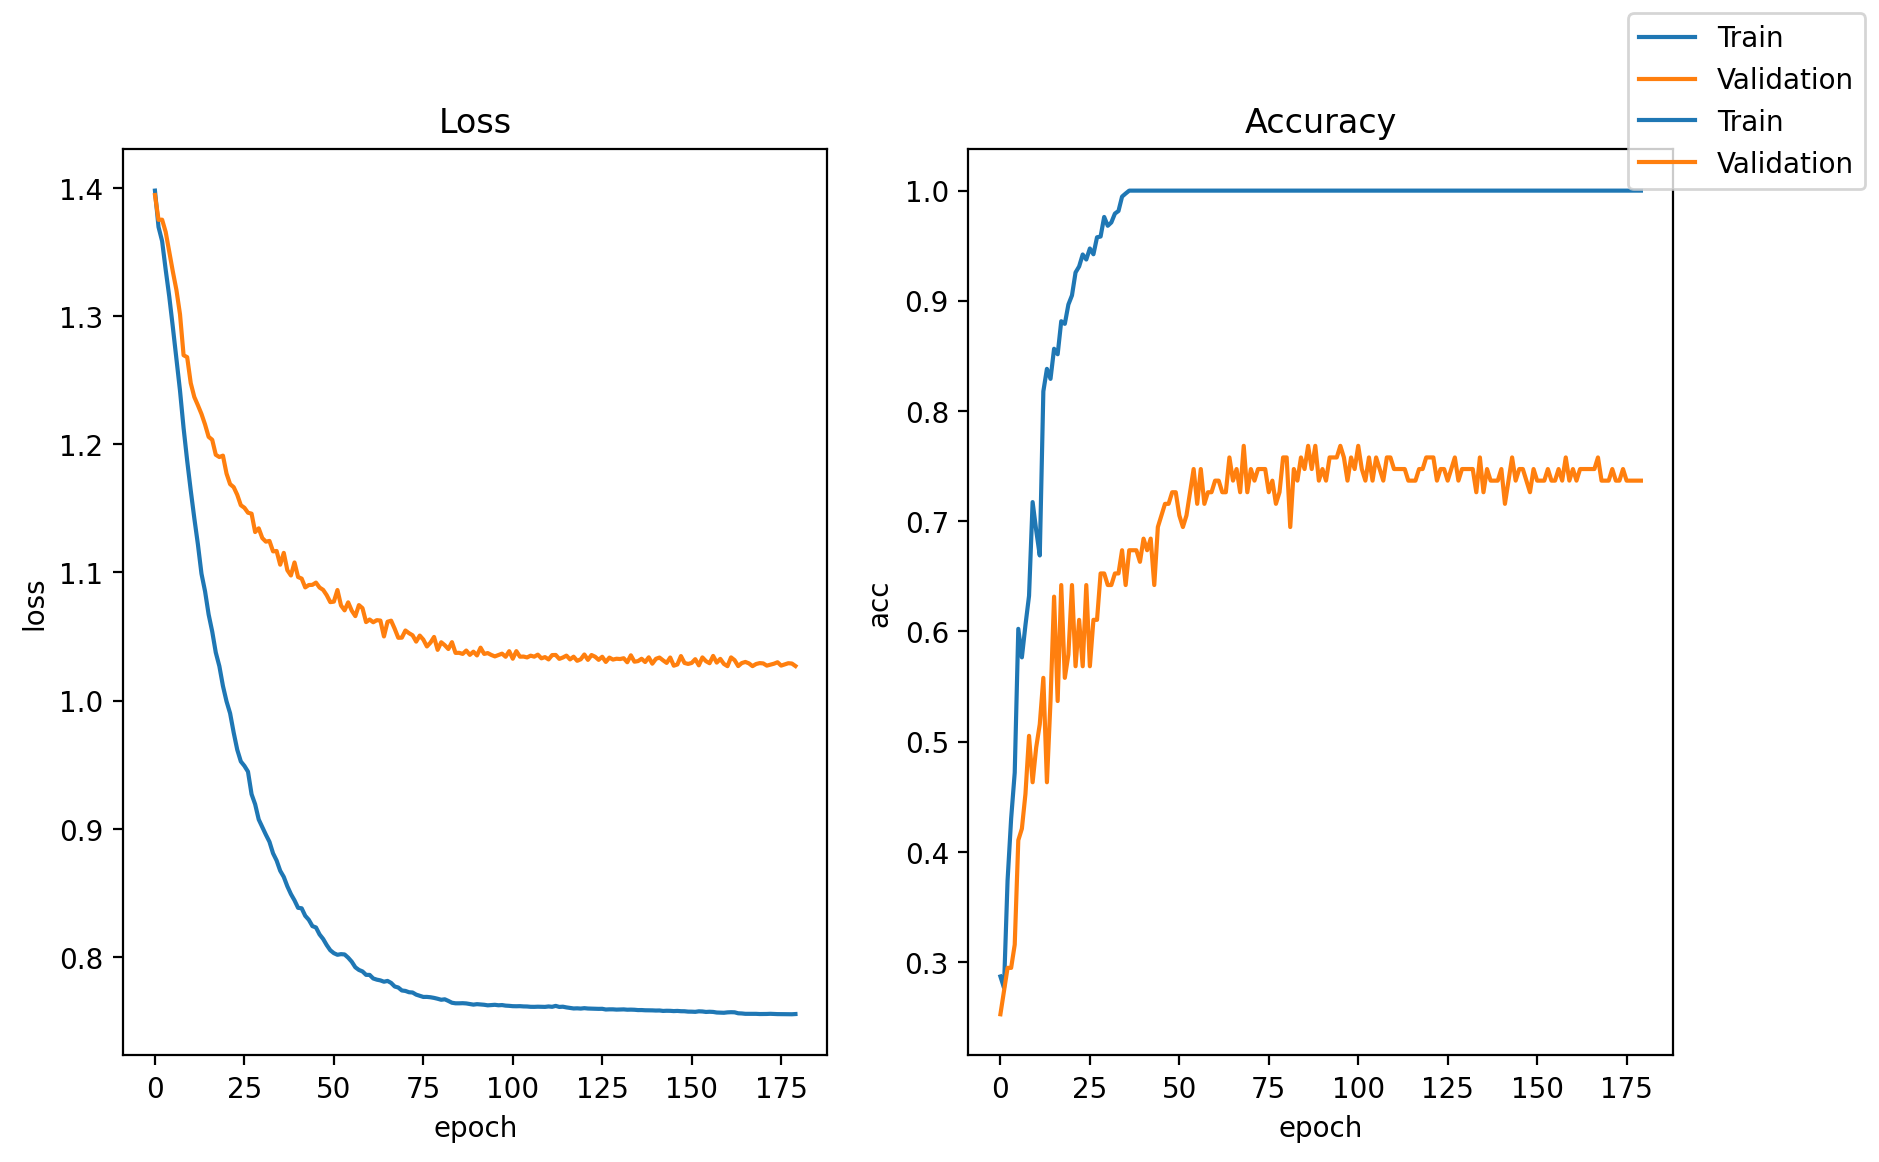

Test accuracy in trail 6: 0.8
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.381566	0.255694	1.420172	0.168421	
1	1.355934	0.367717	1.392282	0.200000	
2	1.335306	0.426510	1.404015	0.189474	
3	1.319143	0.454317	1.388539	0.147368	
4	1.298461	0.536767	1.373964	0.305263	
5	1.280206	0.558483	1.366513	0.231579	
6	1.254586	0.644244	1.335392	0.368421	
7	1.227235	0.650733	1.331673	0.357895	
8	1.200970	0.664239	1.294573	0.463158	
9	1.174319	0.706744	1.294250	0.389474	
10	1.148806	0.767964	1.265595	0.494737	
11	1.123739	0.804643	1.260652	0.442105	
12	1.104482	0.796169	1.245994	0.421053	
13	1.087958	0.825035	1.242851	0.473684	
14	1.063172	0.886476	1.223438	0.536842	
15	1.046111	0.876280	1.213172	0.526316	
16	1.031575	0.902101	1.215443	0.621053	
17	1.014633	0.884313	1.187723	0.589474	
18	1.003643	0.895613	1.197403	0.589474	
19	0.991025	0.920992	1.175715	0.621053	
20	0.971111	0.937059	1.162783	0.568421	
21	0.963308	0.939442	1.159762	0.631579	
22	0.951373	0.957230	1.146549	0.673

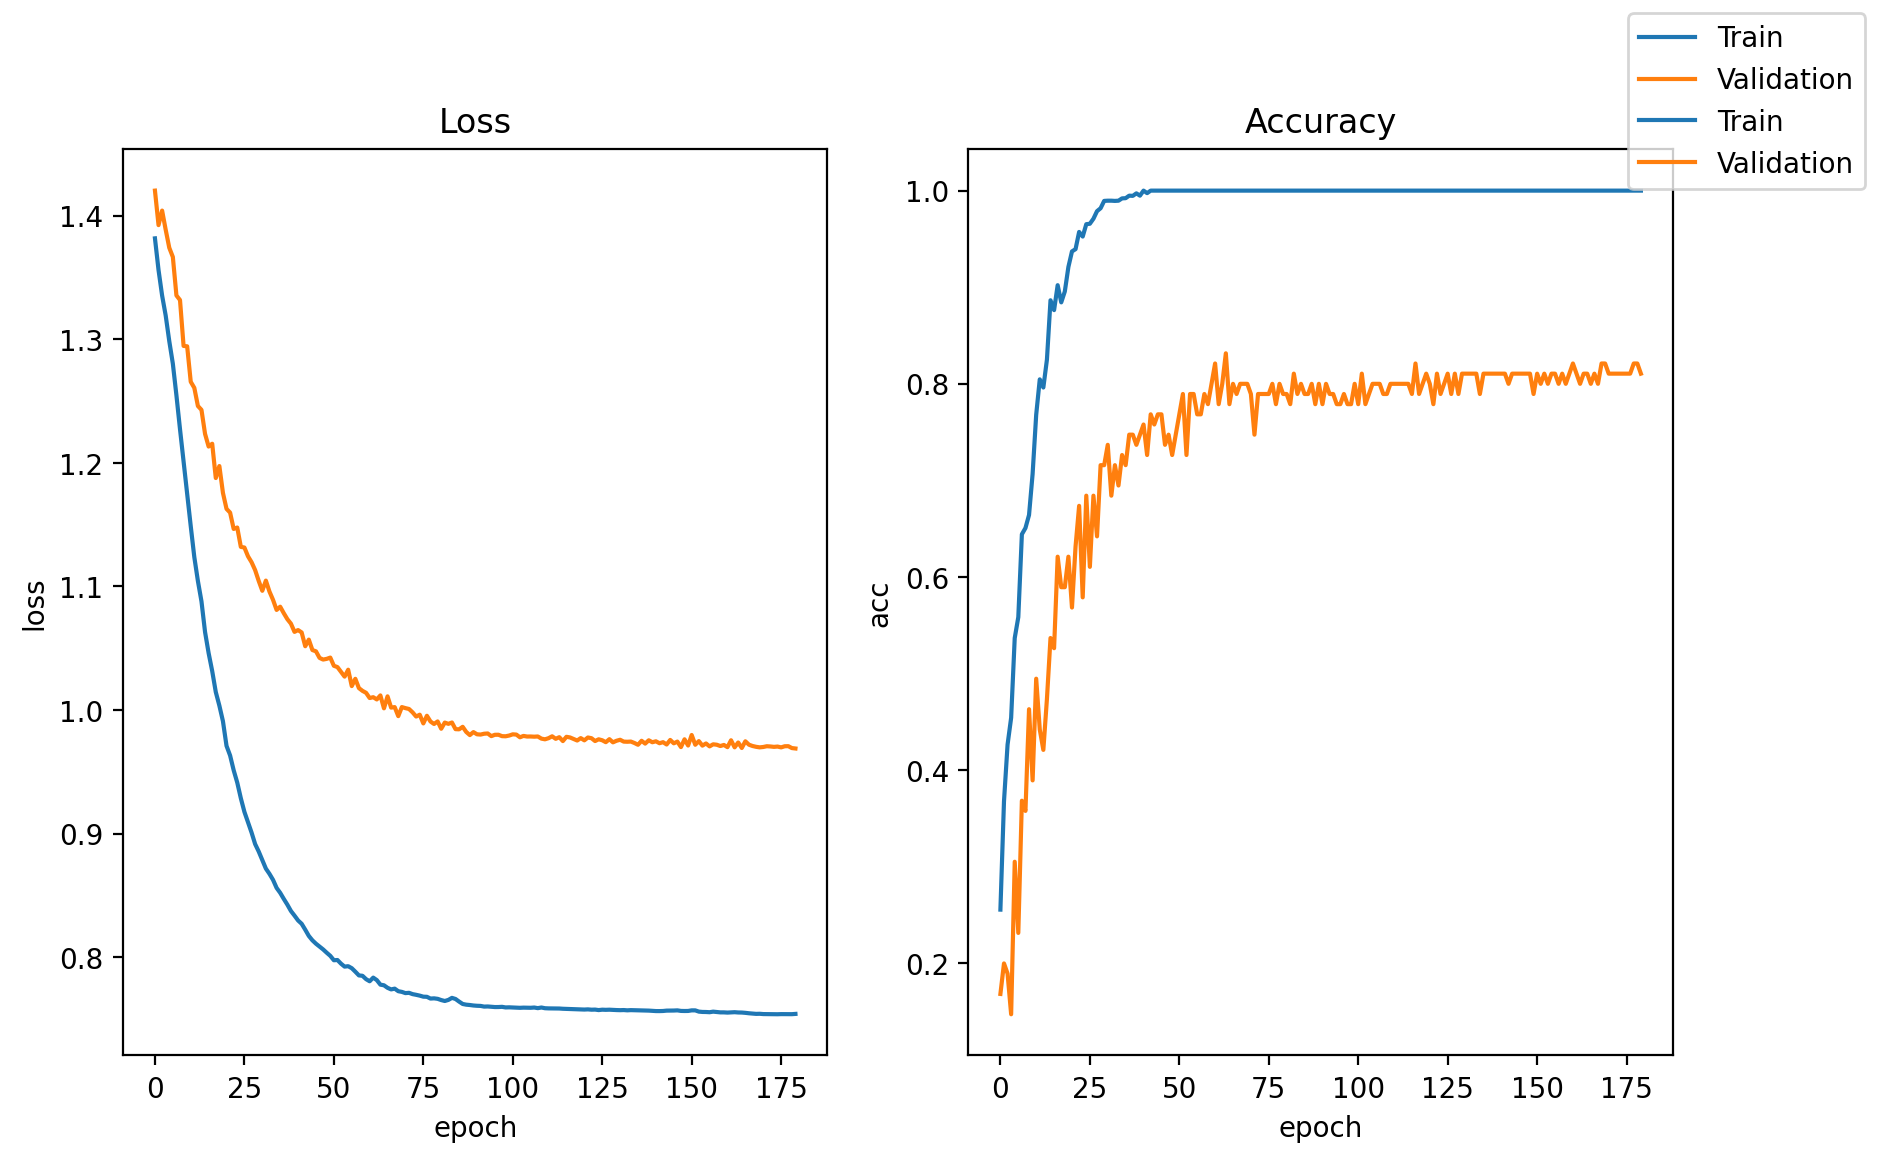

Test accuracy in trail 7: 0.79
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.391483	0.253972	1.407397	0.178947	
1	1.367169	0.303672	1.415906	0.231579	
2	1.345983	0.459084	1.388445	0.378947	
3	1.323915	0.486847	1.370615	0.336842	
4	1.297650	0.592779	1.352502	0.452632	
5	1.275102	0.586953	1.338803	0.473684	
6	1.252947	0.647511	1.323680	0.494737	
7	1.229871	0.622087	1.310634	0.494737	
8	1.210142	0.639257	1.309545	0.463158	
9	1.192314	0.674656	1.284232	0.505263	
10	1.174788	0.613215	1.276097	0.505263	
11	1.152596	0.726739	1.258448	0.526316	
12	1.139907	0.763374	1.259007	0.505263	
13	1.117222	0.770348	1.239524	0.557895	
14	1.098131	0.835055	1.219709	0.547368	
15	1.085688	0.824594	1.226625	0.568421	
16	1.066131	0.838939	1.198778	0.621053	
17	1.055060	0.891022	1.192293	0.621053	
18	1.036565	0.886035	1.192012	0.589474	
19	1.023887	0.905367	1.161543	0.705263	
20	1.006498	0.944871	1.178797	0.642105	
21	1.002047	0.910576	1.147067	0.694737	
22	0.983591	0.952242	1.154988	0.65

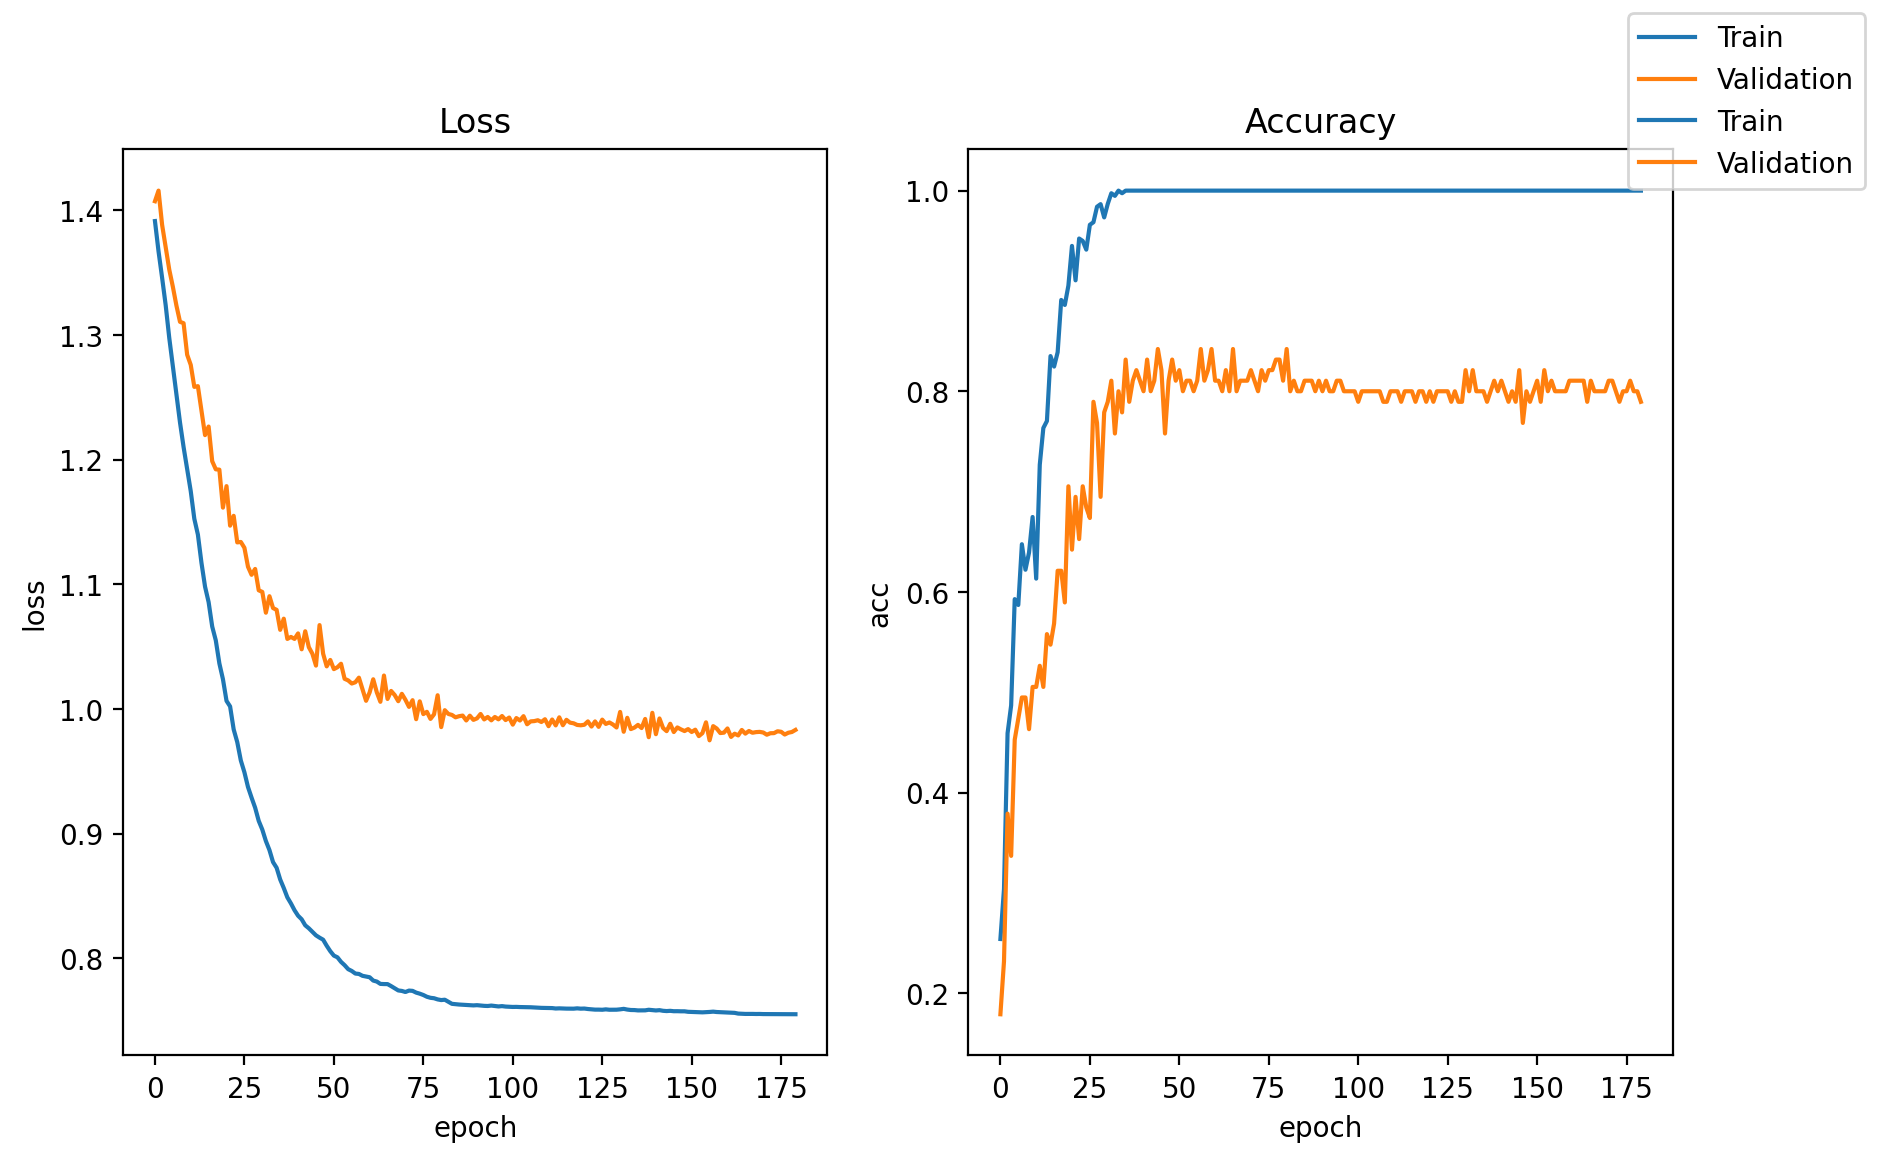

Test accuracy in trail 8: 0.74
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.380728	0.252648	1.397501	0.221053	
1	1.356769	0.381841	1.387455	0.242105	
2	1.337249	0.501854	1.382841	0.231579	
3	1.319231	0.461909	1.373016	0.294737	
4	1.295749	0.582142	1.352300	0.336842	
5	1.269739	0.635990	1.336449	0.410526	
6	1.239067	0.631003	1.311612	0.473684	
7	1.211263	0.628355	1.293497	0.452632	
8	1.182307	0.691781	1.271092	0.536842	
9	1.160167	0.744748	1.251092	0.515789	
10	1.142638	0.756444	1.235005	0.578947	
11	1.118361	0.785531	1.222780	0.557895	
12	1.102034	0.792064	1.208084	0.631579	
13	1.088924	0.790740	1.192013	0.631579	
14	1.070609	0.847413	1.187278	0.705263	
15	1.057157	0.861714	1.176140	0.642105	
16	1.042215	0.857609	1.170273	0.736842	
17	1.034837	0.881047	1.153844	0.736842	
18	1.016092	0.894951	1.146379	0.800000	
19	1.009141	0.904484	1.138379	0.726316	
20	0.994058	0.916005	1.133735	0.705263	
21	1.001401	0.898835	1.130106	0.757895	
22	0.985547	0.910796	1.125719	0.71

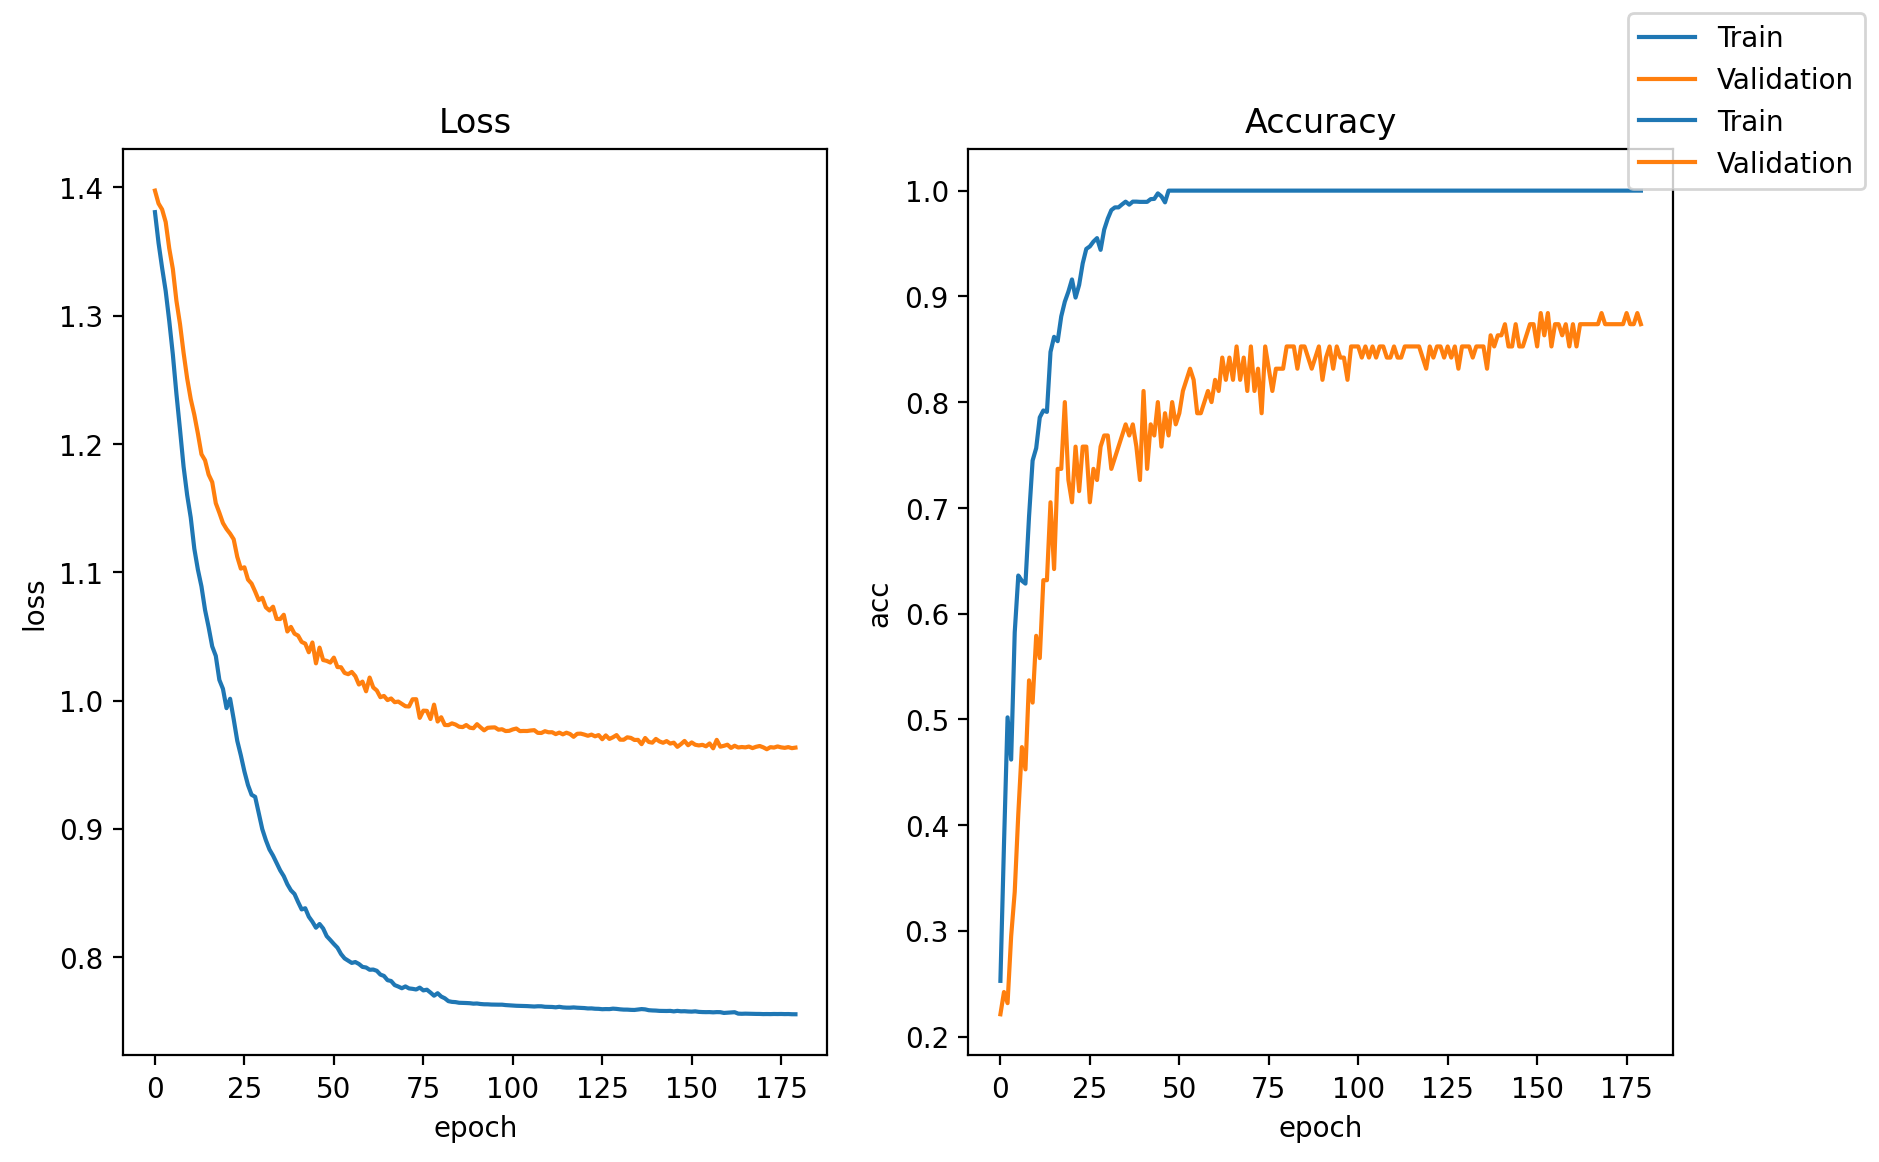

Test accuracy in trail 9: 0.71
The average test accuracy:0.746


In [14]:
encoder_opt = {
    'gate_conv_size': 7,
    'gate_conv_out_channel': 60,
    'prob_conv_size': 7,
    'feature_conv_size':3,
    'feature_conv_out_channel': 64,
    'feature_pool_size': 7,
    'activation': 'elu',
}
model_opt = {
    'decoder_opt':{},
    'encoder_opt':encoder_opt,
}

#model = EEGCNNv2(1,4,encoder_opt=encoder_opt,input_size=(1,22,500)).to('cuda')

train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 80,
    'scheduler_factor': 0.3,
    'weight_decay': 0.10,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 180,
    'downsample_split': True,
    'overfit_threshold':0,
}
loss_fn = nn.CrossEntropyLoss()

data_dir = {
    'X_train_dir': sub0_X_train_val,
    'y_train_dir':sub0_y_train_val,
    'X_test_dir': sub0_X_test,
    'y_test_dir':sub0_y_test,
}

test_acc,avg_acc = avg_test_acc(TSCNN,(1,22,500),data_dir,loss_fn,
                        train_options,model_opt,trails=10)
print('The average test accuracy:{}'.format(avg_acc))

## Test on CNN+LSTM


## load data


In [12]:

X_train_val = load_data(data_type='X_train_val',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=0,
                                downsampled=True)
y_train_val = load_data(data_type='y_train_valid',
                                subject=0,
                                data_sub_dir='band_pass_data',
                                downsampled=True)


X_test = load_data(data_type='X_test',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=0,
                                downsampled=True)

y_test = load_data(data_type="y_test",
                                data_sub_dir='band_pass_data',
                                subject=0,
                             downsampled=True)
y_train_val -=769
y_test -=769

train_num = int(X_train_val.shape[0]*0.8)
val_num = int(X_train_val.shape[0]-train_num)

(X_train, X_valid),(y_train,y_valid) = downsampled_cross_split(X_train_val,y_train_val,(train_num,val_num))

y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_train.shape[2], 1)


X_train = np.swapaxes(X_train, 1,3)
X_train = np.swapaxes(X_train, 1,2)
X_valid = np.swapaxes(X_valid, 1,3)
X_valid = np.swapaxes(X_valid, 1,2)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = np.swapaxes(X_test, 1,3)
X_test = np.swapaxes(X_test, 1,2)
y_test = to_categorical(y_test, 4)
print(X_valid.shape)
print(X_test.shape)



(95, 500, 1, 22)
(100, 500, 1, 22)
(95, 500, 1, 22)


In [15]:
epochs = 100
test_acc = [] 
for i in np.arange(10):
    model = CNN_LSTM()
    model_result = model.fit(X_train,
                y_train,
                batch_size=64,
                epochs=epochs,
                validation_data=(X_valid, y_valid), verbose=True)
    score = model.evaluate(X_test, y_test, verbose=0)
    test_acc.append(score[1])
    print('The test accuracy is :{}'.format(score[1]))

4 - val_loss: 0.9519 - val_accuracy: 0.6105
Epoch 60/100
6/6 [==============================] - 0s 26ms/step - loss: 0.2773 - accuracy: 0.9755 - val_loss: 0.9770 - val_accuracy: 0.6211
Epoch 61/100
6/6 [==============================] - 0s 25ms/step - loss: 0.2862 - accuracy: 0.9695 - val_loss: 0.9206 - val_accuracy: 0.6211
Epoch 62/100
6/6 [==============================] - 0s 24ms/step - loss: 0.2891 - accuracy: 0.9517 - val_loss: 0.9115 - val_accuracy: 0.6105
Epoch 63/100
6/6 [==============================] - 0s 24ms/step - loss: 0.2842 - accuracy: 0.9537 - val_loss: 0.9191 - val_accuracy: 0.6632
Epoch 64/100
6/6 [==============================] - 0s 25ms/step - loss: 0.2492 - accuracy: 0.9754 - val_loss: 0.9043 - val_accuracy: 0.6632
Epoch 65/100
6/6 [==============================] - 0s 24ms/step - loss: 0.2501 - accuracy: 0.9811 - val_loss: 0.9201 - val_accuracy: 0.6421
Epoch 66/100
6/6 [==============================] - 0s 24ms/step - loss: 0.2606 - accuracy: 0.9516 - val_loss:

In [19]:
print(sum(test_acc)/len(test_acc))

0.6149999976158143
